In [96]:
#import os
import PIL
import pathlib
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import re
import pandas as pd
#import shutil
#import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
#from keras import backend as K
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.callbacks import LearningRateScheduler
from keras import regularizers

#from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [97]:
data_dir = pathlib.Path('/Users/erfan/Documents/Datasets/brain_tumor_dataset').with_suffix('')
data_dir = (list(data_dir.glob('*/*')))

# excluding .DS_Store
images = []
for dir in data_dir:
    if re.search(pattern=r'.jpg|.jpeg|.png', string=str(dir).split('/')[-1], flags=re.IGNORECASE) != None :
        images.append(dir)

random.shuffle(images)
len(images)

253

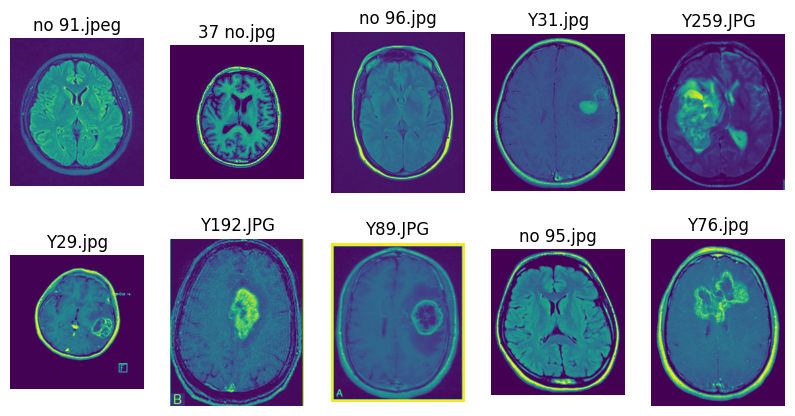

In [98]:
# Demonstration
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(PIL.Image.open(images[i]).convert('L'))
    plt.title(str(images[i]).split("/")[-1])
    plt.axis('off')


In [99]:
dimensions = []
for image in images:
  with PIL.Image.open(image) as img:
    dimensions.append(list(img.size))

dimensions = np.array(dimensions)
dimensions.shape

(253, 2)

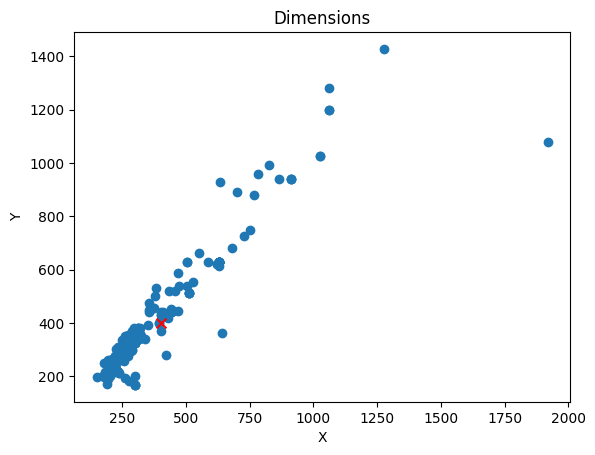

In [100]:
# Scatter dimentions
x = dimensions[:, 0]
y = dimensions[:, 1]
target_width = 400
target_height = 400
plt.scatter(x, y)
plt.scatter(target_width, target_height, color='red', marker='x', s=50, label='Specific Point')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dimensions')
plt.show()

In [101]:
def add_padding(images):
  padded_img, labels = [], []

  for image in images:
    with PIL.Image.open(image) as img:
      img_width, img_height = img.size

      width_ratio = target_width / img_width
      height_ratio = target_height / img_height

      ratio = min(width_ratio, height_ratio)

      new_width = int(img_width * ratio)
      new_height = int(img_height * ratio)

      resized_img = img.resize((new_width, new_height), PIL.Image.NEAREST)
      letterbox_img = PIL.Image.new('L', (target_width, target_height))

      left_offset = (target_width - new_width) // 2
      top_offset = (target_height - new_height) // 2

      letterbox_img.paste(resized_img, (left_offset, top_offset))
      padded_img.append((np.array(letterbox_img.convert('L'))))

      if len(re.findall(".*y.*|.*Y.*", str(image).split("/")[-1])) != 0:
        labels.append(1) #YES
      else:
        labels.append(0) #NO
  padded_img = np.reshape(padded_img, (-1, 400, 400))
  labels = np.array(labels)
  return padded_img, labels

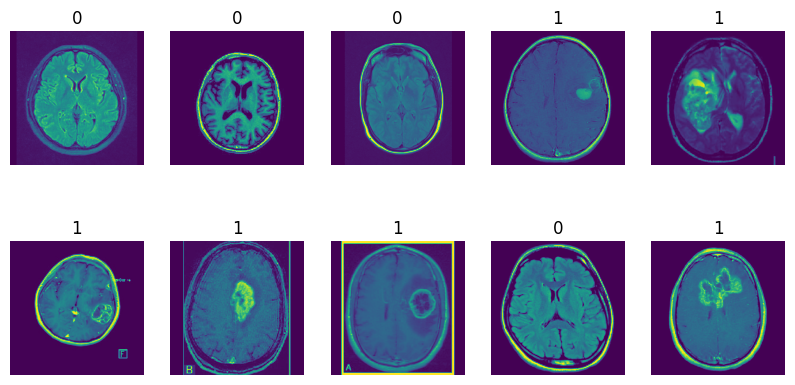

In [102]:
padded_img, labels = add_padding(images)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(padded_img[i])
    plt.title(labels[i])
    plt.axis('off')

In [103]:
X_train, X_test, y_train, y_test = train_test_split(padded_img, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [104]:
print('X_train: \n',X_train)

X_train: 
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [105]:
print('y_train: \n',y_train)

y_train: 
 [1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0
 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1]


In [106]:
def res_block(x, filters):
  fx = layers.Conv2D(filters, (3,3), padding='same', strides=(1,1), activation='relu')(x)
  fx = layers.BatchNormalization()(fx)
  fx = layers.Conv2D(filters, (3,3), padding='same', strides=(1,1))(fx)
  fx = layers.BatchNormalization()(fx)
  out = layers.Add()([x, fx])
  out = layers.Activation('relu')(out)
  #out = layers.BatchNormalization()(out)
  return out

Model: "Model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_155 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_154 (Dept  (None, 398, 398, 1)          10        ['input_155[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1167 (Conv2D)        (None, 398, 398, 8)          80        ['depthwise_conv2d_154[0][0]']
                                                                                                  
 max_pooling2d_654 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1167[0][0]']   

2024-04-16 22:26:08.541722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 201.0164 - accuracy: 0.5480

2024-04-16 22:26:17.357659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 11s 220ms/step - loss: 201.0164 - accuracy: 0.5480 - val_loss: 43.1291 - val_accuracy: 0.7105
Epoch 2/30
36/36 [==============================] - 1s 36ms/step - loss: 21.7092 - accuracy: 0.6893 - val_loss: 9.7980 - val_accuracy: 0.6316
Epoch 3/30
36/36 [==============================] - 2s 44ms/step - loss: 9.0720 - accuracy: 0.7175 - val_loss: 8.5304 - val_accuracy: 0.7632
Epoch 4/30
36/36 [==============================] - 1s 35ms/step - loss: 8.3587 - accuracy: 0.7119 - val_loss: 7.1884 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 3s 74ms/step - loss: 7.0281 - accuracy: 0.7684 - val_loss: 7.3251 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 1s 21ms/step - loss: 10.1990 - accuracy: 0.7288 - val_loss: 6.6586 - val_accuracy: 0.6053
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 4.4368 - accuracy: 0.7797 - val_loss: 4.1921 - val_accuracy: 0.8158
Epoch 8/30
36/36 

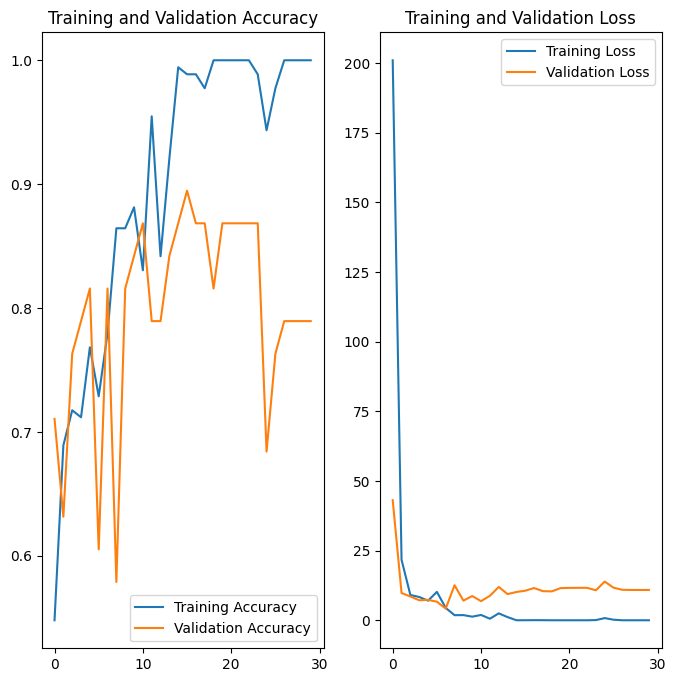

2024-04-16 22:26:47.238749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 280ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1-Score: 0.8695652173913043


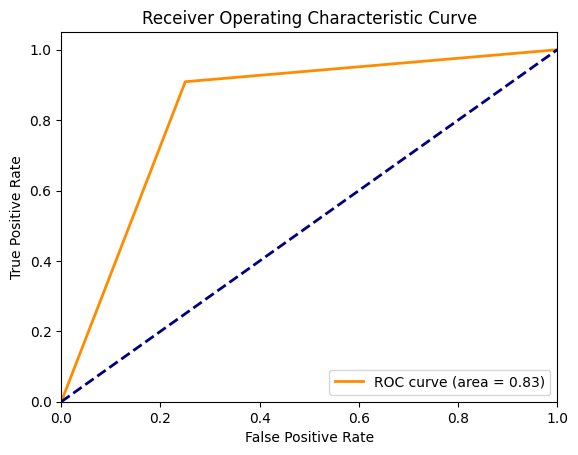

Epoch 1/30


2024-04-16 22:26:48.487522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 81.6715 - accuracy: 0.6271

2024-04-16 22:27:00.139421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 16s 367ms/step - loss: 81.6715 - accuracy: 0.6271 - val_loss: 15.3718 - val_accuracy: 0.5000
Epoch 2/30
36/36 [==============================] - 2s 63ms/step - loss: 3.3676 - accuracy: 0.7062 - val_loss: 3.4574 - val_accuracy: 0.6842
Epoch 3/30
36/36 [==============================] - 1s 38ms/step - loss: 0.8595 - accuracy: 0.8362 - val_loss: 3.1121 - val_accuracy: 0.6842
Epoch 4/30
36/36 [==============================] - 1s 24ms/step - loss: 0.1980 - accuracy: 0.9548 - val_loss: 4.1634 - val_accuracy: 0.5526
Epoch 5/30
36/36 [==============================] - 1s 24ms/step - loss: 0.2019 - accuracy: 0.9605 - val_loss: 2.4413 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 1s 36ms/step - loss: 0.0683 - accuracy: 0.9718 - val_loss: 3.3622 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 0.0507 - accuracy: 0.9718 - val_loss: 3.3222 - val_accuracy: 0.7895
Epoch 8/30
36/36 [==

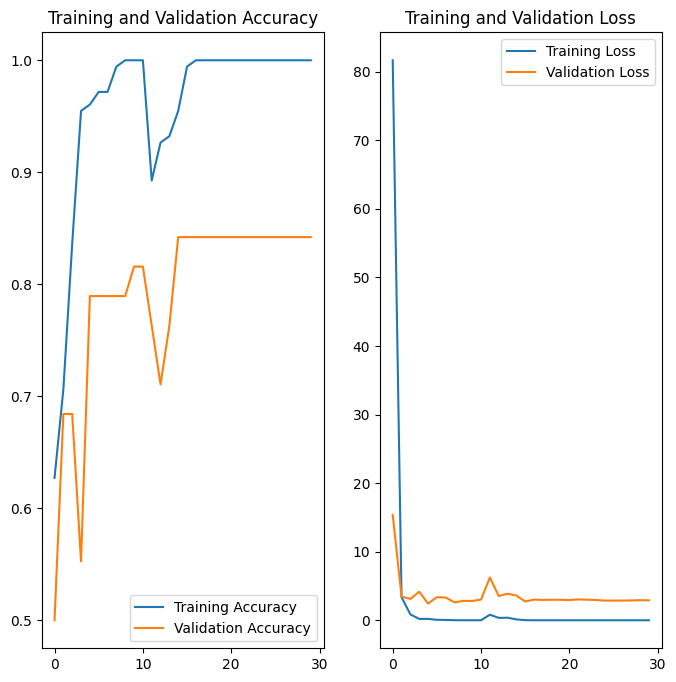

2024-04-16 22:27:34.037589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 829ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.84
Recall: 0.9545454545454546
F1-Score: 0.8936170212765958


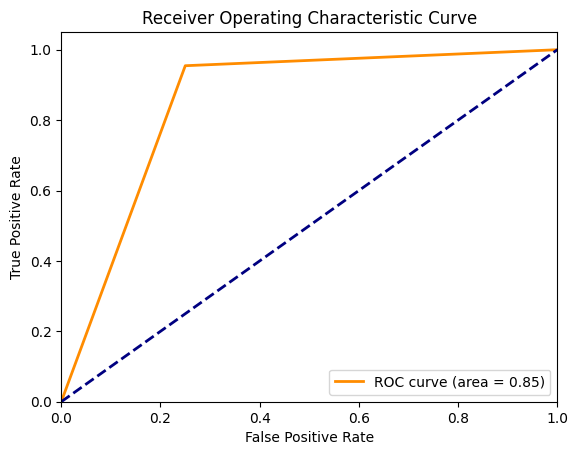

Epoch 1/30


2024-04-16 22:27:35.795862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 51.7249 - accuracy: 0.6610

2024-04-16 22:27:48.792925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 17s 329ms/step - loss: 51.7249 - accuracy: 0.6610 - val_loss: 7.7747 - val_accuracy: 0.6316
Epoch 2/30
36/36 [==============================] - 2s 55ms/step - loss: 1.6686 - accuracy: 0.7345 - val_loss: 3.0381 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 1s 26ms/step - loss: 0.7134 - accuracy: 0.7966 - val_loss: 3.2194 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 1s 29ms/step - loss: 0.5677 - accuracy: 0.8531 - val_loss: 3.7916 - val_accuracy: 0.6579
Epoch 5/30
36/36 [==============================] - 2s 50ms/step - loss: 0.1801 - accuracy: 0.9209 - val_loss: 3.7626 - val_accuracy: 0.7105
Epoch 6/30
36/36 [==============================] - 2s 44ms/step - loss: 0.0795 - accuracy: 0.9887 - val_loss: 3.7676 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 31ms/step - loss: 0.0221 - accuracy: 0.9944 - val_loss: 3.9600 - val_accuracy: 0.7895
Epoch 8/30
36/36 [===

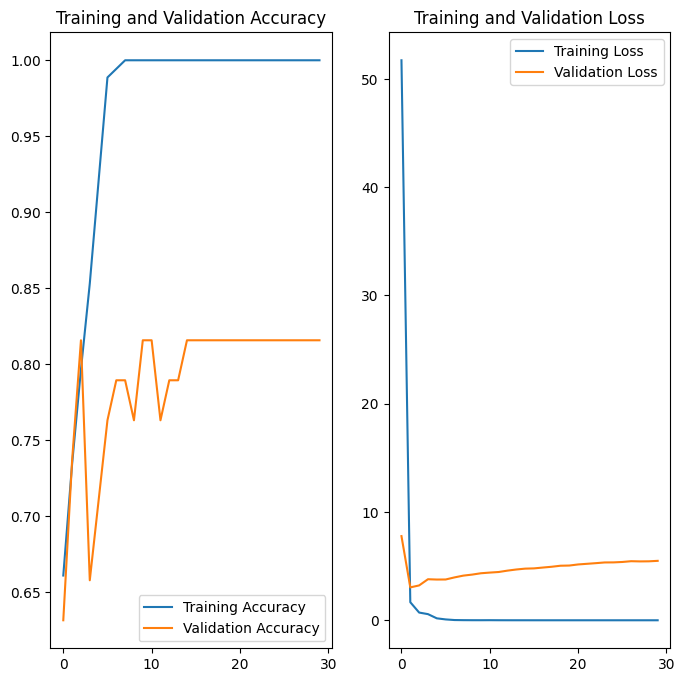

2024-04-16 22:28:18.679762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 467ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.782608695652174
Recall: 0.8181818181818182
F1-Score: 0.8


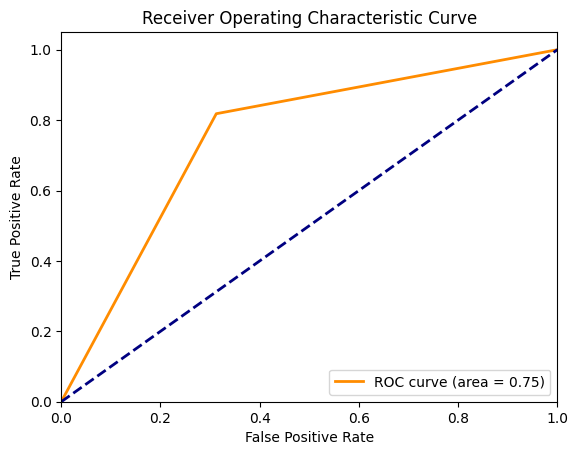

Epoch 1/30


2024-04-16 22:28:20.190997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 149.8316 - accuracy: 0.5706

2024-04-16 22:28:31.476995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 15s 300ms/step - loss: 149.8316 - accuracy: 0.5706 - val_loss: 3.9878 - val_accuracy: 0.7895
Epoch 2/30
36/36 [==============================] - 2s 42ms/step - loss: 4.9350 - accuracy: 0.7062 - val_loss: 3.4290 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 2s 48ms/step - loss: 14.1736 - accuracy: 0.6328 - val_loss: 23.1285 - val_accuracy: 0.7105
Epoch 4/30
36/36 [==============================] - 1s 25ms/step - loss: 30.8613 - accuracy: 0.6328 - val_loss: 14.6959 - val_accuracy: 0.6842
Epoch 5/30
36/36 [==============================] - 1s 25ms/step - loss: 21.5999 - accuracy: 0.7684 - val_loss: 75.6329 - val_accuracy: 0.6316
Epoch 6/30
36/36 [==============================] - 1s 41ms/step - loss: 67.6783 - accuracy: 0.6441 - val_loss: 15.3229 - val_accuracy: 0.6316
Epoch 7/30
36/36 [==============================] - 1s 24ms/step - loss: 4.8937 - accuracy: 0.7740 - val_loss: 4.3656 - val_accuracy: 0.7895
Epoch 8/30
3

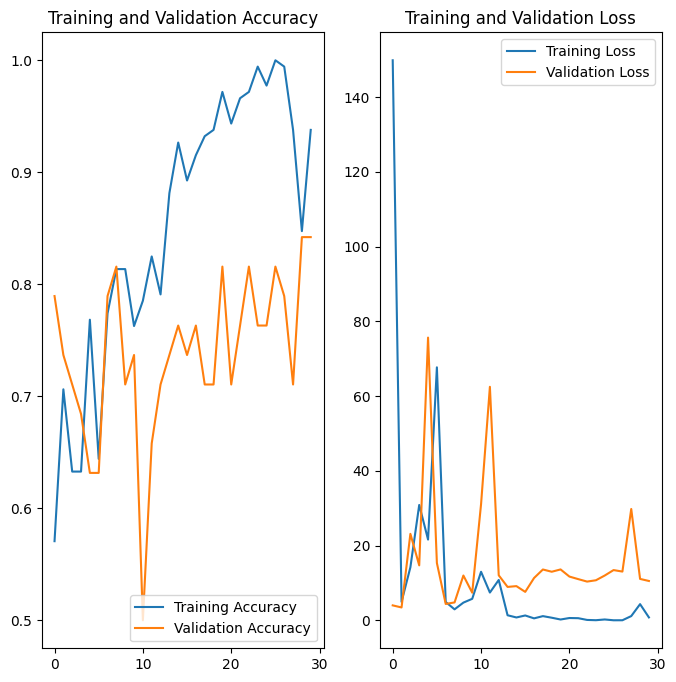

2024-04-16 22:29:01.647729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 670ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.7727272727272727
Recall: 0.7727272727272727
F1-Score: 0.7727272727272727


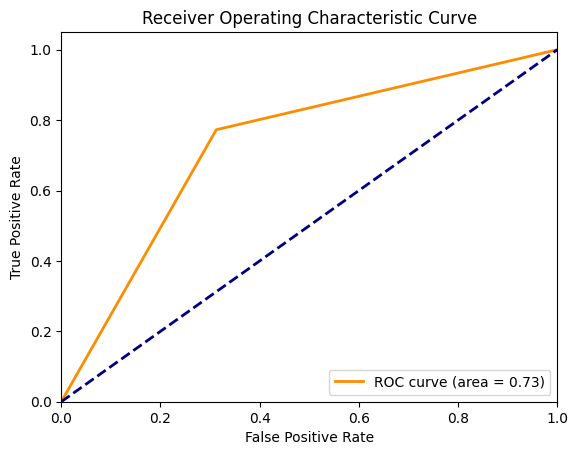

Epoch 1/30


2024-04-16 22:29:03.252735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 93.3011 - accuracy: 0.5876

2024-04-16 22:29:12.613571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 13s 271ms/step - loss: 93.3011 - accuracy: 0.5876 - val_loss: 17.3441 - val_accuracy: 0.6053
Epoch 2/30
36/36 [==============================] - 2s 64ms/step - loss: 6.8549 - accuracy: 0.7006 - val_loss: 2.4859 - val_accuracy: 0.7632
Epoch 3/30
36/36 [==============================] - 3s 74ms/step - loss: 1.3042 - accuracy: 0.7797 - val_loss: 2.1717 - val_accuracy: 0.7895
Epoch 4/30
36/36 [==============================] - 1s 21ms/step - loss: 2.6087 - accuracy: 0.7119 - val_loss: 3.0595 - val_accuracy: 0.8158
Epoch 5/30
36/36 [==============================] - 1s 41ms/step - loss: 3.1521 - accuracy: 0.7571 - val_loss: 2.5689 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 2.8593 - accuracy: 0.7740 - val_loss: 3.8417 - val_accuracy: 0.8158
Epoch 7/30
36/36 [==============================] - 1s 27ms/step - loss: 0.4188 - accuracy: 0.8814 - val_loss: 2.7256 - val_accuracy: 0.8421
Epoch 8/30
36/36 [==

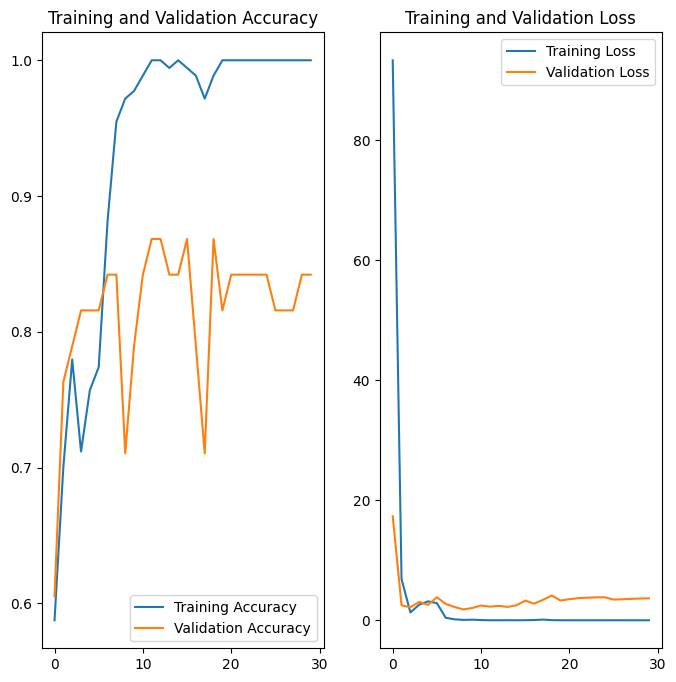

2024-04-16 22:29:44.139961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 364ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8636363636363636
Recall: 0.8636363636363636
F1-Score: 0.8636363636363636


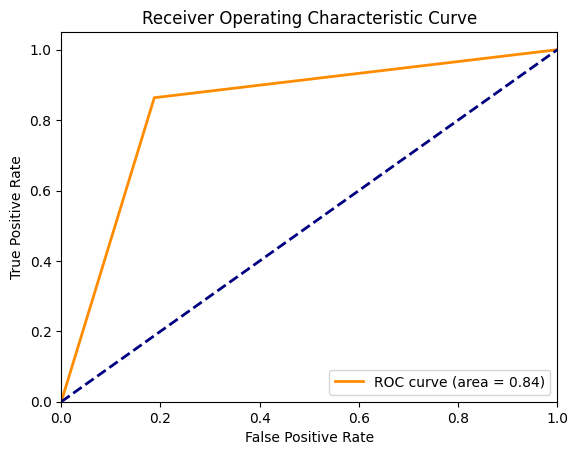

In [107]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(100, activation='relu')(y) 
    y = layers.Dense(1, activation='sigmoid')(y)

    model_1 = tf.keras.Model(x,y)
    model_1._name = 'Model_1'
    
    if i == 0:
        model_1.summary()

    # COMPILING
    model_1.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_1.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_1.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_1
    del history


Model: "Model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_160 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_159 (Dept  (None, 398, 398, 1)          10        ['input_160[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1192 (Conv2D)        (None, 398, 398, 8)          80        ['depthwise_conv2d_159[0][0]']
                                                                                                  
 max_pooling2d_674 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1192[0][0]']   

2024-04-16 22:29:45.922863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 60.9296 - accuracy: 0.5876

2024-04-16 22:29:56.868281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 15s 266ms/step - loss: 60.9296 - accuracy: 0.5876 - val_loss: 10.6930 - val_accuracy: 0.5263
Epoch 2/30
36/36 [==============================] - 3s 72ms/step - loss: 1.5140 - accuracy: 0.7401 - val_loss: 2.5931 - val_accuracy: 0.5526
Epoch 3/30
36/36 [==============================] - 1s 25ms/step - loss: 0.7227 - accuracy: 0.7910 - val_loss: 1.5971 - val_accuracy: 0.7105
Epoch 4/30
36/36 [==============================] - 2s 43ms/step - loss: 0.5958 - accuracy: 0.8305 - val_loss: 1.7042 - val_accuracy: 0.6579
Epoch 5/30
36/36 [==============================] - 2s 43ms/step - loss: 0.4650 - accuracy: 0.8644 - val_loss: 1.6836 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 0.2852 - accuracy: 0.9096 - val_loss: 1.5690 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 1s 33ms/step - loss: 0.2050 - accuracy: 0.9661 - val_loss: 1.5413 - val_accuracy: 0.7368
Epoch 8/30
36/36 [==

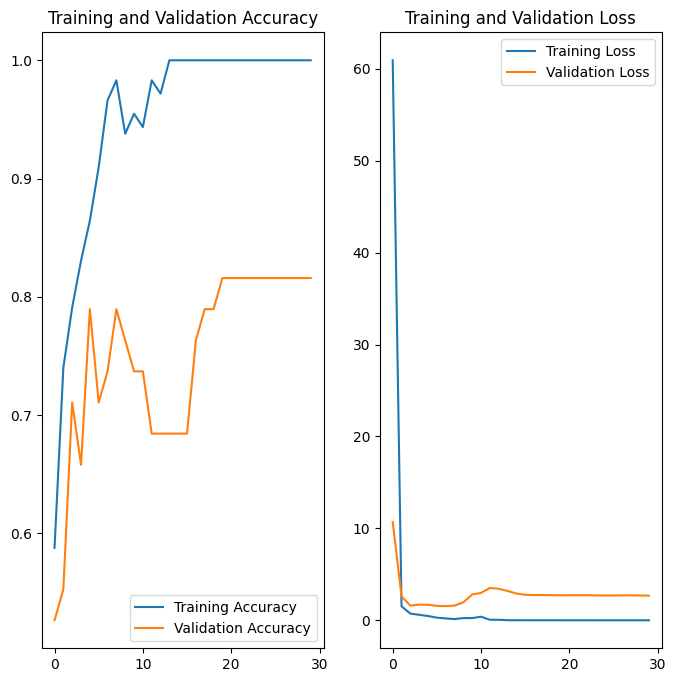

2024-04-16 22:30:28.022116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 458ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8260869565217391
Recall: 0.8636363636363636
F1-Score: 0.8444444444444444


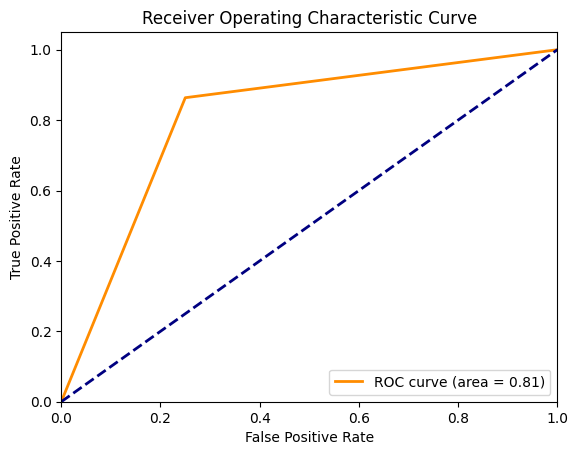

Epoch 1/30


2024-04-16 22:30:29.840267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 9.2590 - accuracy: 0.6780

2024-04-16 22:30:40.829959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 13s 242ms/step - loss: 9.2590 - accuracy: 0.6780 - val_loss: 2.0910 - val_accuracy: 0.6053
Epoch 2/30
36/36 [==============================] - 2s 59ms/step - loss: 1.5357 - accuracy: 0.5028 - val_loss: 1.5070 - val_accuracy: 0.4474
Epoch 3/30
36/36 [==============================] - 1s 38ms/step - loss: 2.1187 - accuracy: 0.5367 - val_loss: 1.5645 - val_accuracy: 0.4211
Epoch 4/30
36/36 [==============================] - 1s 26ms/step - loss: 1.9456 - accuracy: 0.5085 - val_loss: 23.7873 - val_accuracy: 0.4737
Epoch 5/30
36/36 [==============================] - 1s 20ms/step - loss: 26.4783 - accuracy: 0.6610 - val_loss: 26.8678 - val_accuracy: 0.7105
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 11.4465 - accuracy: 0.6667 - val_loss: 54.2188 - val_accuracy: 0.5000
Epoch 7/30
36/36 [==============================] - 1s 27ms/step - loss: 21.0697 - accuracy: 0.6497 - val_loss: 20.1107 - val_accuracy: 0.6316
Epoch 8/30
36/3

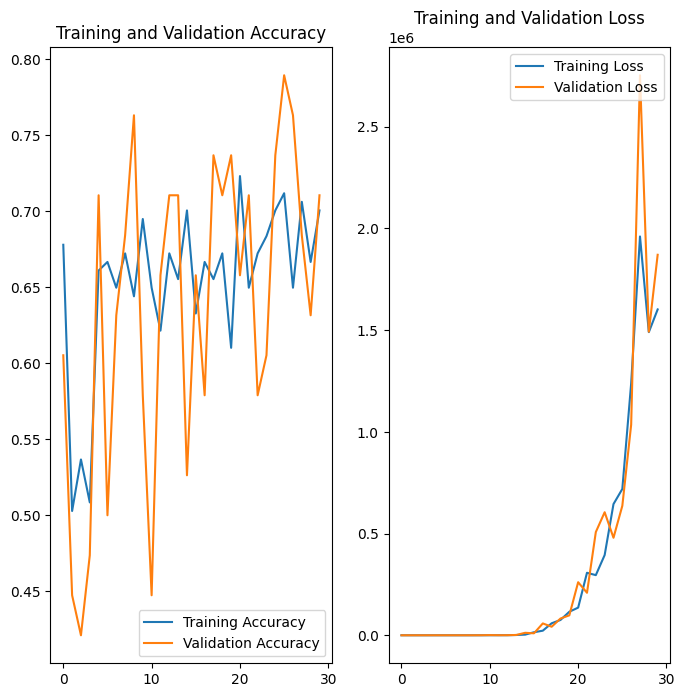

2024-04-16 22:31:12.486353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 436ms/step
Overall Accuracy: 0.6578947368421053
Precision: 0.7368421052631579
Recall: 0.6363636363636364
F1-Score: 0.6829268292682926


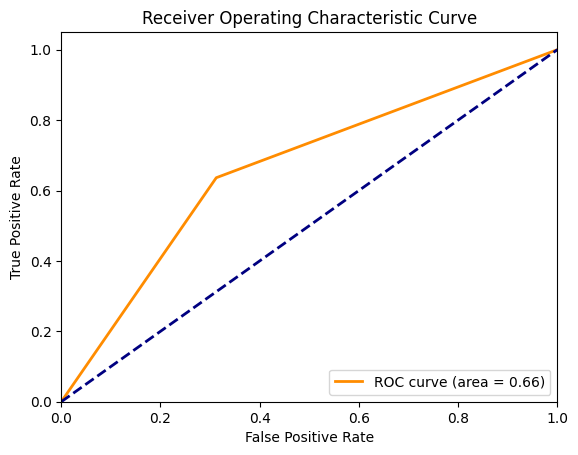

Epoch 1/30


2024-04-16 22:31:14.270211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 31.7289 - accuracy: 0.6949

2024-04-16 22:31:24.648979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 14s 286ms/step - loss: 31.7289 - accuracy: 0.6949 - val_loss: 12.7780 - val_accuracy: 0.6842
Epoch 2/30
36/36 [==============================] - 3s 77ms/step - loss: 3.0781 - accuracy: 0.6780 - val_loss: 6.4338 - val_accuracy: 0.5263
Epoch 3/30
36/36 [==============================] - 2s 47ms/step - loss: 4.8356 - accuracy: 0.6949 - val_loss: 6.8798 - val_accuracy: 0.7368
Epoch 4/30
36/36 [==============================] - 2s 50ms/step - loss: 2.0121 - accuracy: 0.7966 - val_loss: 10.4004 - val_accuracy: 0.6316
Epoch 5/30
36/36 [==============================] - 1s 22ms/step - loss: 0.4567 - accuracy: 0.8588 - val_loss: 5.3831 - val_accuracy: 0.7368
Epoch 6/30
36/36 [==============================] - 1s 29ms/step - loss: 0.4539 - accuracy: 0.8927 - val_loss: 6.9856 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 0.3087 - accuracy: 0.9379 - val_loss: 8.2904 - val_accuracy: 0.7632
Epoch 8/30
36/36 [=

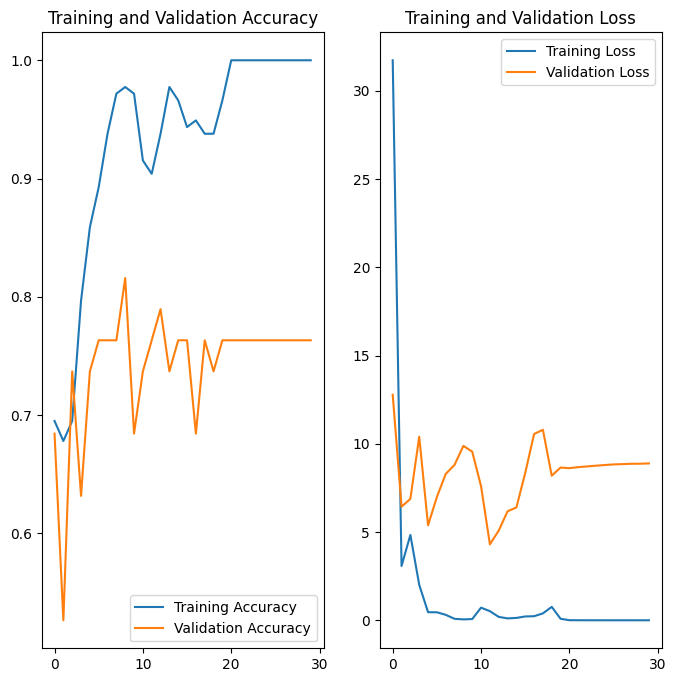

2024-04-16 22:31:58.317749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 763ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.8181818181818182
Recall: 0.8181818181818182
F1-Score: 0.8181818181818182


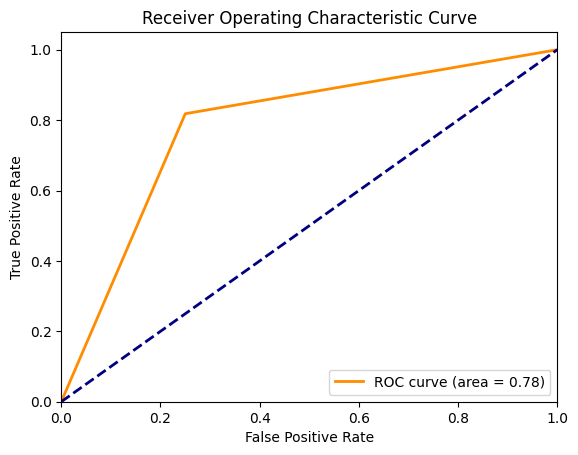

Epoch 1/30


2024-04-16 22:32:00.244857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 33.7812 - accuracy: 0.6497

2024-04-16 22:32:12.479594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 16s 310ms/step - loss: 33.7812 - accuracy: 0.6497 - val_loss: 2.5776 - val_accuracy: 0.8421
Epoch 2/30
36/36 [==============================] - 1s 39ms/step - loss: 1.0530 - accuracy: 0.8362 - val_loss: 1.7553 - val_accuracy: 0.7632
Epoch 3/30
36/36 [==============================] - 1s 38ms/step - loss: 0.2163 - accuracy: 0.9096 - val_loss: 1.4572 - val_accuracy: 0.7632
Epoch 4/30
36/36 [==============================] - 1s 42ms/step - loss: 0.1399 - accuracy: 0.9548 - val_loss: 1.7739 - val_accuracy: 0.7368
Epoch 5/30
36/36 [==============================] - 1s 28ms/step - loss: 0.1239 - accuracy: 0.9379 - val_loss: 1.1965 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 2s 49ms/step - loss: 0.0264 - accuracy: 0.9887 - val_loss: 1.3938 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 1s 42ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 1.5196 - val_accuracy: 0.8158
Epoch 8/30
36/36 [===

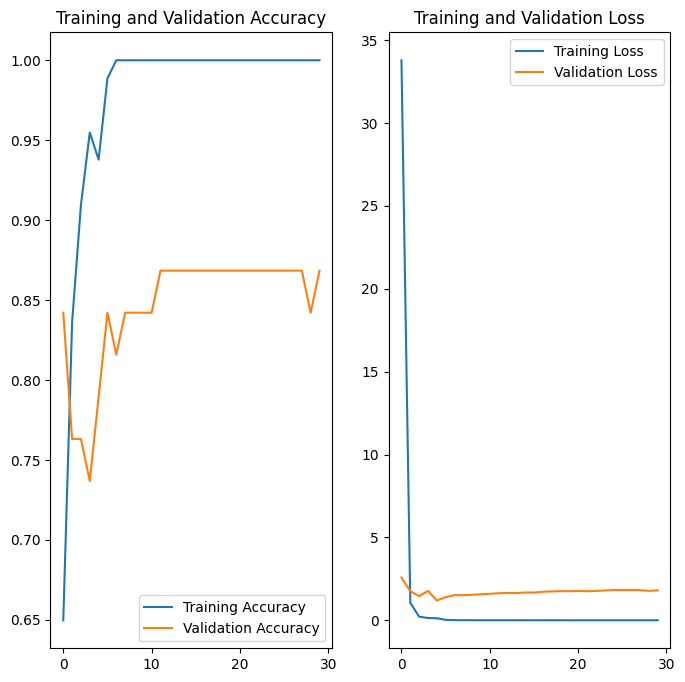

2024-04-16 22:32:43.552612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 764ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1-Score: 0.8695652173913043


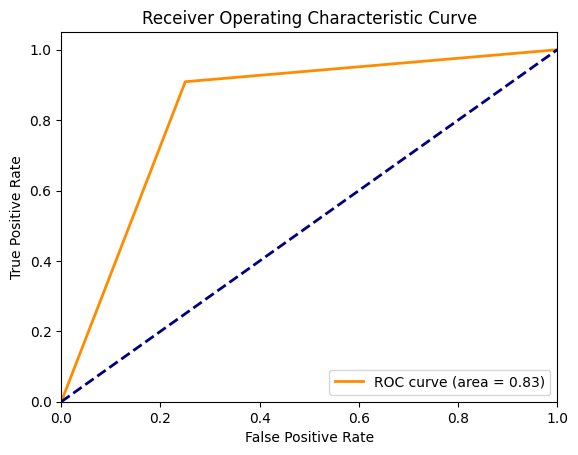

Epoch 1/30


2024-04-16 22:32:45.689982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 45.0925 - accuracy: 0.6384

2024-04-16 22:33:00.212579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 19s 402ms/step - loss: 45.0925 - accuracy: 0.6384 - val_loss: 11.7759 - val_accuracy: 0.7895
Epoch 2/30
36/36 [==============================] - 2s 68ms/step - loss: 6.4865 - accuracy: 0.7966 - val_loss: 13.9136 - val_accuracy: 0.7105
Epoch 3/30
36/36 [==============================] - 2s 50ms/step - loss: 2.6187 - accuracy: 0.8249 - val_loss: 8.0971 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 1s 42ms/step - loss: 2.1201 - accuracy: 0.8136 - val_loss: 11.7570 - val_accuracy: 0.7632
Epoch 5/30
36/36 [==============================] - 1s 40ms/step - loss: 1.0922 - accuracy: 0.8814 - val_loss: 6.6419 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 2s 43ms/step - loss: 0.2272 - accuracy: 0.9492 - val_loss: 5.1708 - val_accuracy: 0.7368
Epoch 7/30
36/36 [==============================] - 1s 19ms/step - loss: 0.1224 - accuracy: 0.9605 - val_loss: 5.1318 - val_accuracy: 0.7895
Epoch 8/30
36/36 [

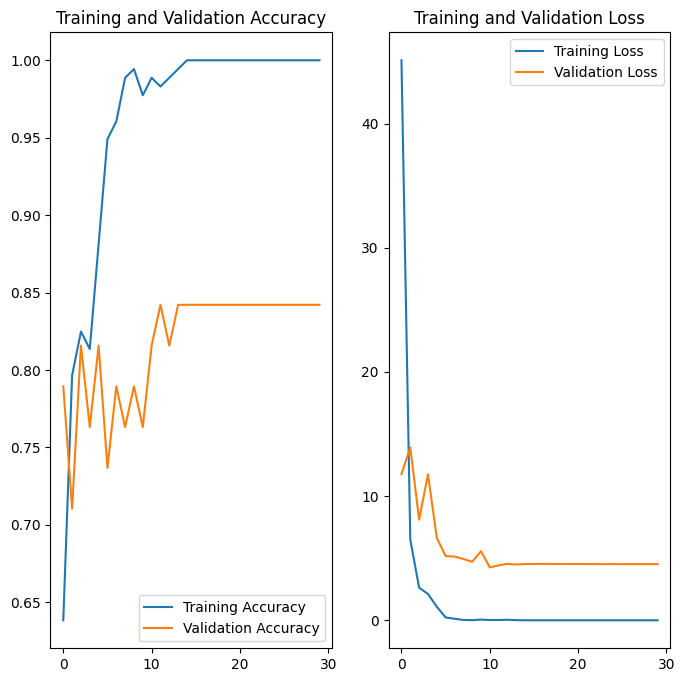

2024-04-16 22:33:35.532690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 474ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8571428571428571
Recall: 0.8181818181818182
F1-Score: 0.8372093023255814


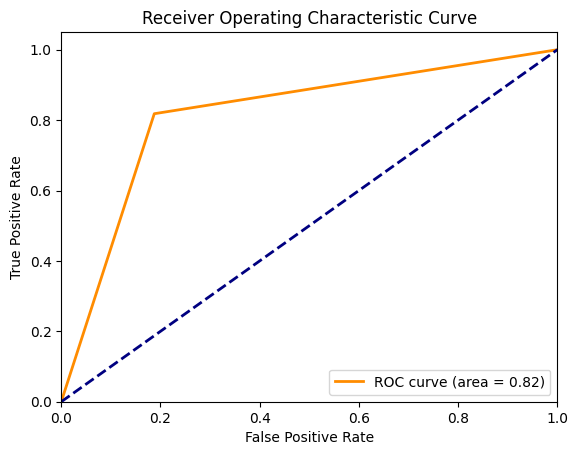

In [108]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2 = tf.keras.Model(x,y)
    model_2._name = 'Model_2'
    
    if i == 0:
        model_2.summary()

    # COMPILING
    model_2.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_2.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2
    del history


In [109]:
def res_block_adj(x, ch_in, ch_out):
  fx = layers.Conv2D(ch_in/2, (1,1), padding='same', strides=(1,1), activation='relu')(x)
  fx = layers.Conv2D(ch_in/2, (3,3), padding='same', strides=(1,1), activation='relu')(fx)
  fx = layers.Conv2D(ch_out, (1,1), padding='same', strides=(1,1))(fx)

  skip_connection = layers.Conv2D(ch_out, (1,1), padding='same', strides=(1,1))(x)

  out = layers.Add()([skip_connection, fx])
  out = layers.Activation('relu')(out)
  return out

Model: "Model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_165 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_164 (Dept  (None, 398, 398, 1)          10        ['input_165[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1217 (Conv2D)        (None, 398, 398, 8)          208       ['depthwise_conv2d_164[0][0]']
                                                                                                  
 max_pooling2d_694 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1217[0][0]']   

2024-04-16 22:33:37.388567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 59.2697 - accuracy: 0.6610

2024-04-16 22:33:56.874301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 25s 472ms/step - loss: 59.2697 - accuracy: 0.6610 - val_loss: 6.2284 - val_accuracy: 0.8684
Epoch 2/30
36/36 [==============================] - 3s 84ms/step - loss: 4.2832 - accuracy: 0.7232 - val_loss: 1.3620 - val_accuracy: 0.9474
Epoch 3/30
36/36 [==============================] - 2s 68ms/step - loss: 0.7919 - accuracy: 0.8644 - val_loss: 1.9771 - val_accuracy: 0.8684
Epoch 4/30
36/36 [==============================] - 2s 57ms/step - loss: 0.2532 - accuracy: 0.9266 - val_loss: 1.9331 - val_accuracy: 0.8684
Epoch 5/30
36/36 [==============================] - 1s 35ms/step - loss: 0.1345 - accuracy: 0.9605 - val_loss: 1.3885 - val_accuracy: 0.8947
Epoch 6/30
36/36 [==============================] - 2s 53ms/step - loss: 0.0576 - accuracy: 0.9831 - val_loss: 1.5463 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 1s 25ms/step - loss: 0.0170 - accuracy: 0.9944 - val_loss: 1.5848 - val_accuracy: 0.8947
Epoch 8/30
36/36 [===

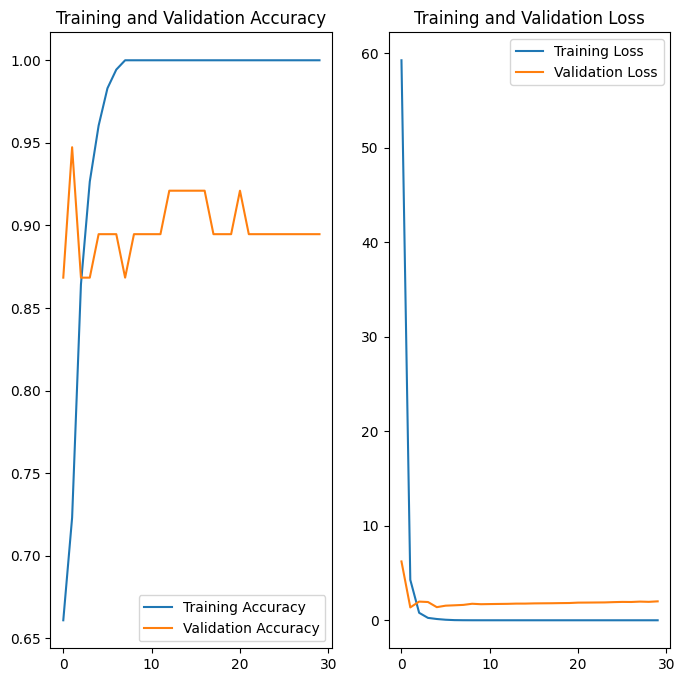

2024-04-16 22:34:37.243314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step
Overall Accuracy: 0.9210526315789473
Precision: 0.88
Recall: 1.0
F1-Score: 0.9361702127659575


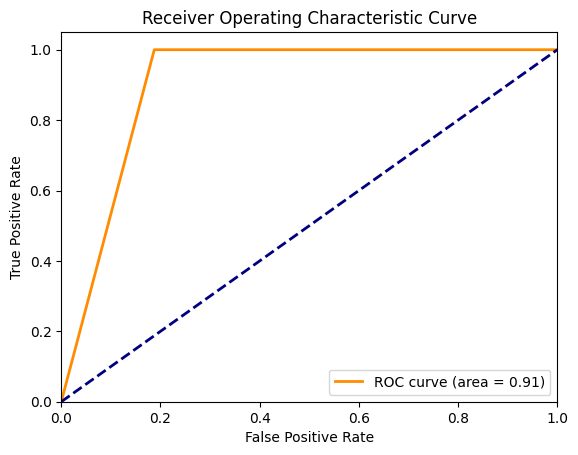

Epoch 1/30


2024-04-16 22:34:40.563819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 611.7935 - accuracy: 0.5424

2024-04-16 22:34:59.752235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 24s 459ms/step - loss: 611.7935 - accuracy: 0.5424 - val_loss: 105.6447 - val_accuracy: 0.7105
Epoch 2/30
36/36 [==============================] - 3s 80ms/step - loss: 87.0867 - accuracy: 0.6723 - val_loss: 48.3837 - val_accuracy: 0.5789
Epoch 3/30
36/36 [==============================] - 2s 46ms/step - loss: 38.0617 - accuracy: 0.6836 - val_loss: 40.3844 - val_accuracy: 0.5526
Epoch 4/30
36/36 [==============================] - 2s 56ms/step - loss: 75.9556 - accuracy: 0.6723 - val_loss: 44.2794 - val_accuracy: 0.5526
Epoch 5/30
36/36 [==============================] - 2s 62ms/step - loss: 53.6186 - accuracy: 0.7288 - val_loss: 45.5472 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 4s 102ms/step - loss: 19.7836 - accuracy: 0.8136 - val_loss: 51.1020 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 2s 51ms/step - loss: 15.1316 - accuracy: 0.8362 - val_loss: 43.4522 - val_accuracy: 0.5789
Epoch

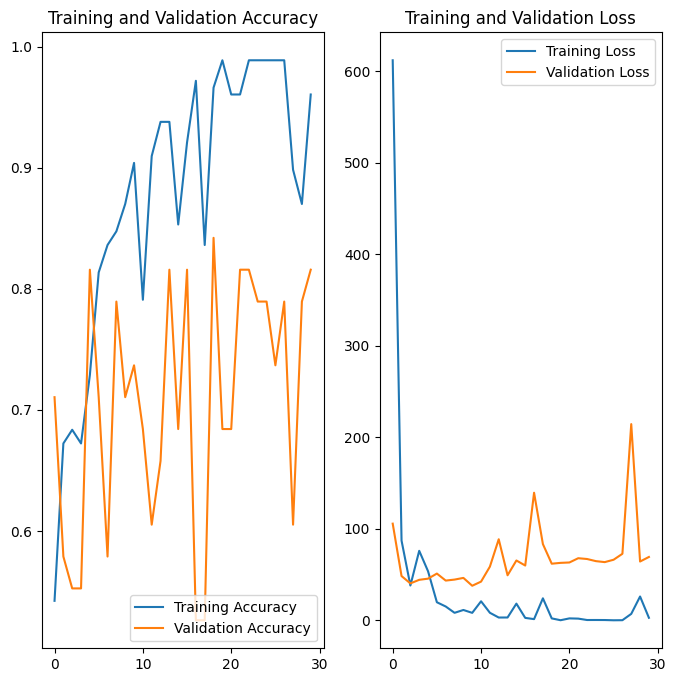

2024-04-16 22:35:41.954153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step
Overall Accuracy: 0.868421052631579
Precision: 0.8148148148148148
Recall: 1.0
F1-Score: 0.8979591836734693


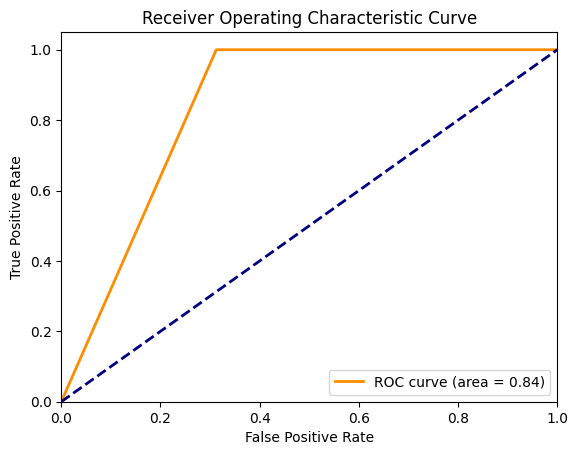

Epoch 1/30


2024-04-16 22:35:45.118339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 17.9345 - accuracy: 0.5763

2024-04-16 22:36:04.509739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 24s 479ms/step - loss: 17.9345 - accuracy: 0.5763 - val_loss: 10.4501 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 3s 90ms/step - loss: 6.9643 - accuracy: 0.7119 - val_loss: 8.1112 - val_accuracy: 0.7895
Epoch 3/30
36/36 [==============================] - 3s 78ms/step - loss: 5.7971 - accuracy: 0.7853 - val_loss: 4.3942 - val_accuracy: 0.8421
Epoch 4/30
36/36 [==============================] - 2s 63ms/step - loss: 1.1171 - accuracy: 0.8870 - val_loss: 3.4143 - val_accuracy: 0.9211
Epoch 5/30
36/36 [==============================] - 1s 29ms/step - loss: 0.6020 - accuracy: 0.9379 - val_loss: 3.2605 - val_accuracy: 0.8947
Epoch 6/30
36/36 [==============================] - 1s 37ms/step - loss: 0.1537 - accuracy: 0.9605 - val_loss: 3.7355 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 1s 31ms/step - loss: 0.0807 - accuracy: 0.9831 - val_loss: 4.7978 - val_accuracy: 0.8684
Epoch 8/30
36/36 [==

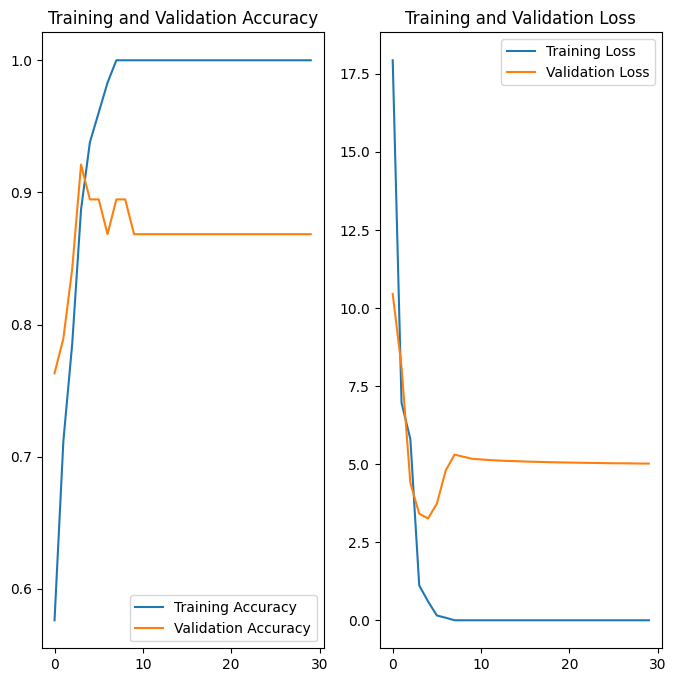

2024-04-16 22:36:51.243153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8636363636363636
Recall: 0.8636363636363636
F1-Score: 0.8636363636363636


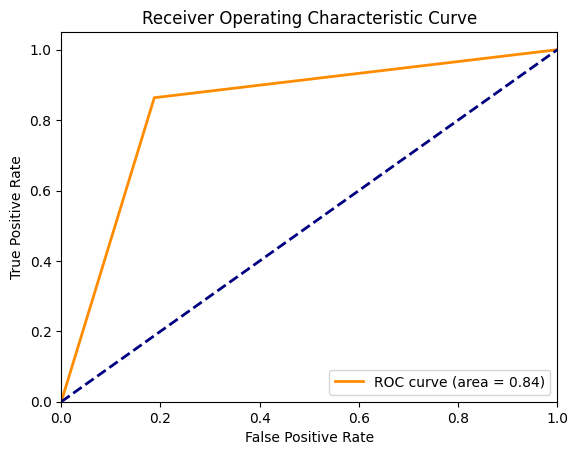

Epoch 1/30


2024-04-16 22:36:54.632234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 81.5521 - accuracy: 0.6215

2024-04-16 22:37:16.081528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 27s 527ms/step - loss: 81.5521 - accuracy: 0.6215 - val_loss: 7.5947 - val_accuracy: 0.5789
Epoch 2/30
36/36 [==============================] - 4s 118ms/step - loss: 4.6864 - accuracy: 0.7627 - val_loss: 2.4700 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 2s 50ms/step - loss: 0.5460 - accuracy: 0.8927 - val_loss: 2.0723 - val_accuracy: 0.8421
Epoch 4/30
36/36 [==============================] - 2s 54ms/step - loss: 0.2859 - accuracy: 0.9209 - val_loss: 3.5082 - val_accuracy: 0.8421
Epoch 5/30
36/36 [==============================] - 2s 42ms/step - loss: 0.0744 - accuracy: 0.9605 - val_loss: 3.8869 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 1s 26ms/step - loss: 0.0453 - accuracy: 0.9831 - val_loss: 3.1171 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 1s 36ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 3.0522 - val_accuracy: 0.8421
Epoch 8/30
36/36 [==

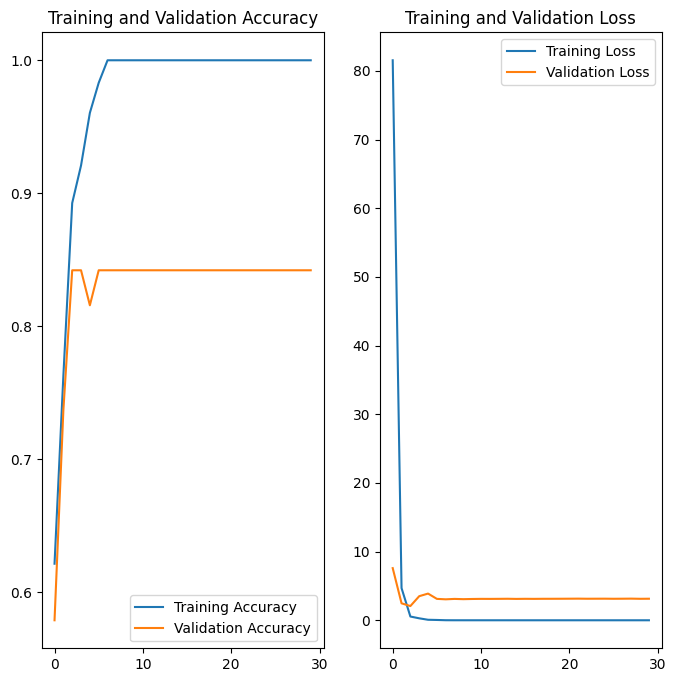

2024-04-16 22:37:57.290682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 1s/step
Overall Accuracy: 0.868421052631579
Precision: 0.84
Recall: 0.9545454545454546
F1-Score: 0.8936170212765958


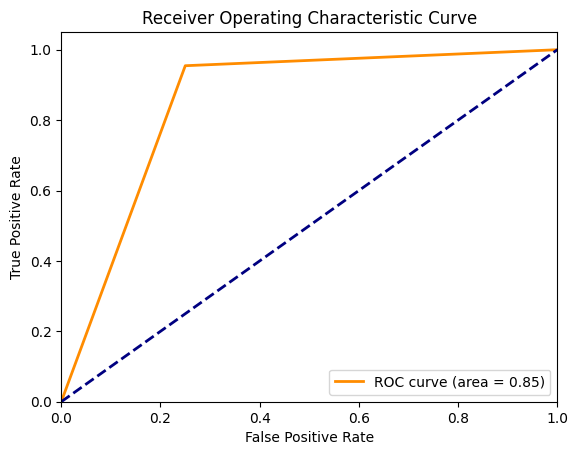

Epoch 1/30


2024-04-16 22:37:59.981159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 30.4781 - accuracy: 0.6328

2024-04-16 22:38:18.338089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 23s 446ms/step - loss: 30.4781 - accuracy: 0.6328 - val_loss: 26.7988 - val_accuracy: 0.7368
Epoch 2/30
36/36 [==============================] - 4s 99ms/step - loss: 13.5440 - accuracy: 0.7232 - val_loss: 14.7613 - val_accuracy: 0.8421
Epoch 3/30
36/36 [==============================] - 2s 68ms/step - loss: 12.0052 - accuracy: 0.7345 - val_loss: 15.5575 - val_accuracy: 0.8421
Epoch 4/30
36/36 [==============================] - 2s 66ms/step - loss: 11.7496 - accuracy: 0.7345 - val_loss: 14.3127 - val_accuracy: 0.8421
Epoch 5/30
36/36 [==============================] - 1s 42ms/step - loss: 11.4485 - accuracy: 0.7232 - val_loss: 14.5252 - val_accuracy: 0.8421
Epoch 6/30
36/36 [==============================] - 1s 25ms/step - loss: 11.0441 - accuracy: 0.7288 - val_loss: 14.0806 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 1s 41ms/step - loss: 10.6484 - accuracy: 0.7401 - val_loss: 13.7539 - val_accuracy: 0.8421
Epoch 8/

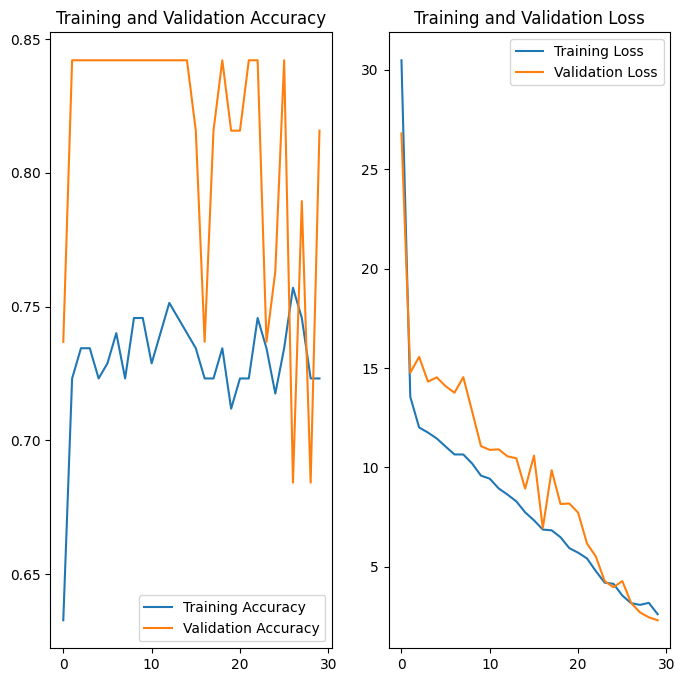

2024-04-16 22:39:02.382358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step
Overall Accuracy: 0.631578947368421
Precision: 0.7
Recall: 0.6363636363636364
F1-Score: 0.6666666666666666


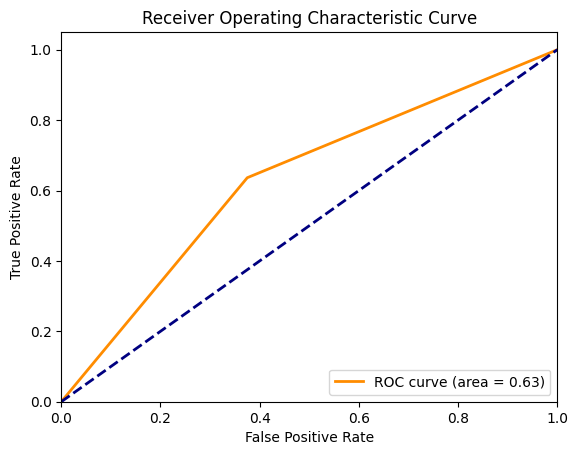

In [110]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)
    
    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)    

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_3 = tf.keras.Model(x,y)
    model_3._name = 'Model_3'
    
    if i == 0:
        model_3.summary()

    # COMPILING
    model_3.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_3.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_3.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_3
    del history


Model: "Model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_170 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_169 (Dept  (None, 398, 398, 1)          10        ['input_170[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1282 (Conv2D)        (None, 398, 398, 8)          208       ['depthwise_conv2d_169[0][0]']
                                                                                                  
 max_pooling2d_714 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1282[0][0]']   

2024-04-16 22:39:05.894851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 47.5479 - accuracy: 0.5198

2024-04-16 22:39:33.832121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 36s 689ms/step - loss: 47.5479 - accuracy: 0.5198 - val_loss: 2.6259 - val_accuracy: 0.4474
Epoch 2/30
36/36 [==============================] - 2s 62ms/step - loss: 2.0933 - accuracy: 0.6554 - val_loss: 1.9758 - val_accuracy: 0.6579
Epoch 3/30
36/36 [==============================] - 4s 103ms/step - loss: 1.6473 - accuracy: 0.6328 - val_loss: 0.8651 - val_accuracy: 0.6579
Epoch 4/30
36/36 [==============================] - 3s 71ms/step - loss: 1.6534 - accuracy: 0.6554 - val_loss: 0.8993 - val_accuracy: 0.6053
Epoch 5/30
36/36 [==============================] - 3s 78ms/step - loss: 0.7711 - accuracy: 0.7740 - val_loss: 1.4964 - val_accuracy: 0.6579
Epoch 6/30
36/36 [==============================] - 1s 28ms/step - loss: 1.5486 - accuracy: 0.6441 - val_loss: 0.6227 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 27ms/step - loss: 0.8972 - accuracy: 0.7514 - val_loss: 3.0868 - val_accuracy: 0.4474
Epoch 8/30
36/36 [==

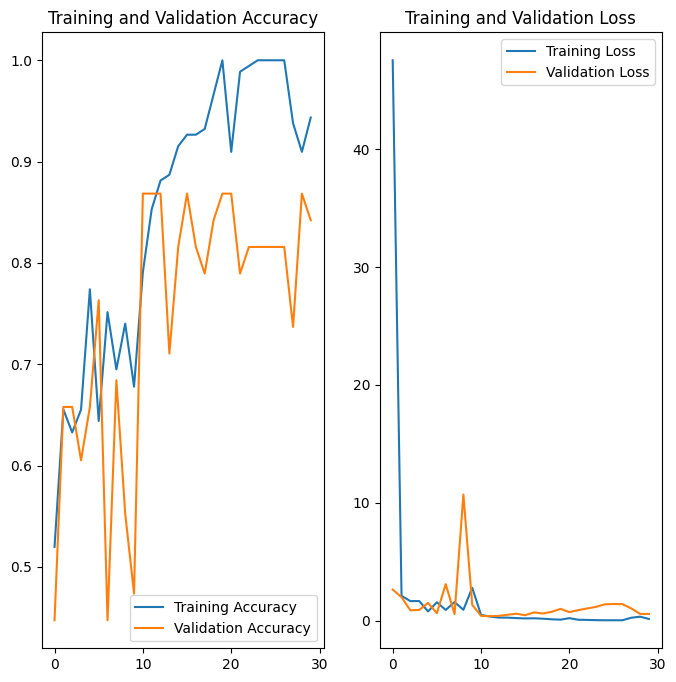

2024-04-16 22:40:30.703635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 2s/step
Overall Accuracy: 0.8157894736842105
Precision: 0.7777777777777778
Recall: 0.9545454545454546
F1-Score: 0.8571428571428572


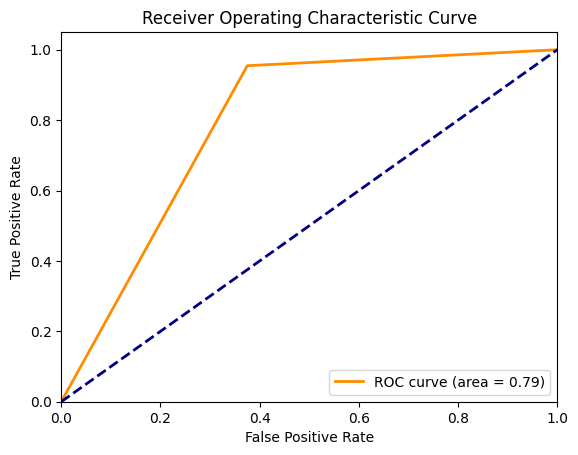

Epoch 1/30


2024-04-16 22:40:35.856684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 6.3075 - accuracy: 0.5989

2024-04-16 22:40:58.971232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 29s 484ms/step - loss: 6.3075 - accuracy: 0.5989 - val_loss: 1.6627 - val_accuracy: 0.6053
Epoch 2/30
36/36 [==============================] - 2s 51ms/step - loss: 0.6792 - accuracy: 0.6949 - val_loss: 0.6377 - val_accuracy: 0.6842
Epoch 3/30
36/36 [==============================] - 2s 64ms/step - loss: 0.5415 - accuracy: 0.7062 - val_loss: 0.6011 - val_accuracy: 0.7105
Epoch 4/30
36/36 [==============================] - 1s 28ms/step - loss: 0.4903 - accuracy: 0.7401 - val_loss: 0.6392 - val_accuracy: 0.7368
Epoch 5/30
36/36 [==============================] - 4s 107ms/step - loss: 0.4336 - accuracy: 0.7797 - val_loss: 0.4789 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 4s 113ms/step - loss: 0.3415 - accuracy: 0.8814 - val_loss: 0.5815 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 2s 57ms/step - loss: 0.2062 - accuracy: 0.9322 - val_loss: 0.5660 - val_accuracy: 0.7632
Epoch 8/30
36/36 [==

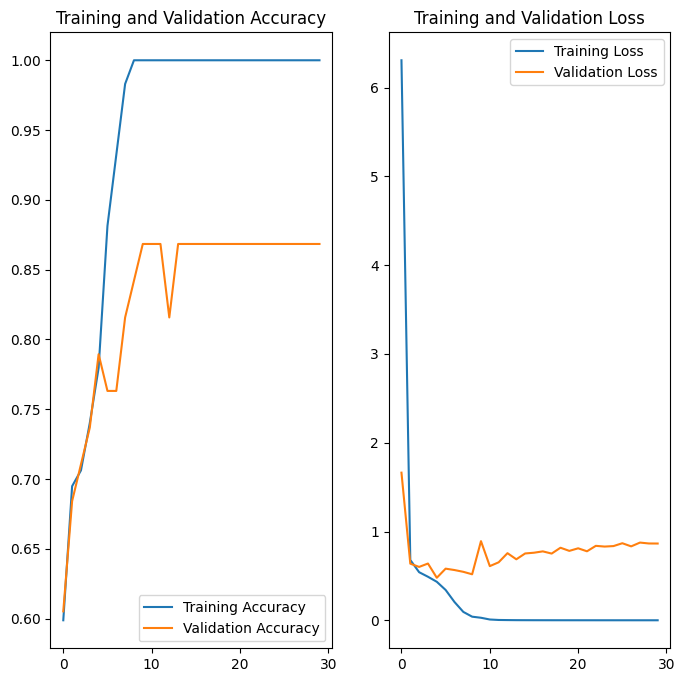

2024-04-16 22:41:48.434093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 3s 1s/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8260869565217391
Recall: 0.8636363636363636
F1-Score: 0.8444444444444444


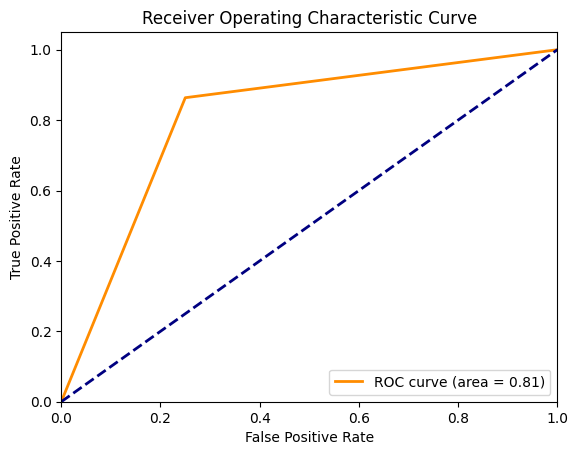

Epoch 1/30


2024-04-16 22:41:52.385436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 2.0037 - accuracy: 0.6441

2024-04-16 22:42:14.221642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 25s 418ms/step - loss: 2.0037 - accuracy: 0.6441 - val_loss: 0.6610 - val_accuracy: 0.4737
Epoch 2/30
36/36 [==============================] - 4s 111ms/step - loss: 0.5801 - accuracy: 0.6949 - val_loss: 0.5963 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 3s 86ms/step - loss: 0.5370 - accuracy: 0.7345 - val_loss: 0.6617 - val_accuracy: 0.7105
Epoch 4/30
36/36 [==============================] - 2s 63ms/step - loss: 0.5140 - accuracy: 0.7062 - val_loss: 0.5474 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 2s 46ms/step - loss: 0.4870 - accuracy: 0.7910 - val_loss: 0.5782 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 2s 56ms/step - loss: 0.4666 - accuracy: 0.7571 - val_loss: 0.4876 - val_accuracy: 0.6842
Epoch 7/30
36/36 [==============================] - 2s 68ms/step - loss: 0.4906 - accuracy: 0.7740 - val_loss: 0.5319 - val_accuracy: 0.8421
Epoch 8/30
36/36 [===

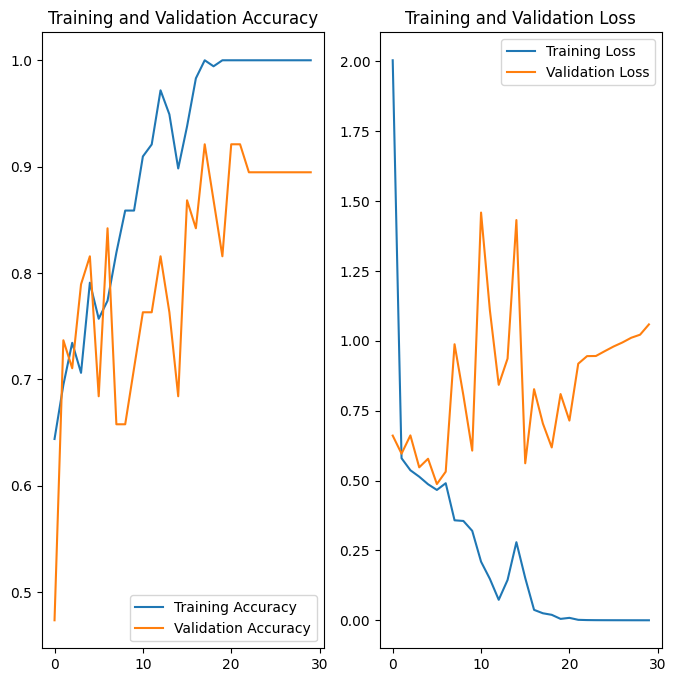

2024-04-16 22:43:08.596478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8260869565217391
Recall: 0.8636363636363636
F1-Score: 0.8444444444444444


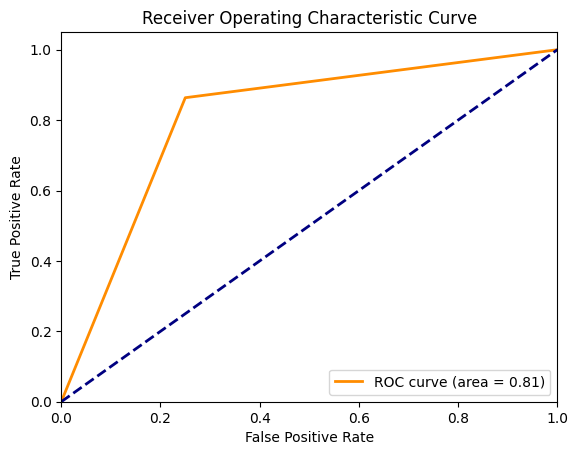

Epoch 1/30


2024-04-16 22:43:15.575056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 46.9001 - accuracy: 0.6328

2024-04-16 22:43:42.054362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 35s 607ms/step - loss: 46.9001 - accuracy: 0.6328 - val_loss: 11.8955 - val_accuracy: 0.5789
Epoch 2/30
36/36 [==============================] - 5s 132ms/step - loss: 8.0517 - accuracy: 0.6384 - val_loss: 6.5633 - val_accuracy: 0.5000
Epoch 3/30
36/36 [==============================] - 2s 61ms/step - loss: 3.4844 - accuracy: 0.6780 - val_loss: 2.5592 - val_accuracy: 0.6579
Epoch 4/30
36/36 [==============================] - 3s 74ms/step - loss: 1.6573 - accuracy: 0.7175 - val_loss: 6.1730 - val_accuracy: 0.5526
Epoch 5/30
36/36 [==============================] - 1s 42ms/step - loss: 1.5947 - accuracy: 0.6836 - val_loss: 1.5662 - val_accuracy: 0.7105
Epoch 6/30
36/36 [==============================] - 2s 45ms/step - loss: 1.2130 - accuracy: 0.7458 - val_loss: 1.6969 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 1s 27ms/step - loss: 1.7099 - accuracy: 0.6949 - val_loss: 0.9297 - val_accuracy: 0.8421
Epoch 8/30
36/36 [=

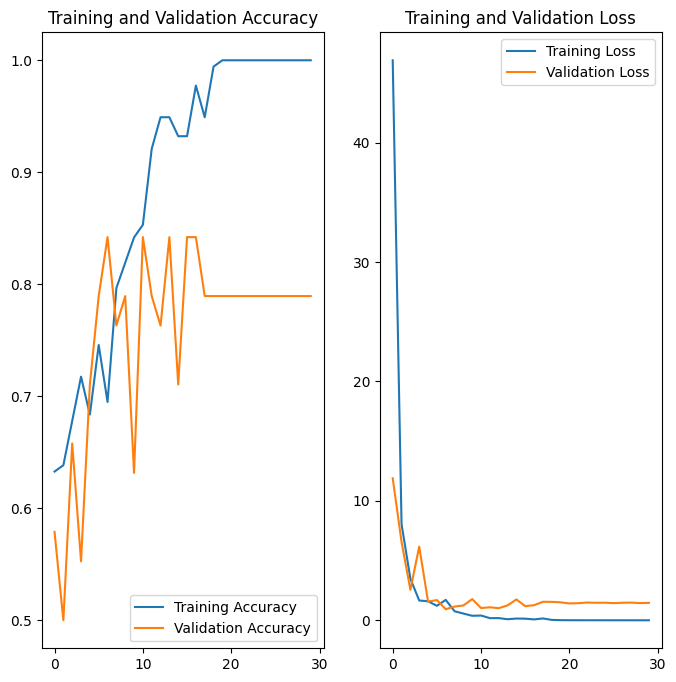

2024-04-16 22:44:37.404137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8260869565217391
Recall: 0.8636363636363636
F1-Score: 0.8444444444444444


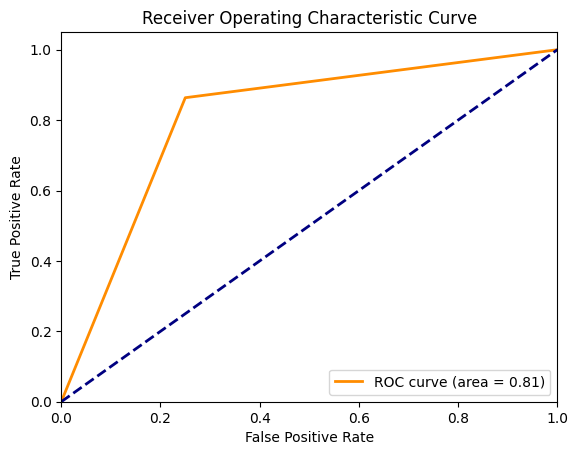

Epoch 1/30


2024-04-16 22:44:41.870038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 5.9734 - accuracy: 0.6836

2024-04-16 22:45:08.463975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 34s 702ms/step - loss: 5.9734 - accuracy: 0.6836 - val_loss: 2.6710 - val_accuracy: 0.6842
Epoch 2/30
36/36 [==============================] - 4s 121ms/step - loss: 2.0904 - accuracy: 0.6497 - val_loss: 1.3657 - val_accuracy: 0.6579
Epoch 3/30
36/36 [==============================] - 3s 95ms/step - loss: 2.1010 - accuracy: 0.6667 - val_loss: 2.2945 - val_accuracy: 0.6579
Epoch 4/30
36/36 [==============================] - 2s 42ms/step - loss: 1.8802 - accuracy: 0.6667 - val_loss: 2.0296 - val_accuracy: 0.6579
Epoch 5/30
36/36 [==============================] - 3s 73ms/step - loss: 1.5768 - accuracy: 0.6723 - val_loss: 3.0991 - val_accuracy: 0.5526
Epoch 6/30
36/36 [==============================] - 6s 184ms/step - loss: 1.1183 - accuracy: 0.7345 - val_loss: 0.8819 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 3s 91ms/step - loss: 0.8631 - accuracy: 0.7571 - val_loss: 1.2877 - val_accuracy: 0.6316
Epoch 8/30
36/36 [==

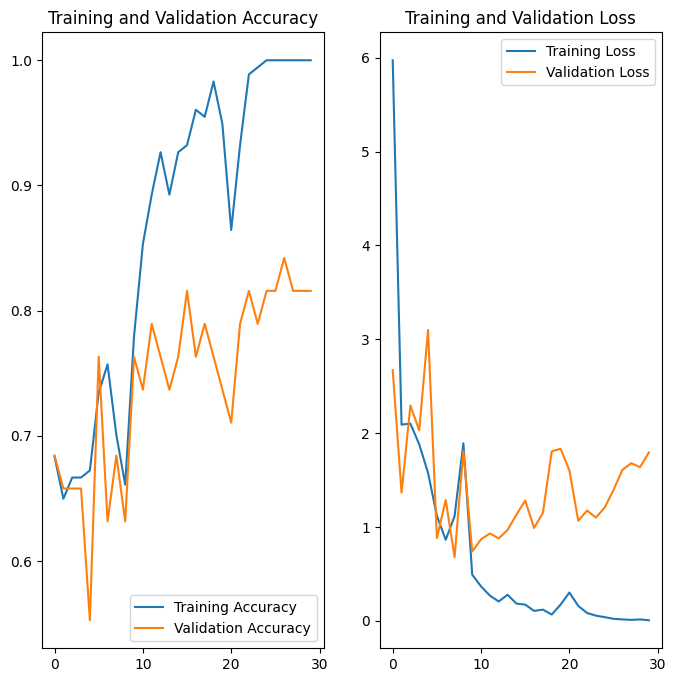

2024-04-16 22:46:06.403117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 2s/step
Overall Accuracy: 0.8157894736842105
Precision: 0.7777777777777778
Recall: 0.9545454545454546
F1-Score: 0.8571428571428572


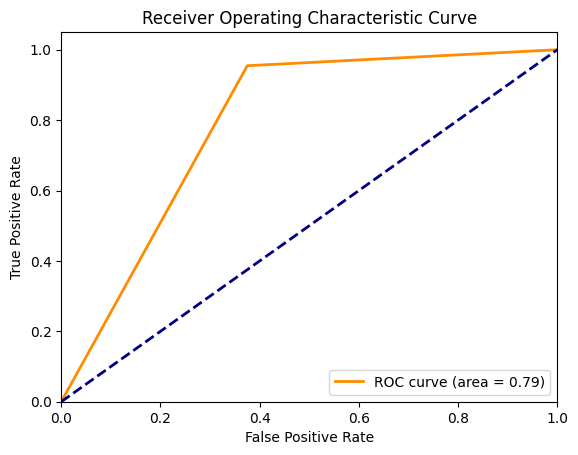

In [111]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)
    
    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_4 = tf.keras.Model(x,y)
    model_4._name = 'Model_4'
    
    if i == 0:
        model_4.summary()

    # COMPILING
    model_4.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_4.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_4.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_4
    del history


Model: "Model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_175 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_174 (Dept  (None, 398, 398, 1)          10        ['input_175[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1387 (Conv2D)        (None, 398, 398, 8)          208       ['depthwise_conv2d_174[0][0]']
                                                                                                  
 max_pooling2d_744 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1387[0][0]']   

2024-04-16 22:46:11.878336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 59.4852 - accuracy: 0.5593

2024-04-16 22:46:40.581461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 37s 714ms/step - loss: 59.4852 - accuracy: 0.5593 - val_loss: 1.2768 - val_accuracy: 0.4737
Epoch 2/30
36/36 [==============================] - 5s 133ms/step - loss: 0.6815 - accuracy: 0.7006 - val_loss: 0.6971 - val_accuracy: 0.5263
Epoch 3/30
36/36 [==============================] - 4s 103ms/step - loss: 0.4841 - accuracy: 0.7853 - val_loss: 0.7440 - val_accuracy: 0.7368
Epoch 4/30
36/36 [==============================] - 3s 77ms/step - loss: 0.3699 - accuracy: 0.8362 - val_loss: 0.5516 - val_accuracy: 0.7368
Epoch 5/30
36/36 [==============================] - 2s 60ms/step - loss: 0.2488 - accuracy: 0.9096 - val_loss: 0.4514 - val_accuracy: 0.7895
Epoch 6/30
36/36 [==============================] - 2s 52ms/step - loss: 0.1655 - accuracy: 0.9435 - val_loss: 0.4552 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 2s 44ms/step - loss: 0.0864 - accuracy: 0.9887 - val_loss: 0.4373 - val_accuracy: 0.8158
Epoch 8/30
36/36 [=

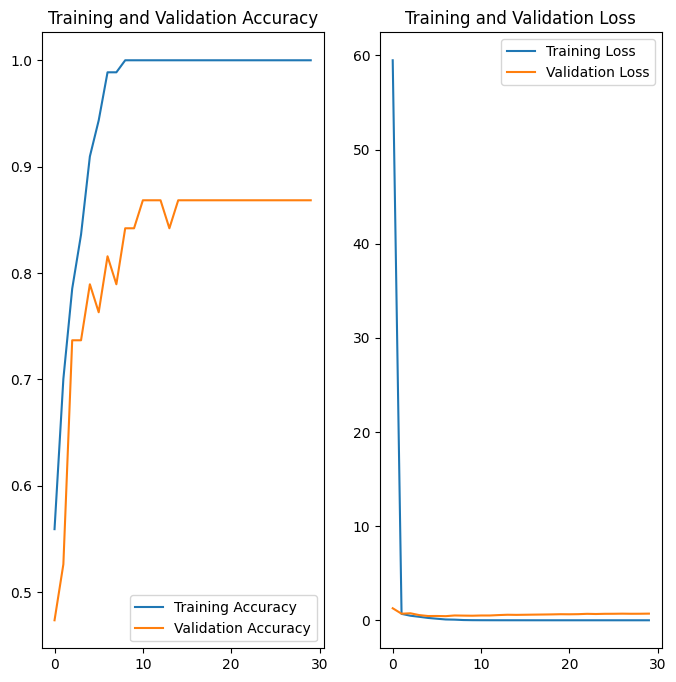

2024-04-16 22:47:39.641250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8076923076923077
Recall: 0.9545454545454546
F1-Score: 0.875


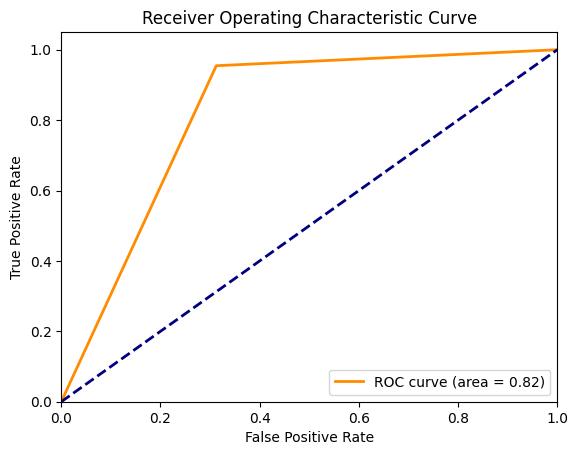

Epoch 1/30


2024-04-16 22:47:44.428791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 4.7572 - accuracy: 0.6384

2024-04-16 22:48:14.402237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 38s 755ms/step - loss: 4.7572 - accuracy: 0.6384 - val_loss: 0.5116 - val_accuracy: 0.7895
Epoch 2/30
36/36 [==============================] - 2s 61ms/step - loss: 0.5469 - accuracy: 0.7175 - val_loss: 0.7033 - val_accuracy: 0.6053
Epoch 3/30
36/36 [==============================] - 3s 94ms/step - loss: 0.5457 - accuracy: 0.7571 - val_loss: 0.4558 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 2s 43ms/step - loss: 0.4603 - accuracy: 0.7571 - val_loss: 0.4656 - val_accuracy: 0.8684
Epoch 5/30
36/36 [==============================] - 2s 64ms/step - loss: 0.3391 - accuracy: 0.8588 - val_loss: 0.3728 - val_accuracy: 0.9211
Epoch 6/30
36/36 [==============================] - 2s 59ms/step - loss: 0.2375 - accuracy: 0.9040 - val_loss: 0.4151 - val_accuracy: 0.8684
Epoch 7/30
36/36 [==============================] - 2s 51ms/step - loss: 0.1594 - accuracy: 0.9379 - val_loss: 0.7572 - val_accuracy: 0.7368
Epoch 8/30
36/36 [====

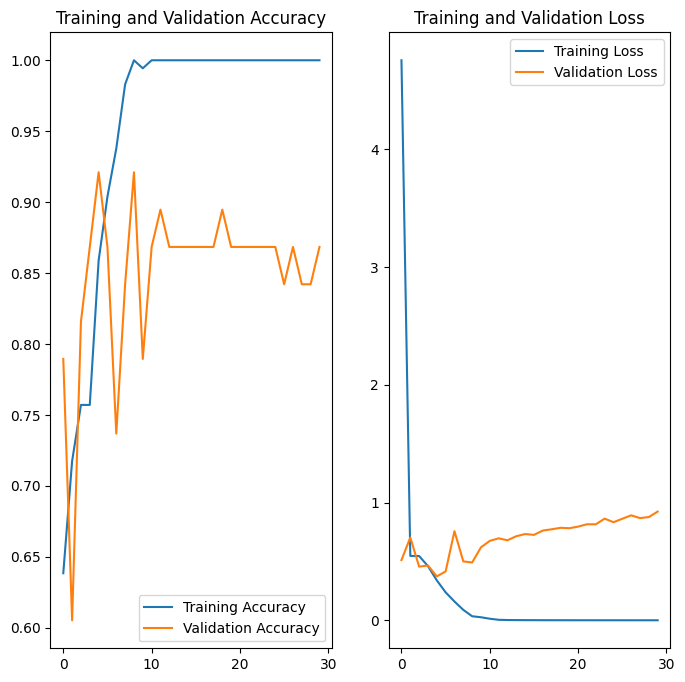

2024-04-16 22:49:08.088237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.868421052631579
Precision: 0.8148148148148148
Recall: 1.0
F1-Score: 0.8979591836734693


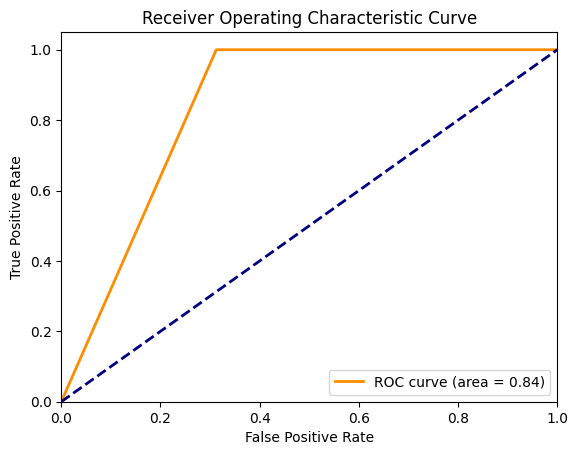

Epoch 1/30


2024-04-16 22:49:12.738430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 4.7224 - accuracy: 0.6667

2024-04-16 22:49:41.178173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 36s 722ms/step - loss: 4.7224 - accuracy: 0.6667 - val_loss: 0.5471 - val_accuracy: 0.7895
Epoch 2/30
36/36 [==============================] - 4s 125ms/step - loss: 0.5415 - accuracy: 0.7345 - val_loss: 0.5172 - val_accuracy: 0.8421
Epoch 3/30
36/36 [==============================] - 3s 96ms/step - loss: 0.4774 - accuracy: 0.7514 - val_loss: 0.4734 - val_accuracy: 0.8684
Epoch 4/30
36/36 [==============================] - 2s 46ms/step - loss: 0.3187 - accuracy: 0.8757 - val_loss: 0.4329 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 3s 96ms/step - loss: 0.1986 - accuracy: 0.9322 - val_loss: 0.4204 - val_accuracy: 0.8684
Epoch 6/30
36/36 [==============================] - 2s 49ms/step - loss: 0.0980 - accuracy: 0.9887 - val_loss: 0.7425 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - loss: 0.1003 - accuracy: 0.9718 - val_loss: 0.4175 - val_accuracy: 0.8947
Epoch 8/30
36/36 [===

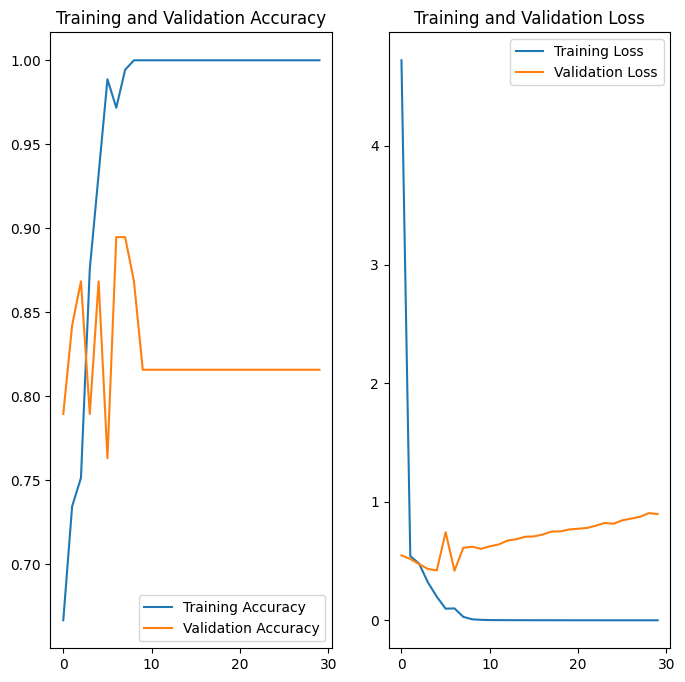

2024-04-16 22:50:35.579361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8260869565217391
Recall: 0.8636363636363636
F1-Score: 0.8444444444444444


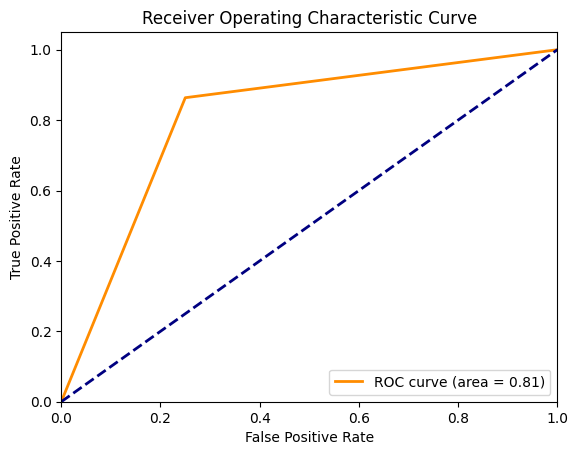

Epoch 1/30


2024-04-16 22:50:40.250862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 7.4161 - accuracy: 0.6215

2024-04-16 22:51:12.051609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 41s 797ms/step - loss: 7.4161 - accuracy: 0.6215 - val_loss: 1.0683 - val_accuracy: 0.6316
Epoch 2/30
36/36 [==============================] - 3s 92ms/step - loss: 0.7167 - accuracy: 0.7006 - val_loss: 0.4512 - val_accuracy: 0.8158
Epoch 3/30
36/36 [==============================] - 3s 83ms/step - loss: 0.5177 - accuracy: 0.7571 - val_loss: 0.4838 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 4s 103ms/step - loss: 0.4484 - accuracy: 0.7740 - val_loss: 0.4254 - val_accuracy: 0.7105
Epoch 5/30
36/36 [==============================] - 2s 56ms/step - loss: 0.3284 - accuracy: 0.8418 - val_loss: 0.3774 - val_accuracy: 0.8421
Epoch 6/30
36/36 [==============================] - 1s 33ms/step - loss: 0.2148 - accuracy: 0.9209 - val_loss: 0.4313 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 2s 44ms/step - loss: 0.1793 - accuracy: 0.9492 - val_loss: 0.3573 - val_accuracy: 0.8684
Epoch 8/30
36/36 [===

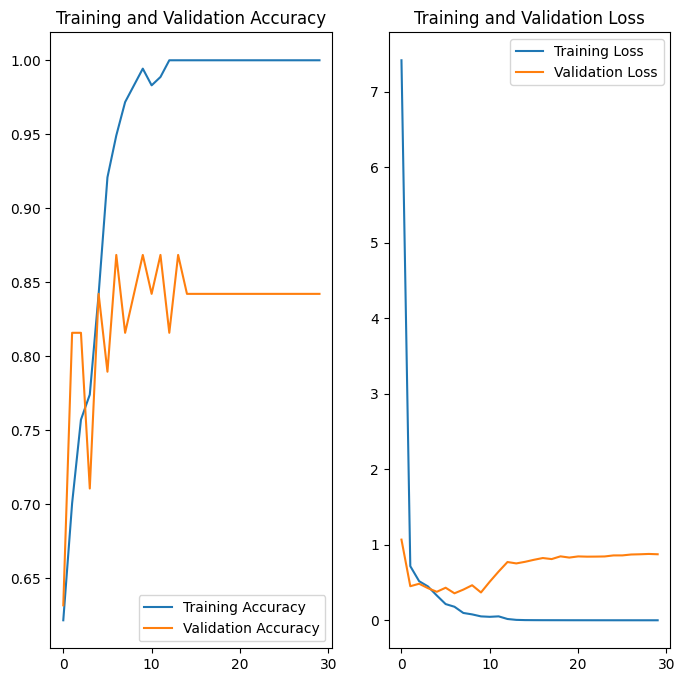

2024-04-16 22:52:06.695436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 4s 2s/step
Overall Accuracy: 0.868421052631579
Precision: 0.84
Recall: 0.9545454545454546
F1-Score: 0.8936170212765958


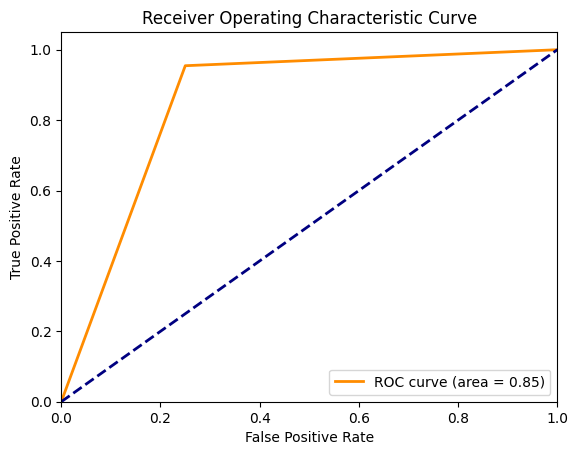

Epoch 1/30


2024-04-16 22:52:11.326685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 4.8287 - accuracy: 0.6328

2024-04-16 22:52:42.268579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 39s 774ms/step - loss: 4.8287 - accuracy: 0.6328 - val_loss: 0.6965 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 8s 221ms/step - loss: 0.7124 - accuracy: 0.6893 - val_loss: 0.5719 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 2s 52ms/step - loss: 0.5566 - accuracy: 0.7684 - val_loss: 0.5712 - val_accuracy: 0.7105
Epoch 4/30
36/36 [==============================] - 3s 81ms/step - loss: 0.4340 - accuracy: 0.7740 - val_loss: 0.4484 - val_accuracy: 0.8158
Epoch 5/30
36/36 [==============================] - 2s 52ms/step - loss: 0.3323 - accuracy: 0.8644 - val_loss: 0.4783 - val_accuracy: 0.7368
Epoch 6/30
36/36 [==============================] - 1s 27ms/step - loss: 0.2382 - accuracy: 0.9096 - val_loss: 0.4197 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 3s 91ms/step - loss: 0.1629 - accuracy: 0.9605 - val_loss: 0.4273 - val_accuracy: 0.7632
Epoch 8/30
36/36 [===

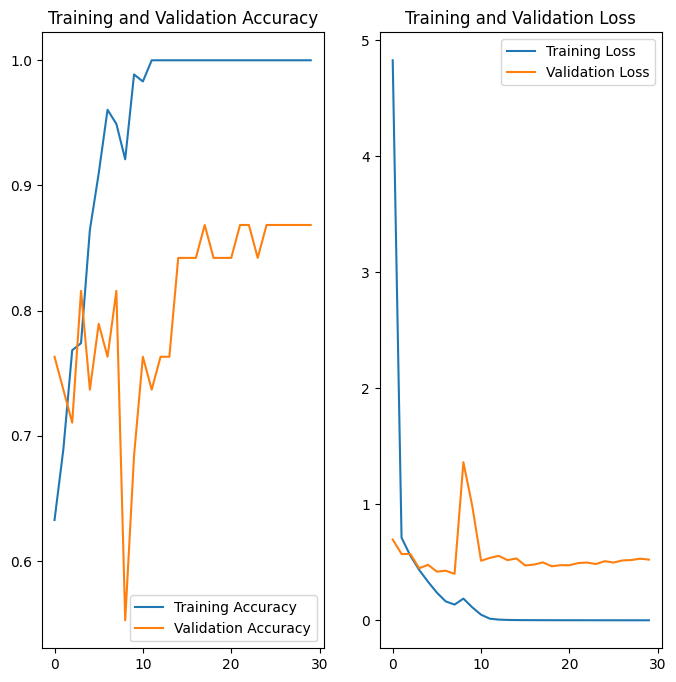

2024-04-16 22:53:36.735387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 2s/step
Overall Accuracy: 0.7631578947368421
Precision: 0.782608695652174
Recall: 0.8181818181818182
F1-Score: 0.8


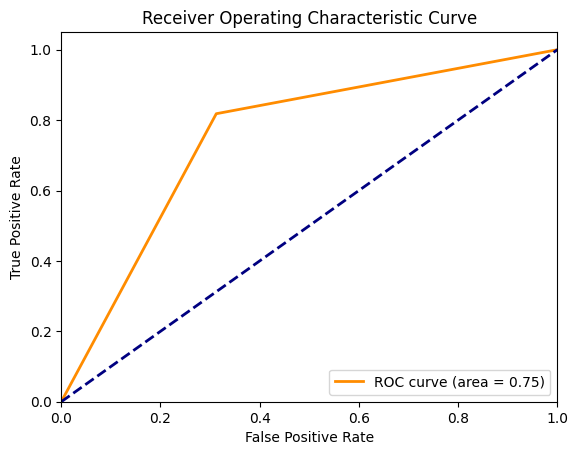

In [112]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='valid', depth_multiplier=1)(x)
    
    y = layers.Conv2D(8, (5,5), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 8, 16)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 16, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 32, 64)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 64, 128)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block_adj(y, 128, 256)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(100, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_5 = tf.keras.Model(x,y)
    model_5._name = 'Model_5'
    
    if i == 0:
        model_5.summary()

    # COMPILING
    model_5.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # TRAINING
    epochs = 30
    history = model_5.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val))

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_5.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_5
    del history


Model: "Model_2_CD"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_180 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_179 (Dept  (None, 398, 398, 1)          10        ['input_180[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1492 (Conv2D)        (None, 398, 398, 8)          80        ['depthwise_conv2d_179[0][0]']
                                                                                                  
 max_pooling2d_774 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1492[0][0]']

2024-04-16 22:53:41.800202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 33.9945 - accuracy: 0.5706

2024-04-16 22:53:56.720544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 19s 384ms/step - loss: 33.9945 - accuracy: 0.5706 - val_loss: 12.9000 - val_accuracy: 0.5526 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 2s 61ms/step - loss: 15.9340 - accuracy: 0.6497 - val_loss: 15.8812 - val_accuracy: 0.7368 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 2s 44ms/step - loss: 9.2477 - accuracy: 0.7514 - val_loss: 10.6889 - val_accuracy: 0.6579 - lr: 9.8907e-04
Epoch 4/30
36/36 [==============================] - 2s 62ms/step - loss: 8.0335 - accuracy: 0.7458 - val_loss: 14.2506 - val_accuracy: 0.7632 - lr: 9.7553e-04
Epoch 5/30
36/36 [==============================] - 1s 21ms/step - loss: 8.5056 - accuracy: 0.7853 - val_loss: 21.2988 - val_accuracy: 0.7632 - lr: 9.5677e-04
Epoch 6/30
36/36 [==============================] - 1s 20ms/step - loss: 8.2096 - accuracy: 0.8079 - val_loss: 26.3173 - val_accuracy: 0.7895 - lr: 9.3301e-04
Epoch 7/30
36/36 [==============================] - 2s 47

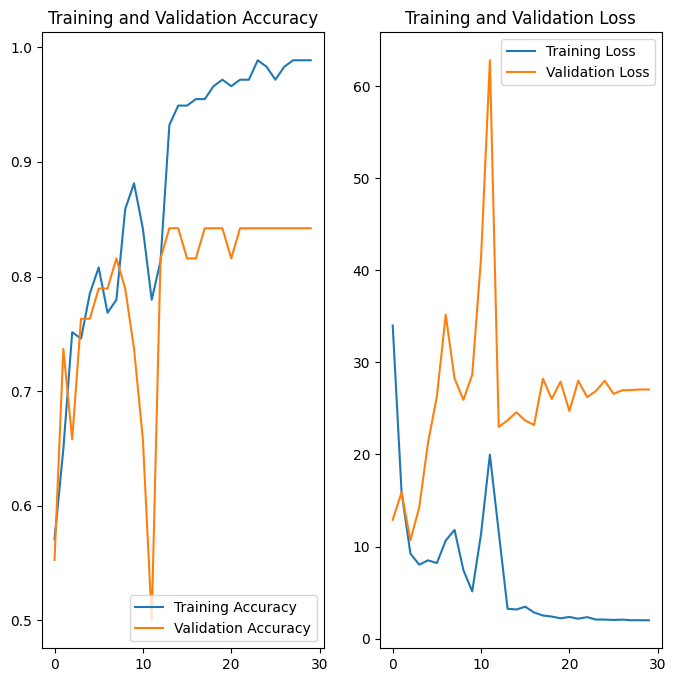

2024-04-16 22:54:33.856862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 588ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.8695652173913043
Recall: 0.9090909090909091
F1-Score: 0.888888888888889


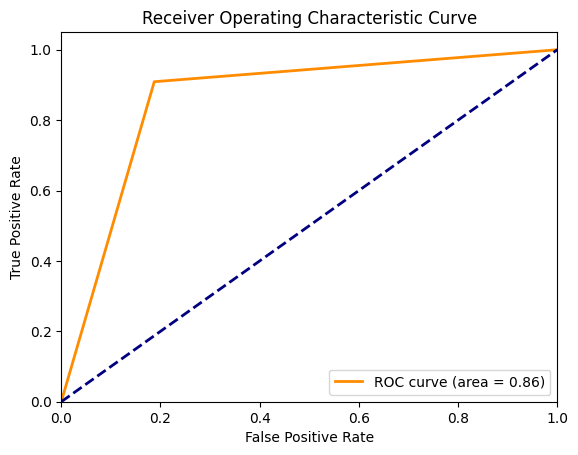

Epoch 1/30


2024-04-16 22:54:38.031524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 29.8636 - accuracy: 0.7401

2024-04-16 22:54:54.894569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 22s 429ms/step - loss: 29.8636 - accuracy: 0.7401 - val_loss: 4.0739 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 3s 85ms/step - loss: 15.2082 - accuracy: 0.6949 - val_loss: 2.5041 - val_accuracy: 0.8684 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 2s 56ms/step - loss: 5.3518 - accuracy: 0.8475 - val_loss: 2.2963 - val_accuracy: 0.8158 - lr: 9.8907e-04
Epoch 4/30
36/36 [==============================] - 3s 84ms/step - loss: 1.7109 - accuracy: 0.8701 - val_loss: 2.0720 - val_accuracy: 0.8684 - lr: 9.7553e-04
Epoch 5/30
36/36 [==============================] - 1s 38ms/step - loss: 0.7176 - accuracy: 0.9435 - val_loss: 4.5723 - val_accuracy: 0.6842 - lr: 9.5677e-04
Epoch 6/30
36/36 [==============================] - 2s 45ms/step - loss: 0.5091 - accuracy: 0.9322 - val_loss: 2.2330 - val_accuracy: 0.8158 - lr: 9.3301e-04
Epoch 7/30
36/36 [==============================] - 1s 20ms/ste

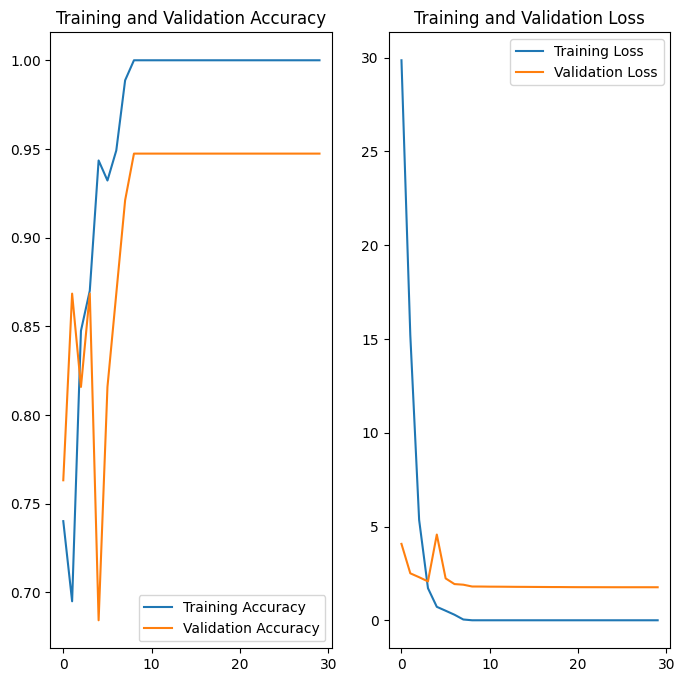

2024-04-16 22:55:32.838474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 59ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.7777777777777778
Recall: 0.9545454545454546
F1-Score: 0.8571428571428572


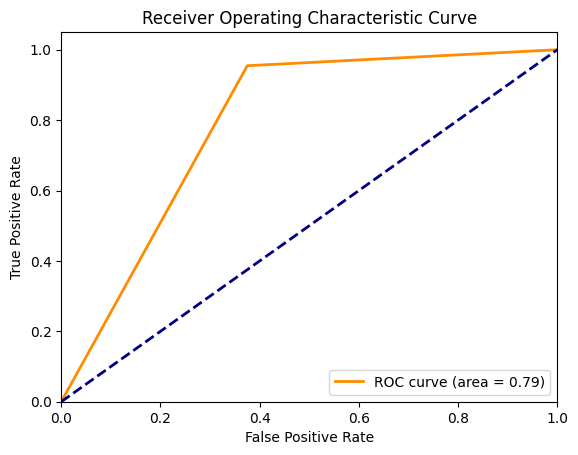

Epoch 1/30


2024-04-16 22:55:34.355437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 21.6794 - accuracy: 0.5424

2024-04-16 22:55:44.405413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 14s 325ms/step - loss: 21.6794 - accuracy: 0.5424 - val_loss: 2.0814 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 2s 63ms/step - loss: 0.7325 - accuracy: 0.6667 - val_loss: 1.2978 - val_accuracy: 0.6053 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 1s 38ms/step - loss: 0.5866 - accuracy: 0.7119 - val_loss: 0.9963 - val_accuracy: 0.7368 - lr: 9.8907e-04
Epoch 4/30
36/36 [==============================] - 1s 19ms/step - loss: 0.5793 - accuracy: 0.7684 - val_loss: 1.0461 - val_accuracy: 0.7105 - lr: 9.7553e-04
Epoch 5/30
36/36 [==============================] - 3s 90ms/step - loss: 0.5218 - accuracy: 0.7514 - val_loss: 1.3418 - val_accuracy: 0.7105 - lr: 9.5677e-04
Epoch 6/30
36/36 [==============================] - 1s 30ms/step - loss: 0.5765 - accuracy: 0.7684 - val_loss: 1.2258 - val_accuracy: 0.6842 - lr: 9.3301e-04
Epoch 7/30
36/36 [==============================] - 1s 20ms/step

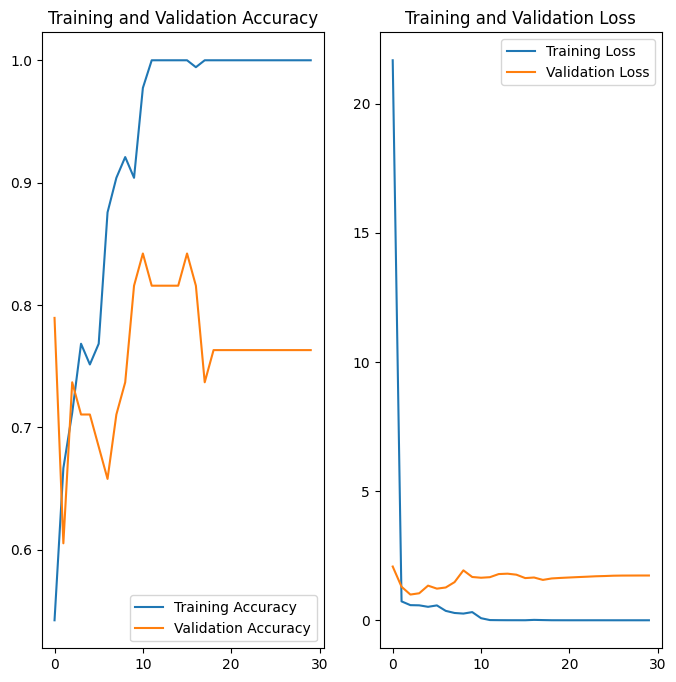

2024-04-16 22:56:20.009870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 731ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8076923076923077
Recall: 0.9545454545454546
F1-Score: 0.875


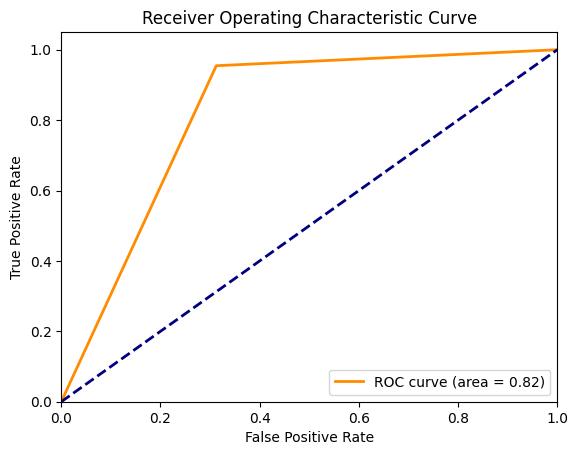

Epoch 1/30


2024-04-16 22:56:22.003146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 61.4798 - accuracy: 0.5819

2024-04-16 22:56:35.852931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 18s 363ms/step - loss: 61.4798 - accuracy: 0.5819 - val_loss: 5.9723 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 2s 67ms/step - loss: 6.3633 - accuracy: 0.7797 - val_loss: 6.4770 - val_accuracy: 0.7632 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 2s 52ms/step - loss: 8.1269 - accuracy: 0.7684 - val_loss: 14.3588 - val_accuracy: 0.6842 - lr: 9.8907e-04
Epoch 4/30
36/36 [==============================] - 2s 44ms/step - loss: 10.1306 - accuracy: 0.7740 - val_loss: 22.2102 - val_accuracy: 0.8421 - lr: 9.7553e-04
Epoch 5/30
36/36 [==============================] - 3s 72ms/step - loss: 10.0192 - accuracy: 0.7684 - val_loss: 40.8868 - val_accuracy: 0.6053 - lr: 9.5677e-04
Epoch 6/30
36/36 [==============================] - 2s 66ms/step - loss: 10.7354 - accuracy: 0.8079 - val_loss: 11.7340 - val_accuracy: 0.7105 - lr: 9.3301e-04
Epoch 7/30
36/36 [==============================] - 1s 19

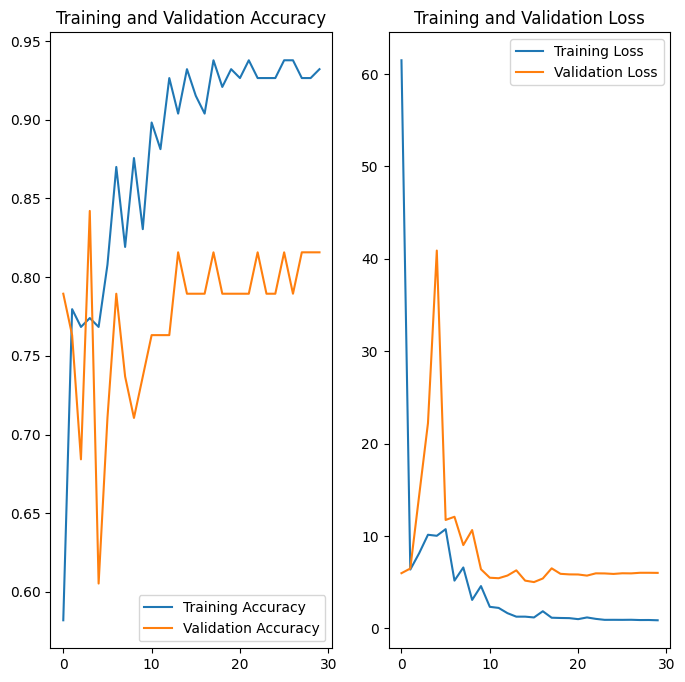

1/2 [==============>...............] - ETA: 0s

2024-04-16 22:57:09.792527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 777ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8571428571428571
Recall: 0.8181818181818182
F1-Score: 0.8372093023255814


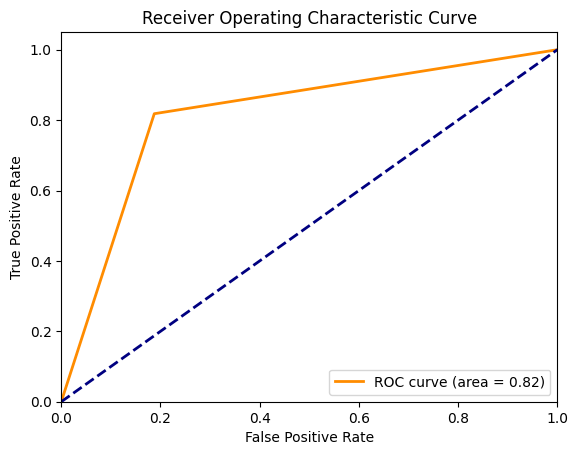

Epoch 1/30


2024-04-16 22:57:11.083825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 25.9685 - accuracy: 0.6328

2024-04-16 22:57:23.966517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 17s 335ms/step - loss: 25.9685 - accuracy: 0.6328 - val_loss: 4.6430 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 2s 50ms/step - loss: 1.2457 - accuracy: 0.7232 - val_loss: 3.3751 - val_accuracy: 0.6579 - lr: 9.9726e-04
Epoch 3/30
36/36 [==============================] - 1s 41ms/step - loss: 0.5708 - accuracy: 0.7910 - val_loss: 3.2685 - val_accuracy: 0.6316 - lr: 9.8907e-04
Epoch 4/30
36/36 [==============================] - 3s 75ms/step - loss: 0.3390 - accuracy: 0.8927 - val_loss: 2.7909 - val_accuracy: 0.6842 - lr: 9.7553e-04
Epoch 5/30
36/36 [==============================] - 2s 69ms/step - loss: 0.0805 - accuracy: 0.9774 - val_loss: 2.6328 - val_accuracy: 0.8158 - lr: 9.5677e-04
Epoch 6/30
36/36 [==============================] - 1s 22ms/step - loss: 0.0359 - accuracy: 0.9831 - val_loss: 2.7688 - val_accuracy: 0.8158 - lr: 9.3301e-04
Epoch 7/30
36/36 [==============================] - 1s 30ms/step

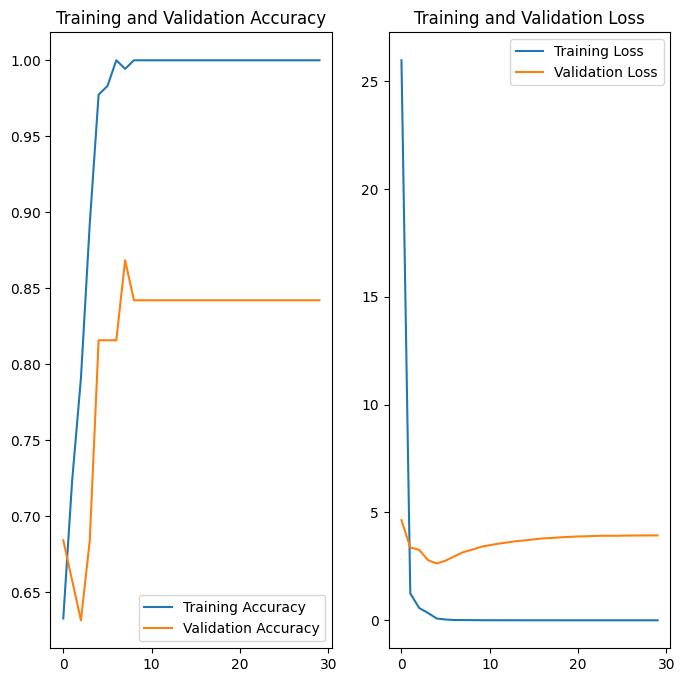

1/2 [==============>...............] - ETA: 0s

2024-04-16 22:58:01.409129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 970ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.7777777777777778
Recall: 0.9545454545454546
F1-Score: 0.8571428571428572


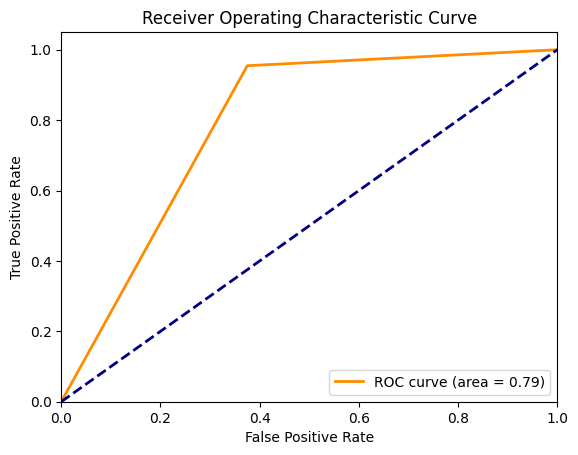

In [113]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2_CD = tf.keras.Model(x,y)
    model_2_CD._name = 'Model_2_CD'
    
    if i == 0:
        model_2_CD.summary()

    # COMPILING
    model_2_CD.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = LearningRateScheduler(tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate = 0.001,
        decay_steps = 30,
        alpha=0.0,
        name='CosineDecay',
        warmup_target=None,
        warmup_steps=5
        ))
    
    # TRAINING
    epochs = 30
    history = model_2_CD.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2_CD.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2_CD
    del history


Model: "Model_2_RLR"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_185 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_184 (Dept  (None, 398, 398, 1)          10        ['input_185[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1517 (Conv2D)        (None, 398, 398, 8)          80        ['depthwise_conv2d_184[0][0]']
                                                                                                  
 max_pooling2d_794 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1517[0][0]'

2024-04-16 22:58:02.936838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 34.7532 - accuracy: 0.5989

2024-04-16 22:58:16.238905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 18s 391ms/step - loss: 34.7532 - accuracy: 0.5989 - val_loss: 9.3140 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 4s 101ms/step - loss: 11.0621 - accuracy: 0.7175 - val_loss: 4.6994 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 2s 67ms/step - loss: 4.3389 - accuracy: 0.8192 - val_loss: 6.6257 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 34ms/step - loss: 6.3998 - accuracy: 0.7401 - val_loss: 4.1849 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 29ms/step - loss: 3.4328 - accuracy: 0.8305 - val_loss: 13.6236 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 2s 44ms/step - loss: 2.9296 - accuracy: 0.8192 - val_loss: 5.3710 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 32ms/step - loss: 2.4894 -

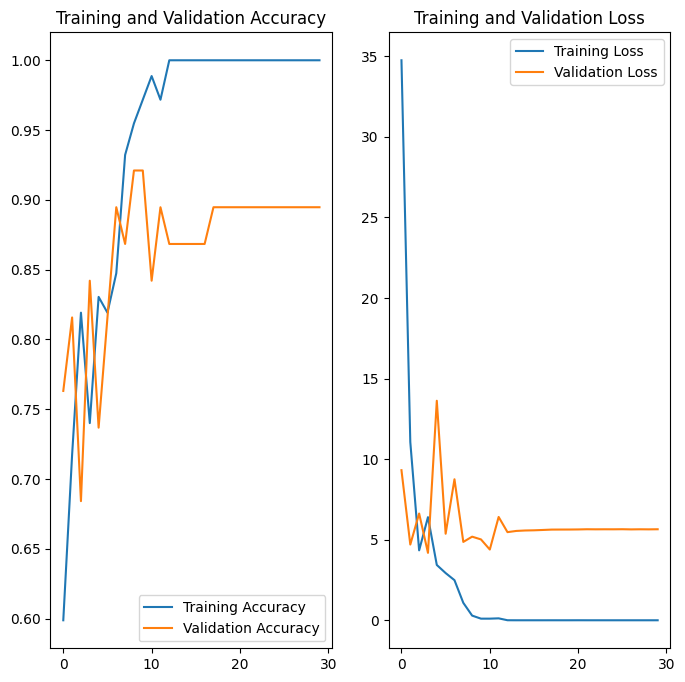

1/2 [==============>...............] - ETA: 0s

2024-04-16 22:58:49.718505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 986ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.7916666666666666
Recall: 0.8636363636363636
F1-Score: 0.8260869565217391


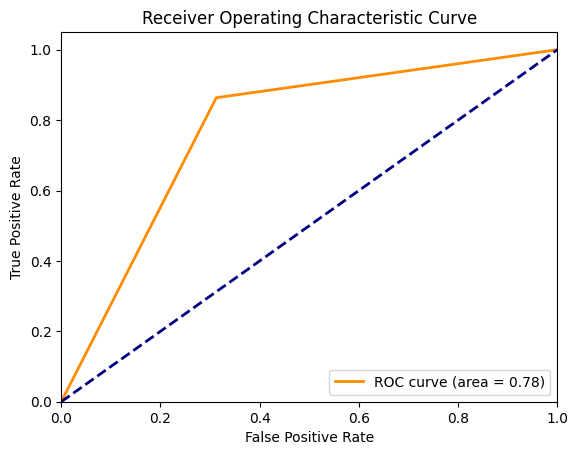

Epoch 1/30


2024-04-16 22:58:51.284202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 35.0937 - accuracy: 0.6780

2024-04-16 22:59:03.173520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 14s 217ms/step - loss: 35.0937 - accuracy: 0.6780 - val_loss: 14.3546 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 2s 64ms/step - loss: 10.3760 - accuracy: 0.7062 - val_loss: 27.7519 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 5s 148ms/step - loss: 33.4495 - accuracy: 0.6723 - val_loss: 11.6428 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 30ms/step - loss: 13.0660 - accuracy: 0.7571 - val_loss: 18.2142 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 2s 45ms/step - loss: 10.7642 - accuracy: 0.7175 - val_loss: 9.9403 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 2s 46ms/step - loss: 6.7051 - accuracy: 0.7797 - val_loss: 14.2395 - val_accuracy: 0.5526 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 35ms/step - loss: 1

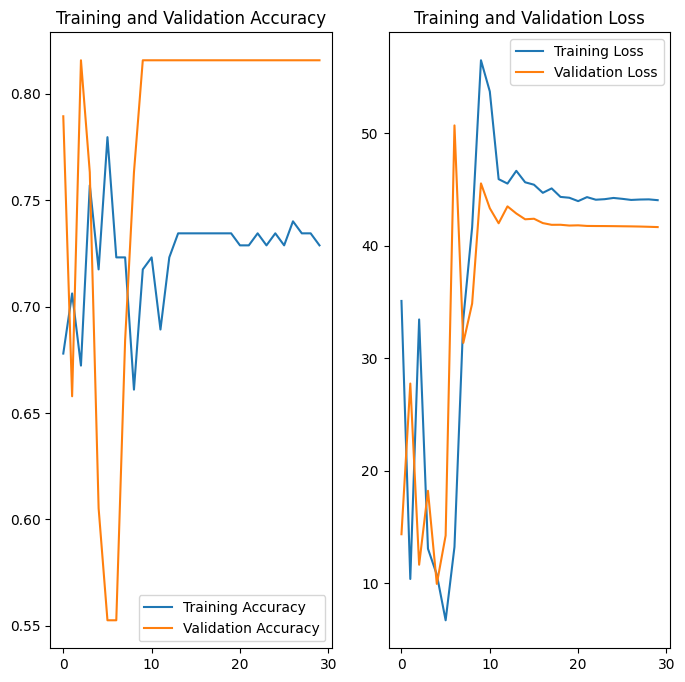

2024-04-16 22:59:36.384877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 656ms/step
Overall Accuracy: 0.6578947368421053
Precision: 0.7647058823529411
Recall: 0.5909090909090909
F1-Score: 0.6666666666666667


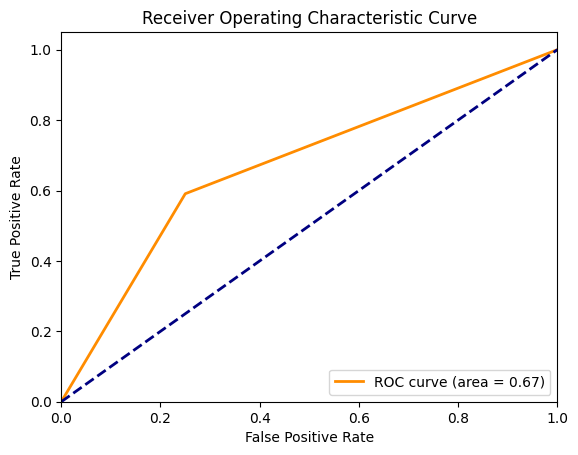

Epoch 1/30


2024-04-16 22:59:38.613059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 31.8457 - accuracy: 0.6158

2024-04-16 22:59:50.209719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 15s 264ms/step - loss: 31.8457 - accuracy: 0.6158 - val_loss: 6.4437 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 3s 79ms/step - loss: 3.6366 - accuracy: 0.7119 - val_loss: 6.6434 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 25ms/step - loss: 2.7129 - accuracy: 0.7627 - val_loss: 6.8687 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 2s 48ms/step - loss: 1.7042 - accuracy: 0.7853 - val_loss: 5.8899 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 2s 60ms/step - loss: 0.6617 - accuracy: 0.8531 - val_loss: 6.0937 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 41ms/step - loss: 0.0243 - accuracy: 0.9944 - val_loss: 6.2266 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 20ms/step - loss: 0.0082 - ac

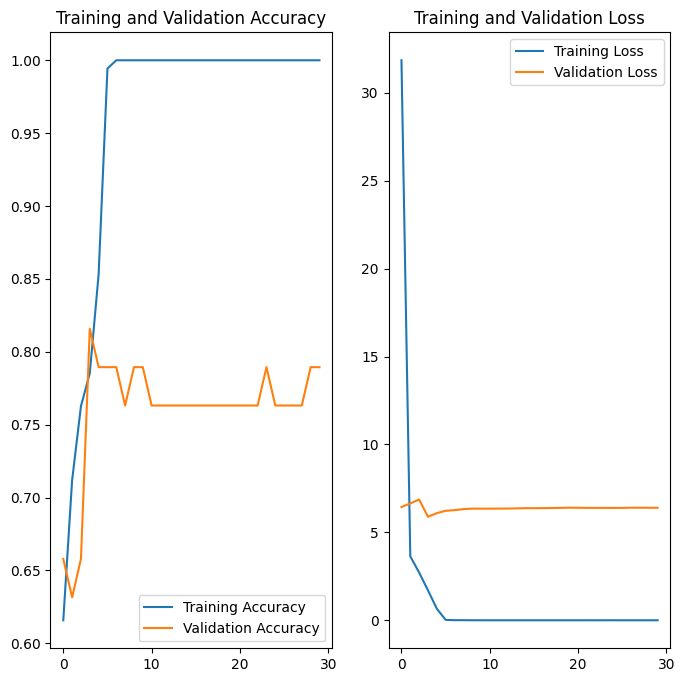

2024-04-16 23:00:22.139242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 60ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.8695652173913043
Recall: 0.9090909090909091
F1-Score: 0.888888888888889


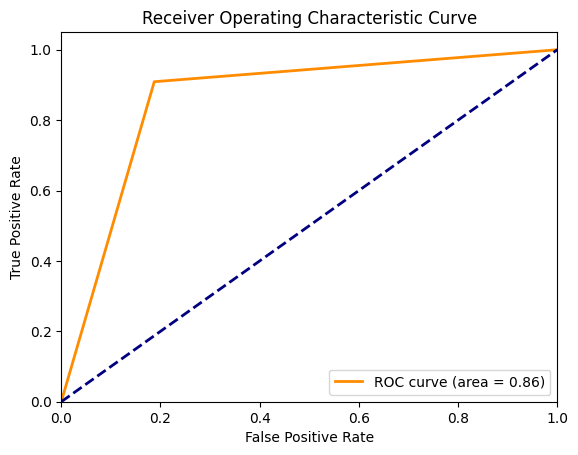

Epoch 1/30


2024-04-16 23:00:23.736965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 71.3446 - accuracy: 0.5650

2024-04-16 23:00:37.234350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 18s 348ms/step - loss: 71.3446 - accuracy: 0.5650 - val_loss: 16.7789 - val_accuracy: 0.4474 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 2s 64ms/step - loss: 0.9663 - accuracy: 0.7797 - val_loss: 0.9204 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 23ms/step - loss: 0.6967 - accuracy: 0.7684 - val_loss: 0.9787 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 2s 46ms/step - loss: 0.4067 - accuracy: 0.8305 - val_loss: 0.8939 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 19ms/step - loss: 0.2808 - accuracy: 0.9096 - val_loss: 1.0101 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 3s 72ms/step - loss: 0.2136 - accuracy: 0.9153 - val_loss: 1.3030 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - loss: 0.0873 - a

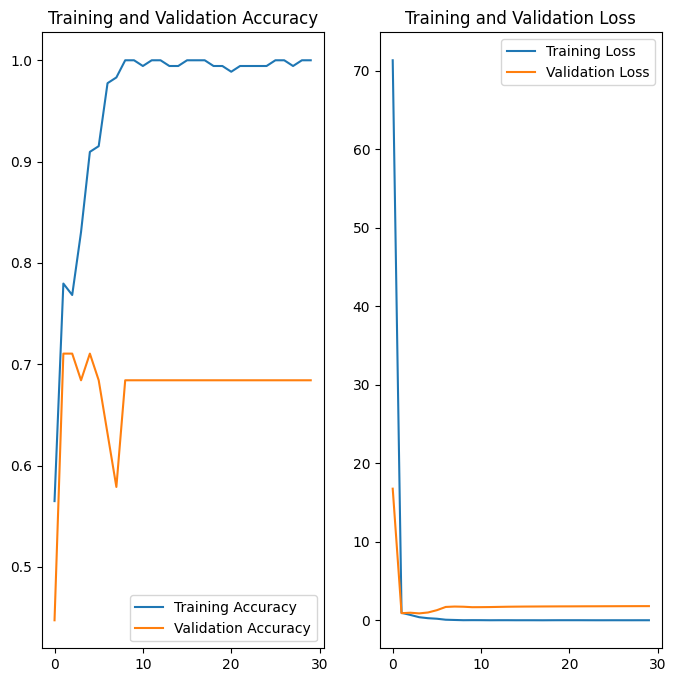

2024-04-16 23:01:14.062072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 901ms/step
Overall Accuracy: 0.7105263157894737
Precision: 0.7894736842105263
Recall: 0.6818181818181818
F1-Score: 0.7317073170731707


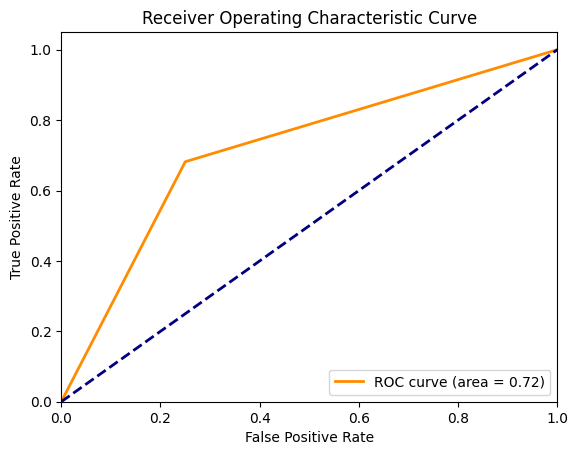

Epoch 1/30


2024-04-16 23:01:16.362904: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 74.6263 - accuracy: 0.6441

2024-04-16 23:01:28.817569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 15s 354ms/step - loss: 74.6263 - accuracy: 0.6441 - val_loss: 16.4107 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 1s 33ms/step - loss: 7.4209 - accuracy: 0.7232 - val_loss: 4.6866 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 3s 79ms/step - loss: 1.5053 - accuracy: 0.8362 - val_loss: 5.3867 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 2s 49ms/step - loss: 0.8914 - accuracy: 0.8644 - val_loss: 4.9291 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 39ms/step - loss: 1.4869 - accuracy: 0.7458 - val_loss: 4.2265 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 34ms/step - loss: 0.8435 - accuracy: 0.8362 - val_loss: 4.6336 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 3s 94ms/step - loss: 0.3982 - a

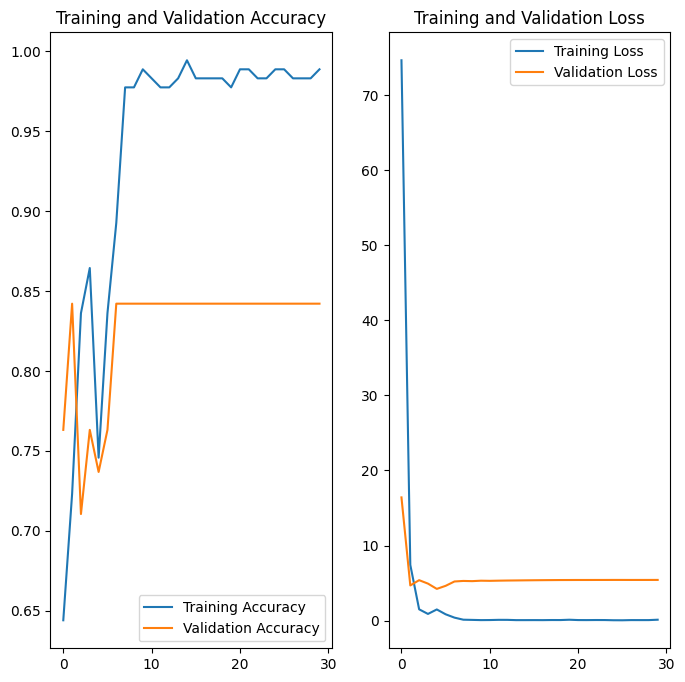

2024-04-16 23:02:03.115446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 854ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.8148148148148148
Recall: 1.0
F1-Score: 0.8979591836734693


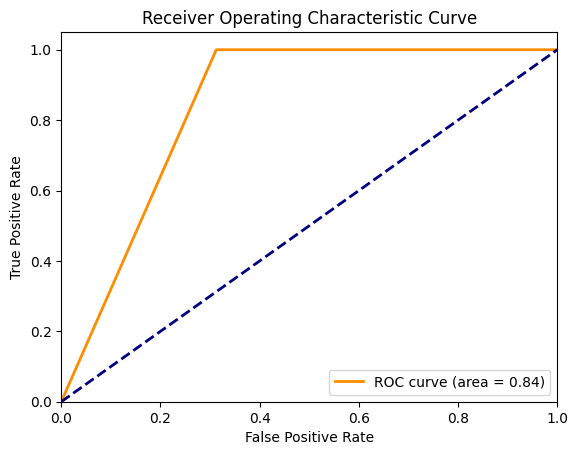

In [114]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2_RLR = tf.keras.Model(x,y)
    model_2_RLR._name = 'Model_2_RLR'
    
    if i == 0:
        model_2_RLR.summary()

    # COMPILING
    model_2_RLR.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.1,
        patience=5,
        verbose=0,
        mode='auto',
        min_delta=0.0001,
        cooldown=0,
        min_lr=0.0,
        
    )
    
    # TRAINING
    epochs = 30
    history = model_2_RLR.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2_RLR.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2_RLR
    del history


Model: "Model_2_RLR_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_190 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_189 (Dept  (None, 398, 398, 1)          10        ['input_190[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1542 (Conv2D)        (None, 398, 398, 8)          80        ['depthwise_conv2d_189[0][0]']
                                                                                                  
 max_pooling2d_814 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1542[0][

2024-04-16 23:02:05.613602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 47.8336 - accuracy: 0.5876

2024-04-16 23:02:20.201508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 18s 328ms/step - loss: 47.8336 - accuracy: 0.5876 - val_loss: 14.5997 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 2s 68ms/step - loss: 3.7697 - accuracy: 0.7853 - val_loss: 14.2861 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 2s 55ms/step - loss: 1.3687 - accuracy: 0.8249 - val_loss: 7.6968 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 34ms/step - loss: 0.5190 - accuracy: 0.8927 - val_loss: 6.5538 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 2s 44ms/step - loss: 0.4764 - accuracy: 0.8870 - val_loss: 6.0930 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 22ms/step - loss: 0.5934 - accuracy: 0.8757 - val_loss: 7.7125 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 26ms/step - loss: 0.1243 - 

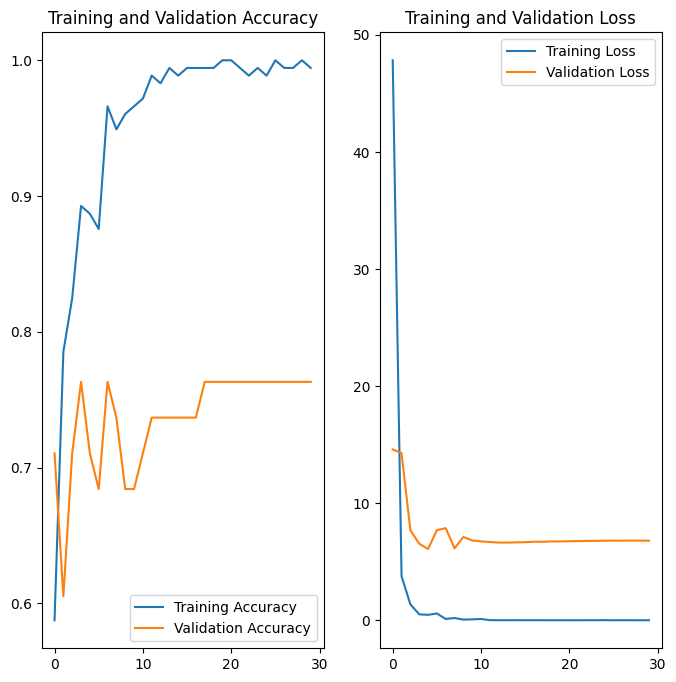

2024-04-16 23:02:56.186194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 773ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8076923076923077
Recall: 0.9545454545454546
F1-Score: 0.875


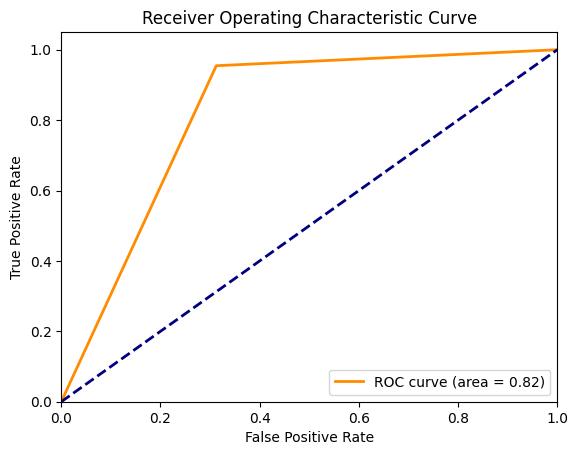

Epoch 1/30


2024-04-16 23:02:58.237823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 173.2473 - accuracy: 0.5989

2024-04-16 23:03:10.298332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 17s 319ms/step - loss: 173.2473 - accuracy: 0.5989 - val_loss: 11.4664 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 3s 80ms/step - loss: 23.0672 - accuracy: 0.6610 - val_loss: 7.9653 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 2s 44ms/step - loss: 1.6922 - accuracy: 0.8305 - val_loss: 4.9371 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 19ms/step - loss: 0.3900 - accuracy: 0.9153 - val_loss: 4.8318 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 20ms/step - loss: 0.1539 - accuracy: 0.9379 - val_loss: 4.8341 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 6s 164ms/step - loss: 0.0860 - accuracy: 0.9661 - val_loss: 4.5754 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - ETA: 0s - loss: 0.0448 - acc

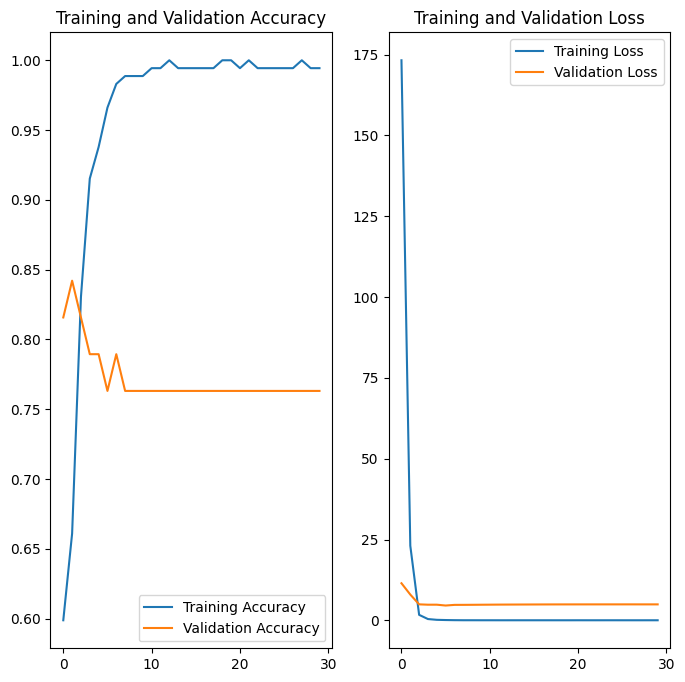

2024-04-16 23:03:49.812094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 656ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.8333333333333334
Recall: 0.6818181818181818
F1-Score: 0.7499999999999999


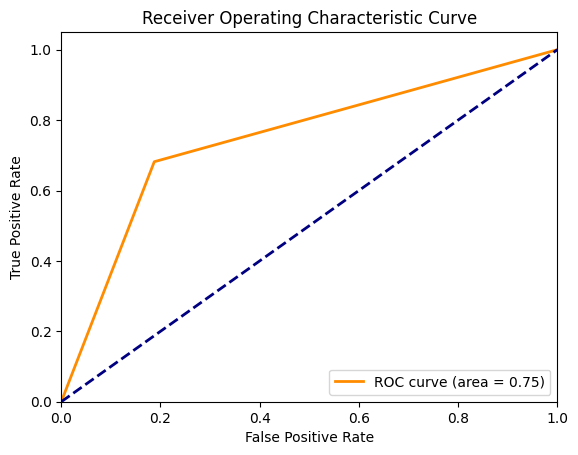

Epoch 1/30


2024-04-16 23:03:52.122708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 59.0265 - accuracy: 0.6271

2024-04-16 23:04:07.803477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 20s 397ms/step - loss: 59.0265 - accuracy: 0.6271 - val_loss: 4.1658 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 3s 72ms/step - loss: 2.5548 - accuracy: 0.6893 - val_loss: 1.8334 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 2s 54ms/step - loss: 0.7202 - accuracy: 0.7740 - val_loss: 1.7680 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 2s 51ms/step - loss: 0.2981 - accuracy: 0.8418 - val_loss: 1.9374 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 2s 44ms/step - loss: 0.2930 - accuracy: 0.8701 - val_loss: 1.9125 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 31ms/step - loss: 0.1565 - accuracy: 0.9322 - val_loss: 1.7966 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 33ms/step - loss: 0.0930 - ac

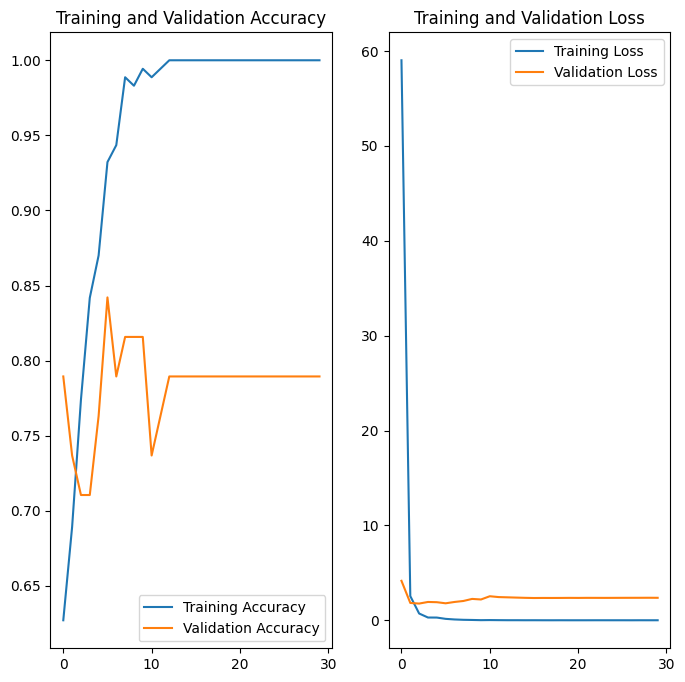

2024-04-16 23:04:39.861106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 708ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8260869565217391
Recall: 0.8636363636363636
F1-Score: 0.8444444444444444


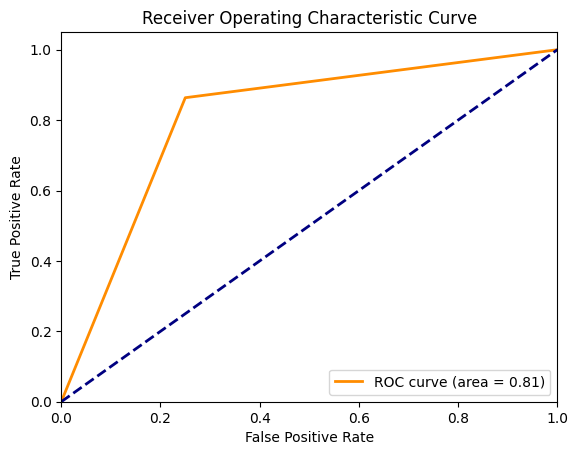

Epoch 1/30


2024-04-16 23:04:41.950759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 48.2317 - accuracy: 0.6667

2024-04-16 23:04:57.266259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 20s 387ms/step - loss: 48.2317 - accuracy: 0.6667 - val_loss: 9.8484 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 4s 104ms/step - loss: 9.8533 - accuracy: 0.7119 - val_loss: 8.0996 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 1s 23ms/step - loss: 2.4460 - accuracy: 0.8362 - val_loss: 6.4007 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 2s 48ms/step - loss: 1.7080 - accuracy: 0.8305 - val_loss: 5.8685 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 3s 84ms/step - loss: 0.2811 - accuracy: 0.9379 - val_loss: 3.1464 - val_accuracy: 0.8684 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 2s 47ms/step - loss: 0.7735 - accuracy: 0.9379 - val_loss: 1.6593 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 33ms/step - loss: 0.1646 - a

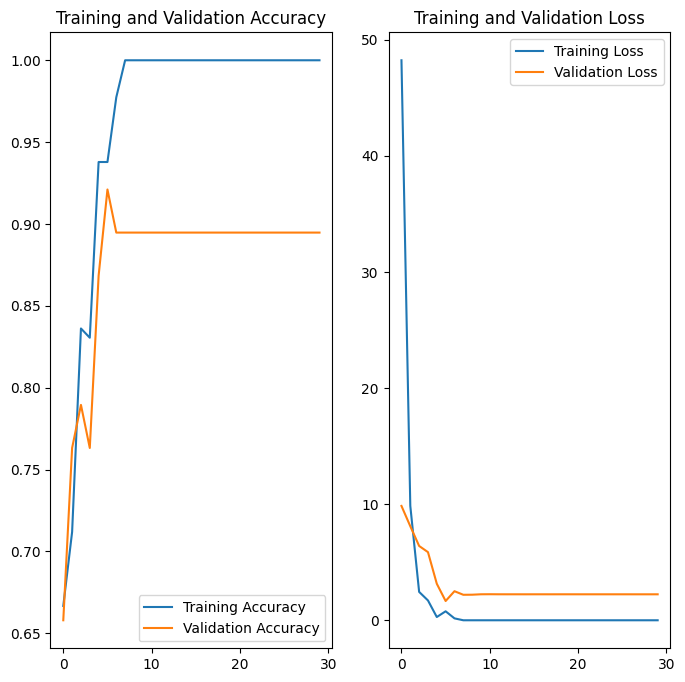

2024-04-16 23:05:33.070680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 104ms/step
Overall Accuracy: 0.8947368421052632
Precision: 0.8461538461538461
Recall: 1.0
F1-Score: 0.9166666666666666


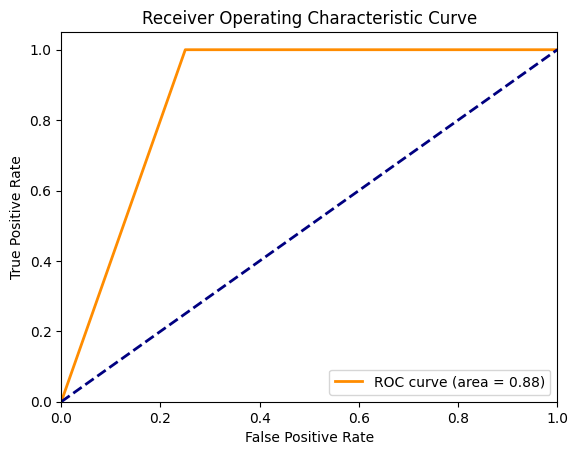

Epoch 1/30


2024-04-16 23:05:34.535710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 95.8841 - accuracy: 0.6158

2024-04-16 23:05:47.992777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 18s 355ms/step - loss: 95.8841 - accuracy: 0.6158 - val_loss: 12.8801 - val_accuracy: 0.6053 - lr: 0.0010
Epoch 2/30
36/36 [==============================] - 4s 105ms/step - loss: 10.1610 - accuracy: 0.6723 - val_loss: 5.0632 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 3/30
36/36 [==============================] - 4s 98ms/step - loss: 2.5987 - accuracy: 0.7797 - val_loss: 6.4023 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 4/30
36/36 [==============================] - 1s 31ms/step - loss: 1.0027 - accuracy: 0.8757 - val_loss: 4.8719 - val_accuracy: 0.8421 - lr: 0.0010
Epoch 5/30
36/36 [==============================] - 1s 20ms/step - loss: 0.4338 - accuracy: 0.9153 - val_loss: 5.1484 - val_accuracy: 0.8158 - lr: 0.0010
Epoch 6/30
36/36 [==============================] - 1s 19ms/step - loss: 0.2667 - accuracy: 0.9548 - val_loss: 5.3380 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 7/30
36/36 [==============================] - 1s 32ms/step - loss: 0.1019 -

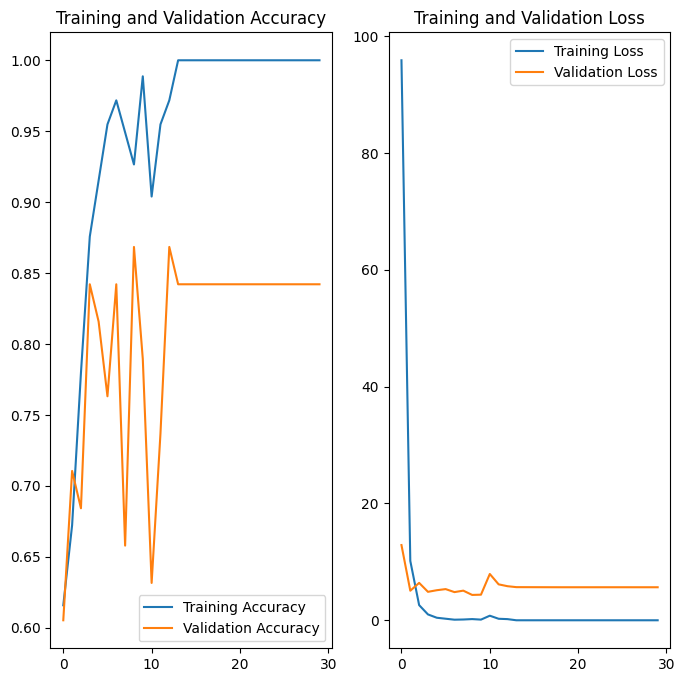

2024-04-16 23:06:25.030004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 1s/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1-Score: 0.8695652173913043


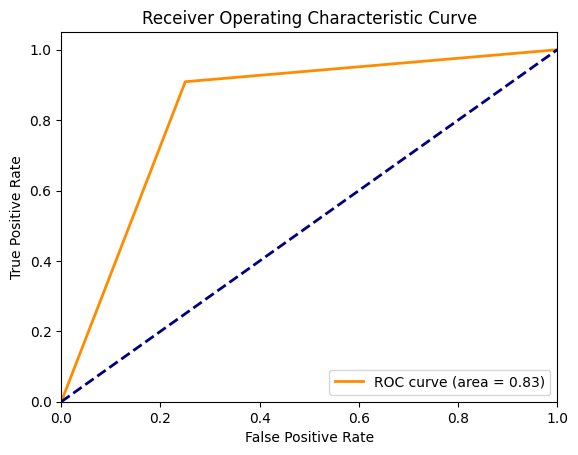

In [115]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2_RLR_v2 = tf.keras.Model(x,y)
    model_2_RLR_v2._name = 'Model_2_RLR_v2'
    
    if i == 0:
        model_2_RLR_v2.summary()

    # COMPILING
    model_2_RLR_v2.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.1,
        patience=5,
        verbose=1,
        mode='auto',
        min_delta=0.01,
        cooldown=0,
        min_lr=0.0,
        
    )
    
    # TRAINING
    epochs = 30
    history = model_2_RLR_v2.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2_RLR_v2.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2_RLR_v2
    del history


Model: "Model_2_ES"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_195 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_194 (Dept  (None, 398, 398, 1)          10        ['input_195[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1567 (Conv2D)        (None, 398, 398, 8)          80        ['depthwise_conv2d_194[0][0]']
                                                                                                  
 max_pooling2d_834 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1567[0][0]']

2024-04-16 23:06:27.692658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 10.0999 - accuracy: 0.6441

2024-04-16 23:06:42.757739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 20s 388ms/step - loss: 10.0999 - accuracy: 0.6441 - val_loss: 5.2966 - val_accuracy: 0.6842
Epoch 2/30
36/36 [==============================] - 2s 57ms/step - loss: 1.1583 - accuracy: 0.8079 - val_loss: 7.3120 - val_accuracy: 0.5526
Epoch 3/30
36/36 [==============================] - 1s 38ms/step - loss: 1.4716 - accuracy: 0.8362 - val_loss: 5.9899 - val_accuracy: 0.5526
Epoch 4/30
36/36 [==============================] - 1s 33ms/step - loss: 0.3091 - accuracy: 0.9266 - val_loss: 2.0901 - val_accuracy: 0.7632
Epoch 5/30
36/36 [==============================] - 2s 48ms/step - loss: 0.2590 - accuracy: 0.9605 - val_loss: 3.1569 - val_accuracy: 0.9211
Epoch 6/30
36/36 [==============================] - 1s 36ms/step - loss: 0.7741 - accuracy: 0.9209 - val_loss: 3.8356 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 2s 44ms/step - loss: 1.1658 - accuracy: 0.8588 - val_loss: 3.3947 - val_accuracy: 0.8421
Epoch 8/30
36/36 [===

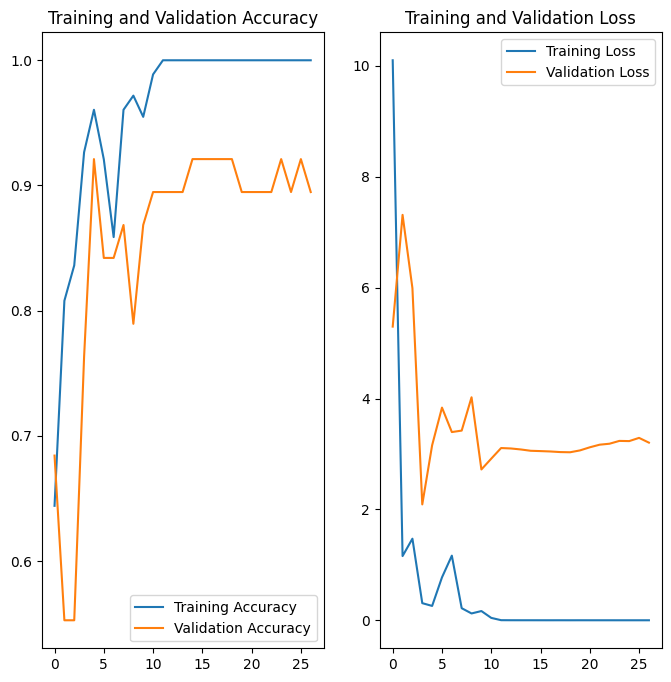

1/2 [==============>...............] - ETA: 0s

2024-04-16 23:07:17.533335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 67ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.8333333333333334
Recall: 0.6818181818181818
F1-Score: 0.7499999999999999


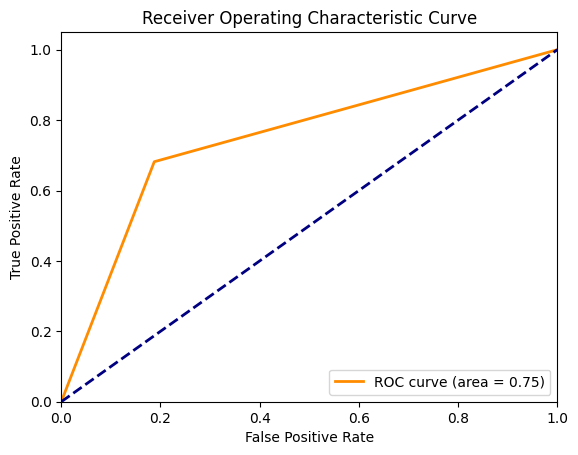

Epoch 1/30


2024-04-16 23:07:18.152910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 229.0104 - accuracy: 0.5876

2024-04-16 23:07:25.326218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 8s 214ms/step - loss: 229.0104 - accuracy: 0.5876 - val_loss: 17.2621 - val_accuracy: 0.5789
Epoch 2/30
36/36 [==============================] - 1s 21ms/step - loss: 4.5445 - accuracy: 0.7458 - val_loss: 7.5303 - val_accuracy: 0.5526
Epoch 3/30
36/36 [==============================] - 1s 31ms/step - loss: 0.5845 - accuracy: 0.8757 - val_loss: 4.3628 - val_accuracy: 0.6842
Epoch 4/30
36/36 [==============================] - 1s 38ms/step - loss: 0.2395 - accuracy: 0.9379 - val_loss: 5.1101 - val_accuracy: 0.7368
Epoch 5/30
36/36 [==============================] - 5s 139ms/step - loss: 0.1307 - accuracy: 0.9774 - val_loss: 4.8365 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 1s 30ms/step - loss: 0.0092 - accuracy: 0.9944 - val_loss: 4.6621 - val_accuracy: 0.7632
Epoch 7/30
36/36 [==============================] - 1s 33ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 4.6214 - val_accuracy: 0.7632
Epoch 8/30
36/36 [=

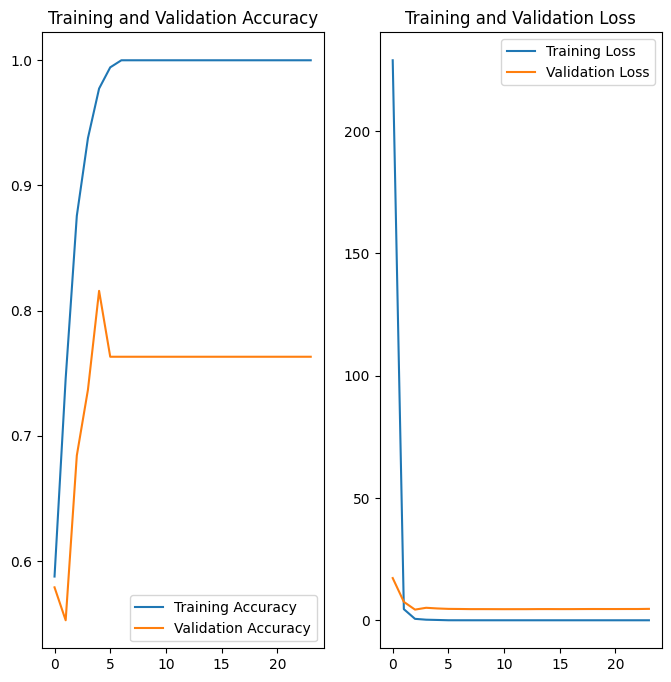

2024-04-16 23:07:50.679110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 716ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.8181818181818182
Recall: 0.8181818181818182
F1-Score: 0.8181818181818182


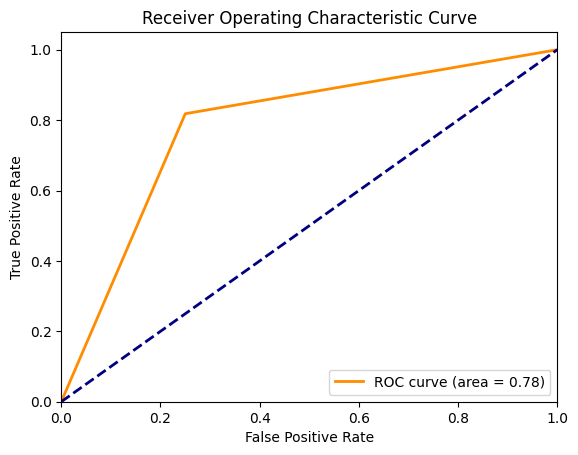

Epoch 1/30


2024-04-16 23:07:52.651553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 168.0898 - accuracy: 0.5819

2024-04-16 23:08:00.630393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 10s 169ms/step - loss: 168.0898 - accuracy: 0.5819 - val_loss: 9.5031 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 5s 134ms/step - loss: 13.7388 - accuracy: 0.7401 - val_loss: 12.8819 - val_accuracy: 0.5000
Epoch 3/30
36/36 [==============================] - 1s 41ms/step - loss: 5.5198 - accuracy: 0.7797 - val_loss: 4.3839 - val_accuracy: 0.8421
Epoch 4/30
36/36 [==============================] - 2s 66ms/step - loss: 1.4178 - accuracy: 0.8757 - val_loss: 6.2592 - val_accuracy: 0.7105
Epoch 5/30
36/36 [==============================] - 1s 29ms/step - loss: 3.8106 - accuracy: 0.8305 - val_loss: 7.4761 - val_accuracy: 0.7368
Epoch 6/30
36/36 [==============================] - 1s 21ms/step - loss: 2.4682 - accuracy: 0.9096 - val_loss: 8.3457 - val_accuracy: 0.8684
Epoch 7/30
36/36 [==============================] - 1s 32ms/step - loss: 1.8898 - accuracy: 0.9040 - val_loss: 18.8618 - val_accuracy: 0.7105
Epoch 8/30
36/36

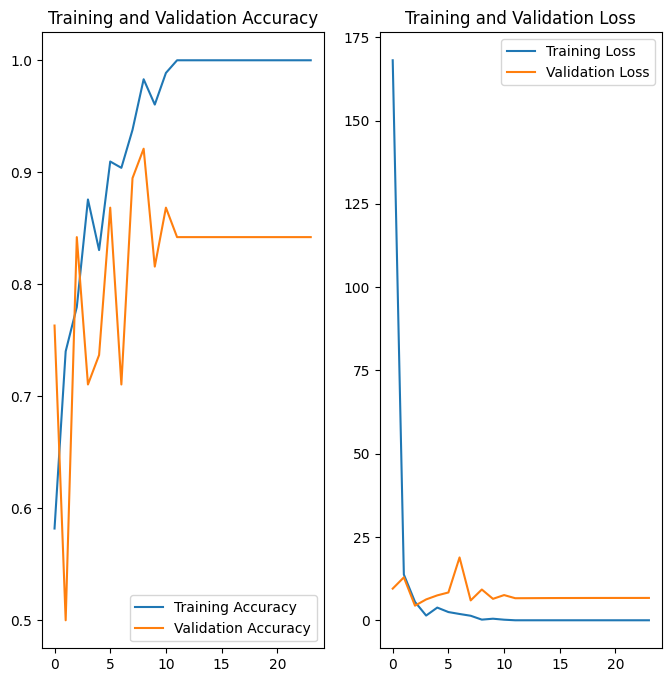

2024-04-16 23:08:26.627002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 97ms/step
Overall Accuracy: 0.7368421052631579
Precision: 0.8
Recall: 0.7272727272727273
F1-Score: 0.761904761904762


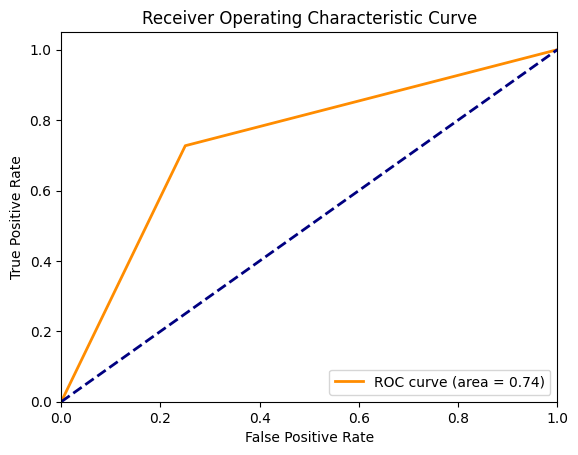

Epoch 1/30


2024-04-16 23:08:28.142254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 189.3648 - accuracy: 0.6328

2024-04-16 23:08:38.583687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 13s 206ms/step - loss: 189.3648 - accuracy: 0.6328 - val_loss: 19.7062 - val_accuracy: 0.6053
Epoch 2/30
36/36 [==============================] - 2s 64ms/step - loss: 57.0212 - accuracy: 0.6441 - val_loss: 29.9092 - val_accuracy: 0.6316
Epoch 3/30
36/36 [==============================] - 1s 30ms/step - loss: 40.8434 - accuracy: 0.6723 - val_loss: 29.4135 - val_accuracy: 0.5000
Epoch 4/30
36/36 [==============================] - 1s 29ms/step - loss: 11.4179 - accuracy: 0.7458 - val_loss: 43.1552 - val_accuracy: 0.5000
Epoch 5/30
36/36 [==============================] - 1s 35ms/step - loss: 14.1832 - accuracy: 0.7514 - val_loss: 19.5903 - val_accuracy: 0.5526
Epoch 6/30
36/36 [==============================] - 2s 65ms/step - loss: 4.6912 - accuracy: 0.8531 - val_loss: 18.5662 - val_accuracy: 0.7895
Epoch 7/30
36/36 [==============================] - 2s 51ms/step - loss: 4.6895 - accuracy: 0.8531 - val_loss: 24.3778 - val_accuracy: 0.5000
Epoch 8/3

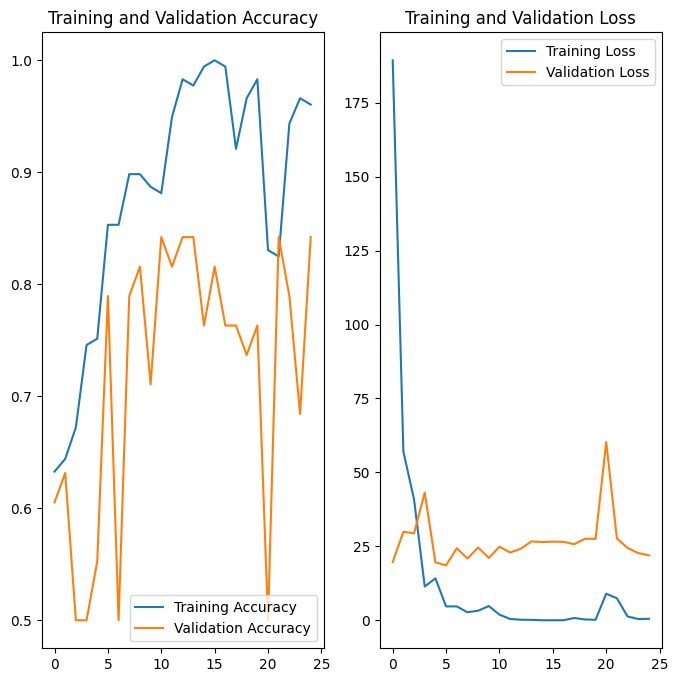

2024-04-16 23:09:05.457296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 621ms/step
Overall Accuracy: 0.7631578947368421
Precision: 0.782608695652174
Recall: 0.8181818181818182
F1-Score: 0.8


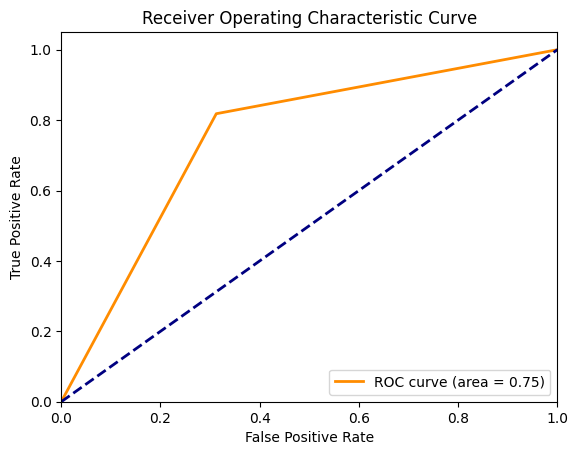

Epoch 1/30


2024-04-16 23:09:07.366605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 71.0602 - accuracy: 0.5876

2024-04-16 23:09:19.226516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 16s 285ms/step - loss: 71.0602 - accuracy: 0.5876 - val_loss: 61.9067 - val_accuracy: 0.5000
Epoch 2/30
36/36 [==============================] - 2s 56ms/step - loss: 20.0846 - accuracy: 0.6610 - val_loss: 26.8593 - val_accuracy: 0.5000
Epoch 3/30
36/36 [==============================] - 3s 71ms/step - loss: 6.3013 - accuracy: 0.7175 - val_loss: 10.1218 - val_accuracy: 0.7105
Epoch 4/30
36/36 [==============================] - 2s 53ms/step - loss: 3.9684 - accuracy: 0.7458 - val_loss: 13.4303 - val_accuracy: 0.4737
Epoch 5/30
36/36 [==============================] - 1s 22ms/step - loss: 3.1427 - accuracy: 0.8023 - val_loss: 7.3242 - val_accuracy: 0.6842
Epoch 6/30
36/36 [==============================] - 1s 29ms/step - loss: 2.1530 - accuracy: 0.8249 - val_loss: 9.2579 - val_accuracy: 0.6842
Epoch 7/30
36/36 [==============================] - 1s 19ms/step - loss: 1.4043 - accuracy: 0.8644 - val_loss: 6.3511 - val_accuracy: 0.6053
Epoch 8/30
36/36

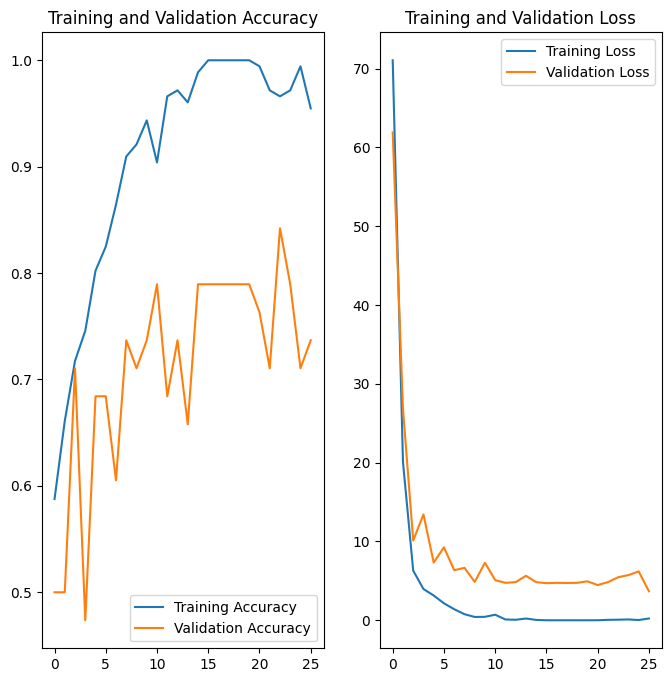

2024-04-16 23:09:46.670983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 604ms/step
Overall Accuracy: 0.6052631578947368
Precision: 0.7333333333333333
Recall: 0.5
F1-Score: 0.5945945945945945


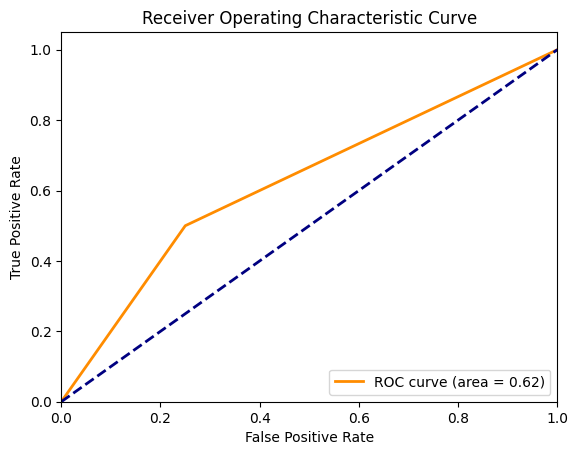

In [116]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same')(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu')(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2_ES = tf.keras.Model(x,y)
    model_2_ES._name = 'Model_2_ES'
    
    if i == 0:
        model_2_ES.summary()

    # COMPILING
    model_2_ES.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.001,
        patience=3,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        start_from_epoch=20
)
    
    # TRAINING
    epochs = 30
    history = model_2_ES.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2_ES.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2_ES
    del history


Model: "Model_2_ES_L2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_200 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_199 (Dept  (None, 398, 398, 1)          10        ['input_200[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1592 (Conv2D)        (None, 398, 398, 8)          80        ['depthwise_conv2d_199[0][0]']
                                                                                                  
 max_pooling2d_854 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1592[0][0

2024-04-16 23:09:48.587939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 107.2734 - accuracy: 0.5480

2024-04-16 23:10:04.308828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 20s 402ms/step - loss: 107.2734 - accuracy: 0.5480 - val_loss: 3.4116 - val_accuracy: 0.8684
Epoch 2/30
36/36 [==============================] - 8s 216ms/step - loss: 8.3174 - accuracy: 0.7571 - val_loss: 1.0393 - val_accuracy: 0.9474
Epoch 3/30
36/36 [==============================] - 7s 192ms/step - loss: 1.5020 - accuracy: 0.8701 - val_loss: 1.9899 - val_accuracy: 0.9211
Epoch 4/30
36/36 [==============================] - 7s 194ms/step - loss: 0.2046 - accuracy: 0.9661 - val_loss: 1.6245 - val_accuracy: 0.9211
Epoch 5/30
36/36 [==============================] - 7s 202ms/step - loss: 0.2654 - accuracy: 0.9379 - val_loss: 1.9264 - val_accuracy: 0.8684
Epoch 6/30
36/36 [==============================] - 7s 185ms/step - loss: 0.1957 - accuracy: 0.9718 - val_loss: 1.9724 - val_accuracy: 0.9211
Epoch 7/30
36/36 [==============================] - 7s 201ms/step - loss: 0.0286 - accuracy: 0.9944 - val_loss: 1.8291 - val_accuracy: 0.8947
Epoch 8/30
36/

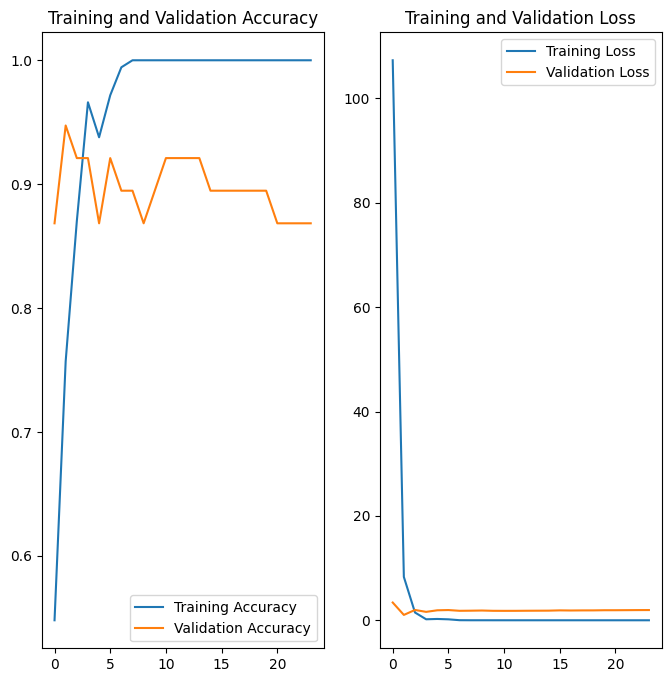

2024-04-16 23:12:48.883204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 750ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.8695652173913043
Recall: 0.9090909090909091
F1-Score: 0.888888888888889


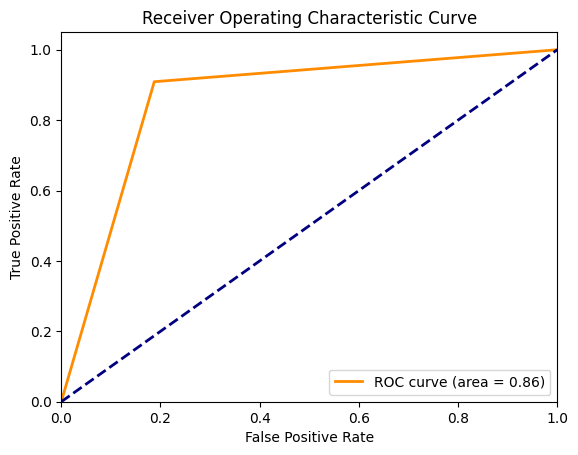

Epoch 1/30


2024-04-16 23:12:50.964920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 46.8803 - accuracy: 0.5989

2024-04-16 23:13:06.667931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 19s 363ms/step - loss: 46.8803 - accuracy: 0.5989 - val_loss: 2.6729 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 6s 175ms/step - loss: 1.1821 - accuracy: 0.7458 - val_loss: 3.3385 - val_accuracy: 0.7105
Epoch 3/30
36/36 [==============================] - 7s 182ms/step - loss: 3.9331 - accuracy: 0.6949 - val_loss: 2.7816 - val_accuracy: 0.6842
Epoch 4/30
36/36 [==============================] - 5s 129ms/step - loss: 2.3620 - accuracy: 0.7175 - val_loss: 34.4499 - val_accuracy: 0.5526
Epoch 5/30
36/36 [==============================] - 5s 142ms/step - loss: 6.4883 - accuracy: 0.7458 - val_loss: 3.3324 - val_accuracy: 0.8947
Epoch 6/30
36/36 [==============================] - 4s 116ms/step - loss: 0.6553 - accuracy: 0.9040 - val_loss: 3.9239 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 6s 172ms/step - loss: 0.5683 - accuracy: 0.8814 - val_loss: 5.6723 - val_accuracy: 0.7368
Epoch 8/30
36/

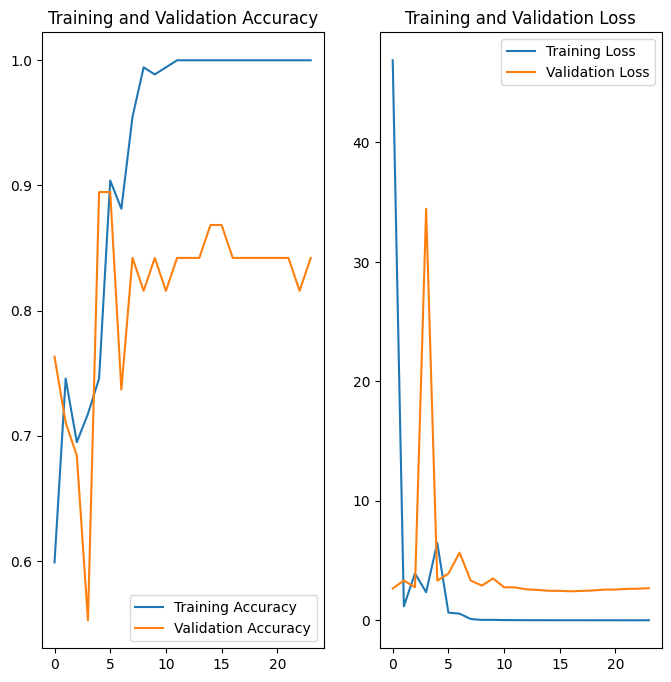

2024-04-16 23:15:10.152769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 641ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.7916666666666666
Recall: 0.8636363636363636
F1-Score: 0.8260869565217391


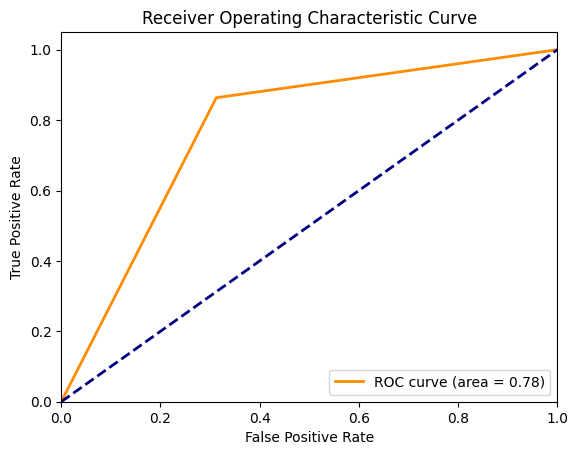

Epoch 1/30


2024-04-16 23:15:12.141120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 44.3891 - accuracy: 0.6158

2024-04-16 23:15:23.878445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 15s 256ms/step - loss: 44.3891 - accuracy: 0.6158 - val_loss: 5.1064 - val_accuracy: 0.6579
Epoch 2/30
36/36 [==============================] - 8s 214ms/step - loss: 2.2290 - accuracy: 0.7627 - val_loss: 2.8394 - val_accuracy: 0.8158
Epoch 3/30
36/36 [==============================] - 5s 134ms/step - loss: 0.5668 - accuracy: 0.8644 - val_loss: 2.6282 - val_accuracy: 0.8421
Epoch 4/30
36/36 [==============================] - 5s 146ms/step - loss: 0.3244 - accuracy: 0.9153 - val_loss: 2.0494 - val_accuracy: 0.7105
Epoch 5/30
36/36 [==============================] - 5s 142ms/step - loss: 0.0833 - accuracy: 0.9661 - val_loss: 1.5428 - val_accuracy: 0.7105
Epoch 6/30
36/36 [==============================] - 4s 123ms/step - loss: 0.0533 - accuracy: 0.9831 - val_loss: 1.8397 - val_accuracy: 0.8421
Epoch 7/30
36/36 [==============================] - 5s 154ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 1.6728 - val_accuracy: 0.8421
Epoch 8/30
36/3

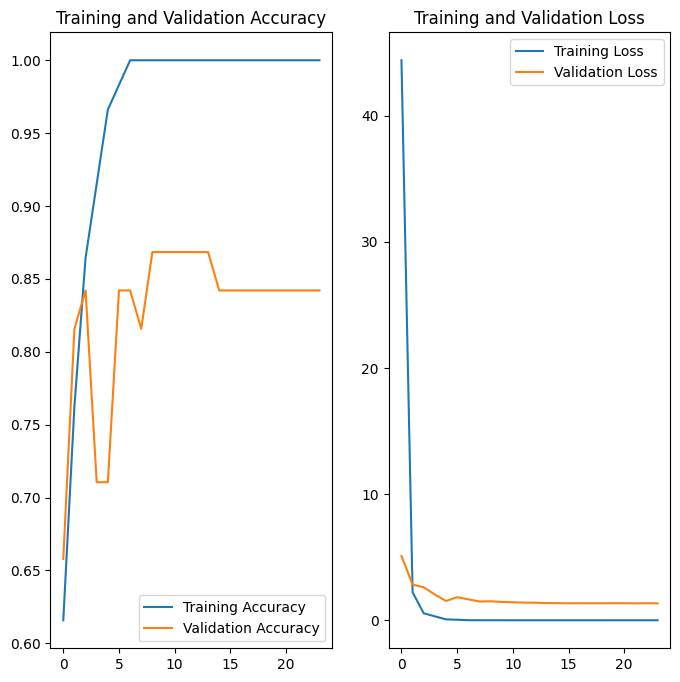

2024-04-16 23:17:26.873171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 611ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.8181818181818182
Recall: 0.8181818181818182
F1-Score: 0.8181818181818182


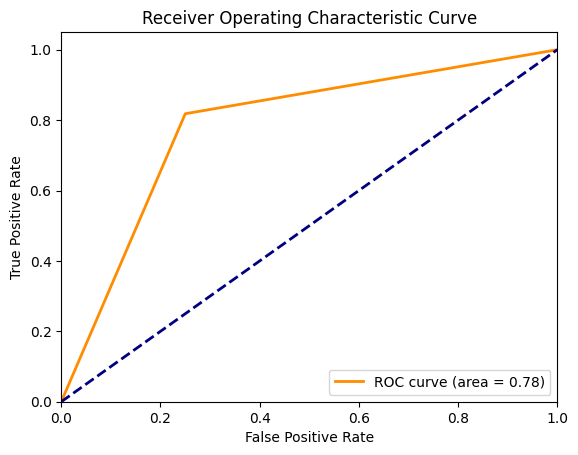

Epoch 1/30


2024-04-16 23:17:30.875072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 147.9618 - accuracy: 0.5141

2024-04-16 23:17:45.425333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 19s 322ms/step - loss: 147.9618 - accuracy: 0.5141 - val_loss: 25.3969 - val_accuracy: 0.5263
Epoch 2/30
36/36 [==============================] - 9s 231ms/step - loss: 13.7974 - accuracy: 0.5932 - val_loss: 12.7465 - val_accuracy: 0.5000
Epoch 3/30
36/36 [==============================] - 6s 174ms/step - loss: 10.8248 - accuracy: 0.6384 - val_loss: 11.9065 - val_accuracy: 0.5000
Epoch 4/30
36/36 [==============================] - 5s 139ms/step - loss: 6.1962 - accuracy: 0.6780 - val_loss: 11.0332 - val_accuracy: 0.5789
Epoch 5/30
36/36 [==============================] - 3s 93ms/step - loss: 5.0042 - accuracy: 0.7571 - val_loss: 10.1005 - val_accuracy: 0.5789
Epoch 6/30
36/36 [==============================] - 5s 130ms/step - loss: 3.4822 - accuracy: 0.7966 - val_loss: 9.2838 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 5s 138ms/step - loss: 2.3923 - accuracy: 0.8531 - val_loss: 12.0928 - val_accuracy: 0.7895
Epoch 8

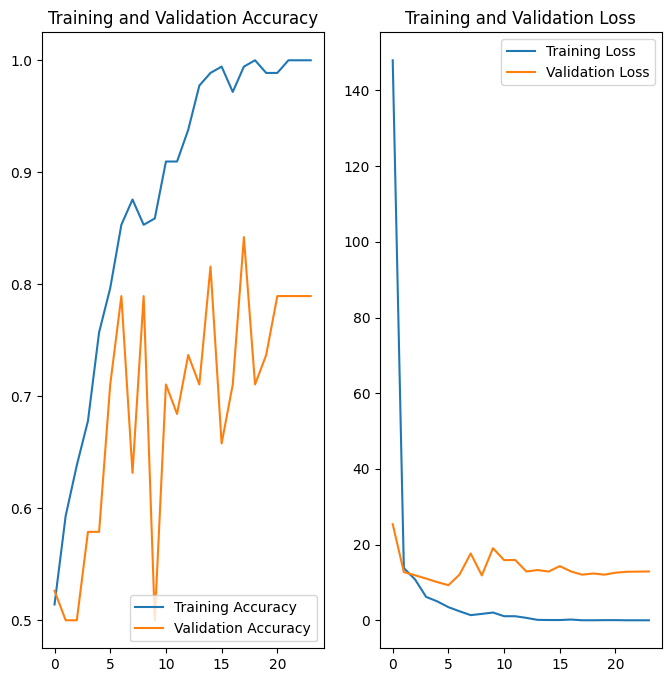

1/2 [==============>...............] - ETA: 0s

2024-04-16 23:19:56.364151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 829ms/step
Overall Accuracy: 0.8157894736842105
Precision: 0.8571428571428571
Recall: 0.8181818181818182
F1-Score: 0.8372093023255814


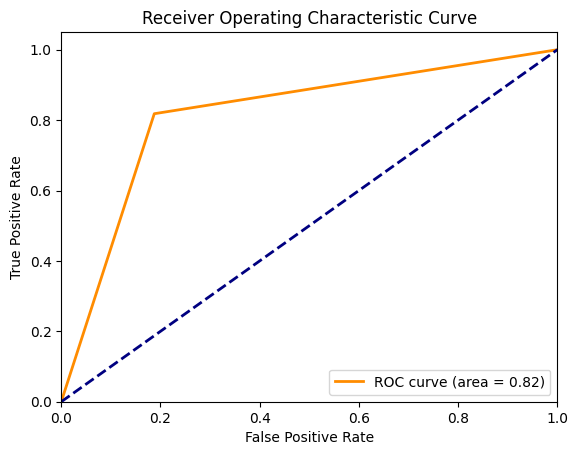

Epoch 1/30


2024-04-16 23:19:57.699909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 22.1864 - accuracy: 0.6384

2024-04-16 23:20:13.602915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 20s 391ms/step - loss: 22.1864 - accuracy: 0.6384 - val_loss: 3.5784 - val_accuracy: 0.7632
Epoch 2/30
36/36 [==============================] - 8s 218ms/step - loss: 3.3328 - accuracy: 0.7062 - val_loss: 3.2002 - val_accuracy: 0.6579
Epoch 3/30
36/36 [==============================] - 8s 214ms/step - loss: 1.5079 - accuracy: 0.7966 - val_loss: 4.3056 - val_accuracy: 0.8421
Epoch 4/30
36/36 [==============================] - 7s 180ms/step - loss: 1.0551 - accuracy: 0.8475 - val_loss: 4.8735 - val_accuracy: 0.8158
Epoch 5/30
36/36 [==============================] - 5s 151ms/step - loss: 1.0347 - accuracy: 0.8757 - val_loss: 5.8618 - val_accuracy: 0.7632
Epoch 6/30
36/36 [==============================] - 7s 205ms/step - loss: 0.3966 - accuracy: 0.8870 - val_loss: 3.9032 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 6s 180ms/step - loss: 0.1002 - accuracy: 0.9774 - val_loss: 3.8180 - val_accuracy: 0.7632
Epoch 8/30
36/3

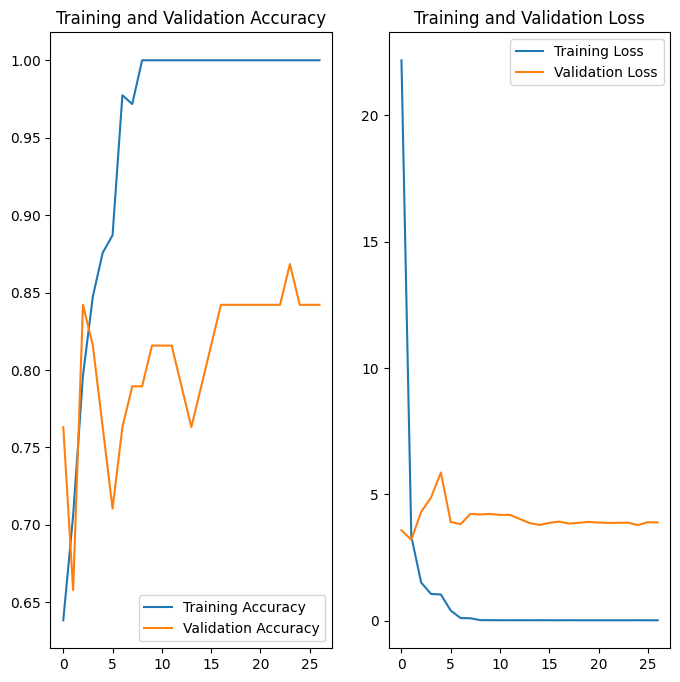

2024-04-16 23:23:10.289031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 42ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.8695652173913043
Recall: 0.9090909090909091
F1-Score: 0.888888888888889


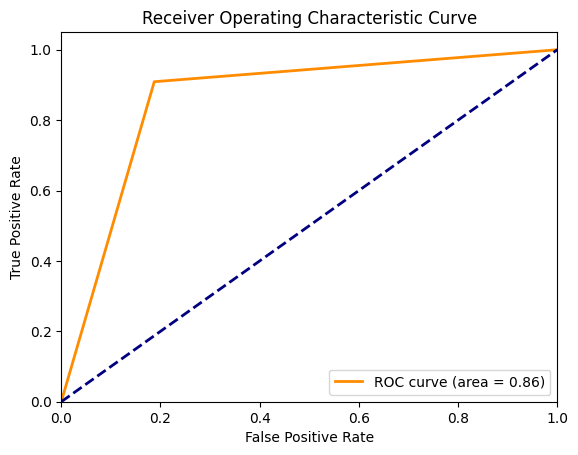

In [117]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2_ES_L2 = tf.keras.Model(x,y)
    model_2_ES_L2._name = 'Model_2_ES_L2'
    
    if i == 0:
        model_2_ES_L2.summary()

    # COMPILING
    model_2_ES_L2.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.001,
        patience=3,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        start_from_epoch=20
)
    
    # TRAINING
    epochs = 30
    history = model_2_ES_L2.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2_ES_L2.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2_ES_L2
    del history


Model: "Model_2_ES_L2_DO"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_205 (InputLayer)      [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 depthwise_conv2d_204 (Dept  (None, 398, 398, 1)          10        ['input_205[0][0]']           
 hwiseConv2D)                                                                                     
                                                                                                  
 conv2d_1617 (Conv2D)        (None, 398, 398, 8)          80        ['depthwise_conv2d_204[0][0]']
                                                                                                  
 max_pooling2d_874 (MaxPool  (None, 199, 199, 8)          0         ['conv2d_1617[0

2024-04-16 23:23:11.633340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 93.4020 - accuracy: 0.5876

2024-04-16 23:23:27.328117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 19s 391ms/step - loss: 93.4020 - accuracy: 0.5876 - val_loss: 30.4190 - val_accuracy: 0.5789
Epoch 2/30
36/36 [==============================] - 7s 197ms/step - loss: 11.0609 - accuracy: 0.7232 - val_loss: 14.0488 - val_accuracy: 0.5789
Epoch 3/30
36/36 [==============================] - 5s 147ms/step - loss: 5.7060 - accuracy: 0.7910 - val_loss: 12.2020 - val_accuracy: 0.5789
Epoch 4/30
36/36 [==============================] - 5s 136ms/step - loss: 3.4414 - accuracy: 0.8136 - val_loss: 11.8382 - val_accuracy: 0.7895
Epoch 5/30
36/36 [==============================] - 5s 139ms/step - loss: 2.1441 - accuracy: 0.8644 - val_loss: 10.7654 - val_accuracy: 0.8158
Epoch 6/30
36/36 [==============================] - 6s 169ms/step - loss: 1.6395 - accuracy: 0.8870 - val_loss: 9.3013 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 4s 119ms/step - loss: 0.5544 - accuracy: 0.9605 - val_loss: 8.0988 - val_accuracy: 0.7895
Epoch 8/3

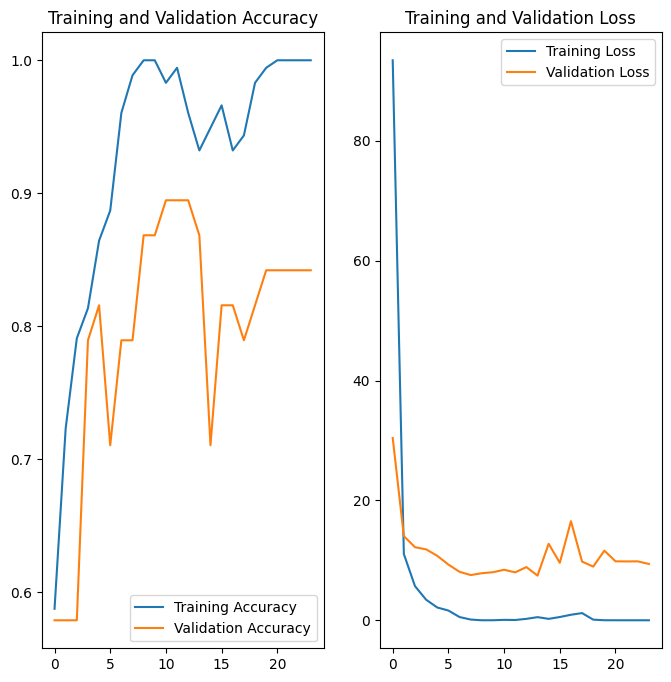

1/2 [==============>...............] - ETA: 0s

2024-04-16 23:25:21.291851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 137ms/step
Overall Accuracy: 0.7894736842105263
Precision: 0.85
Recall: 0.7727272727272727
F1-Score: 0.8095238095238095


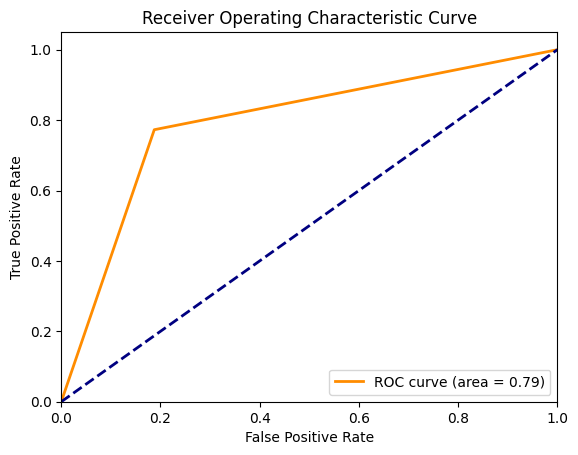

Epoch 1/30


2024-04-16 23:25:22.001978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 541.7545 - accuracy: 0.4237

2024-04-16 23:25:34.381836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 16s 362ms/step - loss: 541.7545 - accuracy: 0.4237 - val_loss: 93.9016 - val_accuracy: 0.5263
Epoch 2/30
36/36 [==============================] - 4s 119ms/step - loss: 489.3711 - accuracy: 0.5819 - val_loss: 689.5010 - val_accuracy: 0.5526
Epoch 3/30
36/36 [==============================] - 6s 162ms/step - loss: 243.0437 - accuracy: 0.5989 - val_loss: 38.9502 - val_accuracy: 0.7895
Epoch 4/30
36/36 [==============================] - 5s 134ms/step - loss: 155.5454 - accuracy: 0.6441 - val_loss: 82.1803 - val_accuracy: 0.6316
Epoch 5/30
36/36 [==============================] - 4s 117ms/step - loss: 69.4905 - accuracy: 0.6723 - val_loss: 109.5004 - val_accuracy: 0.6053
Epoch 6/30
36/36 [==============================] - 6s 156ms/step - loss: 72.3627 - accuracy: 0.7006 - val_loss: 61.4342 - val_accuracy: 0.6579
Epoch 7/30
36/36 [==============================] - 5s 139ms/step - loss: 53.8224 - accuracy: 0.7232 - val_loss: 64.4621 - val_accuracy: 0.6

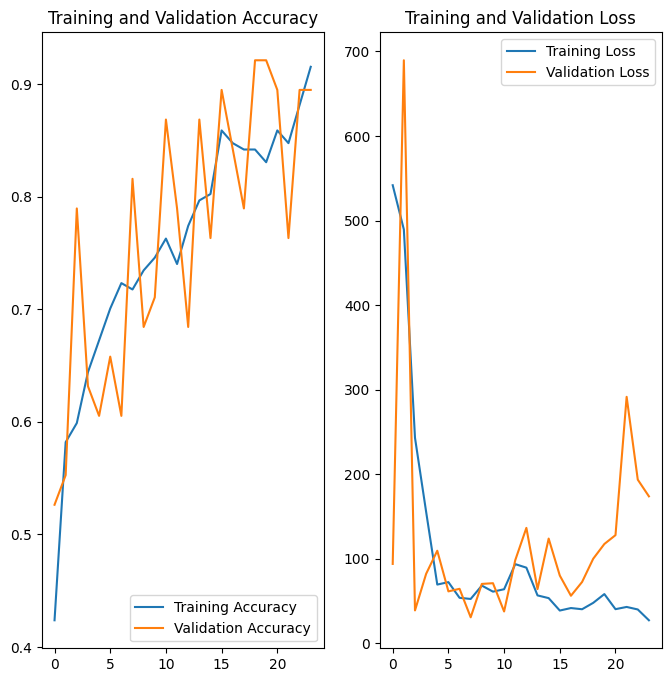

2024-04-16 23:27:38.265360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 75ms/step
Overall Accuracy: 0.8421052631578947
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1-Score: 0.8695652173913043


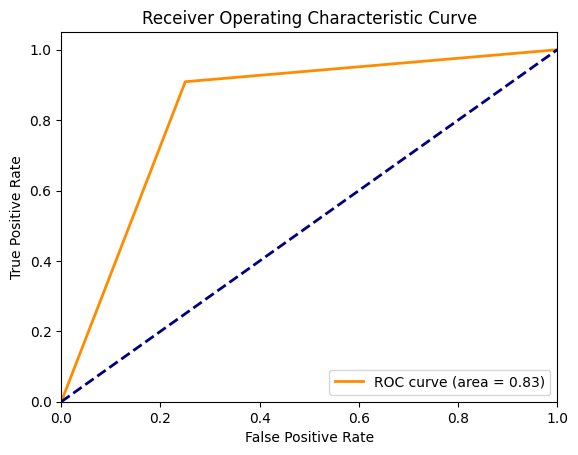

Epoch 1/30


2024-04-16 23:27:39.731864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 51.8461 - accuracy: 0.6554

2024-04-16 23:27:51.905545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 17s 441ms/step - loss: 51.8461 - accuracy: 0.6554 - val_loss: 7.8141 - val_accuracy: 0.7105
Epoch 2/30
36/36 [==============================] - 7s 202ms/step - loss: 7.7740 - accuracy: 0.7288 - val_loss: 3.4584 - val_accuracy: 0.8947
Epoch 3/30
36/36 [==============================] - 7s 195ms/step - loss: 7.0198 - accuracy: 0.7514 - val_loss: 1.9749 - val_accuracy: 0.7895
Epoch 4/30
36/36 [==============================] - 7s 197ms/step - loss: 2.4150 - accuracy: 0.8475 - val_loss: 1.2803 - val_accuracy: 0.8158
Epoch 5/30
36/36 [==============================] - 8s 218ms/step - loss: 1.8541 - accuracy: 0.9209 - val_loss: 8.4460 - val_accuracy: 0.6579
Epoch 6/30
36/36 [==============================] - 6s 158ms/step - loss: 2.5363 - accuracy: 0.9096 - val_loss: 5.2467 - val_accuracy: 0.8947
Epoch 7/30
36/36 [==============================] - 7s 196ms/step - loss: 2.5360 - accuracy: 0.8757 - val_loss: 8.5133 - val_accuracy: 0.7895
Epoch 8/30
36/3

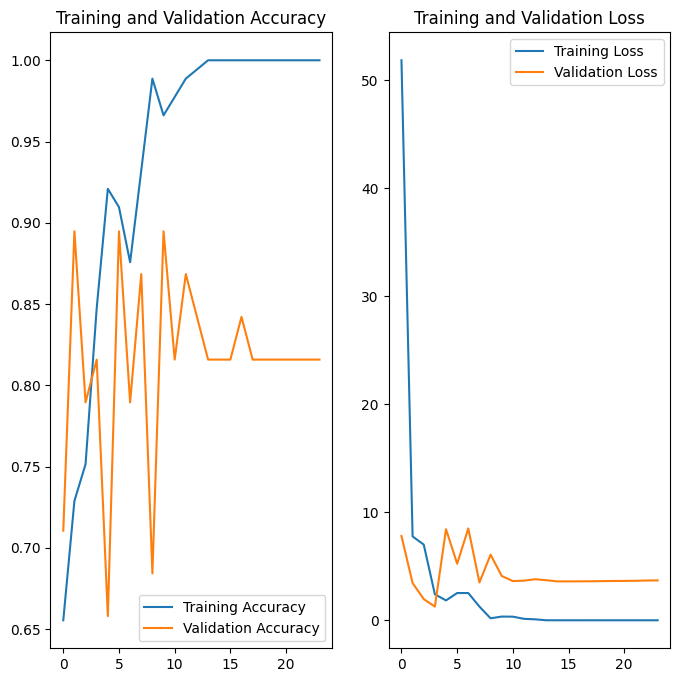

2024-04-16 23:30:20.493866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 64ms/step
Overall Accuracy: 0.7105263157894737
Precision: 0.8235294117647058
Recall: 0.6363636363636364
F1-Score: 0.717948717948718


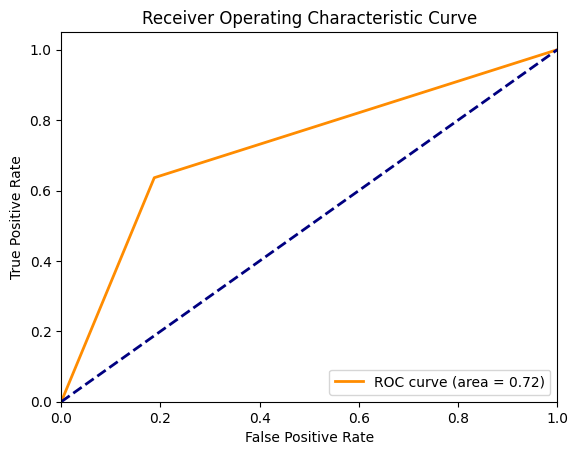

Epoch 1/30


2024-04-16 23:30:21.962968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 136.9721 - accuracy: 0.6554

2024-04-16 23:30:41.215618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 24s 545ms/step - loss: 136.9721 - accuracy: 0.6554 - val_loss: 21.2940 - val_accuracy: 0.6579
Epoch 2/30
36/36 [==============================] - 5s 141ms/step - loss: 22.7852 - accuracy: 0.6497 - val_loss: 27.8291 - val_accuracy: 0.5789
Epoch 3/30
36/36 [==============================] - 7s 185ms/step - loss: 32.9050 - accuracy: 0.6441 - val_loss: 14.0367 - val_accuracy: 0.8158
Epoch 4/30
36/36 [==============================] - 6s 156ms/step - loss: 19.2390 - accuracy: 0.7232 - val_loss: 15.4611 - val_accuracy: 0.8421
Epoch 5/30
36/36 [==============================] - 7s 194ms/step - loss: 15.0738 - accuracy: 0.7571 - val_loss: 17.9573 - val_accuracy: 0.6053
Epoch 6/30
36/36 [==============================] - 7s 199ms/step - loss: 7.5491 - accuracy: 0.8136 - val_loss: 22.2882 - val_accuracy: 0.7105
Epoch 7/30
36/36 [==============================] - 7s 203ms/step - loss: 3.0322 - accuracy: 0.8983 - val_loss: 16.9506 - val_accuracy: 0.7632
Epo

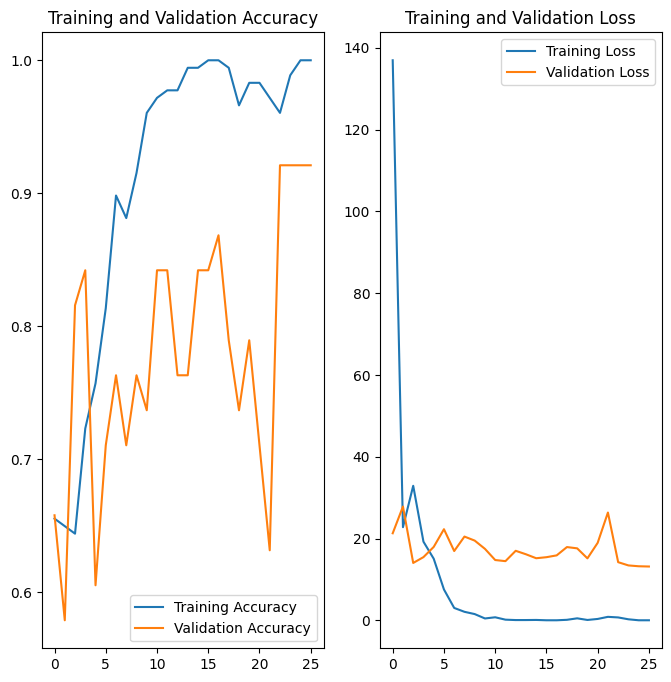

1/2 [==============>...............] - ETA: 0s

2024-04-16 23:33:17.960566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 823ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.8148148148148148
Recall: 1.0
F1-Score: 0.8979591836734693


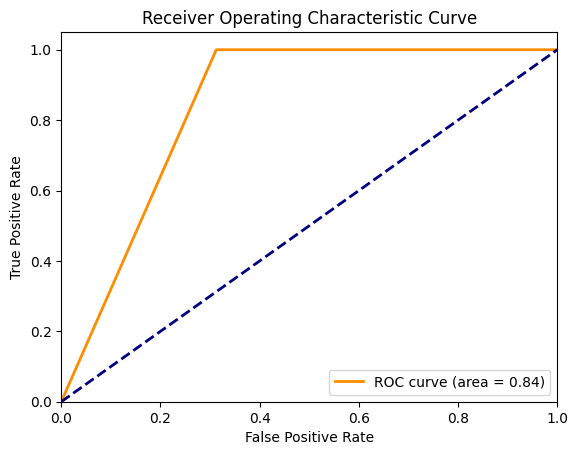

Epoch 1/30


2024-04-16 23:33:19.334498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 59.7171 - accuracy: 0.6328

2024-04-16 23:33:35.729617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 20s 417ms/step - loss: 59.7171 - accuracy: 0.6328 - val_loss: 3.9584 - val_accuracy: 0.7368
Epoch 2/30
36/36 [==============================] - 7s 197ms/step - loss: 1.3801 - accuracy: 0.7119 - val_loss: 3.4190 - val_accuracy: 0.7368
Epoch 3/30
36/36 [==============================] - 8s 226ms/step - loss: 0.7087 - accuracy: 0.7797 - val_loss: 4.5862 - val_accuracy: 0.6842
Epoch 4/30
36/36 [==============================] - 7s 189ms/step - loss: 0.4465 - accuracy: 0.8870 - val_loss: 5.6425 - val_accuracy: 0.7105
Epoch 5/30
36/36 [==============================] - 6s 179ms/step - loss: 0.3883 - accuracy: 0.9096 - val_loss: 4.1664 - val_accuracy: 0.7105
Epoch 6/30
36/36 [==============================] - 7s 190ms/step - loss: 0.1848 - accuracy: 0.9435 - val_loss: 3.9517 - val_accuracy: 0.7368
Epoch 7/30
36/36 [==============================] - 7s 209ms/step - loss: 0.1270 - accuracy: 0.9661 - val_loss: 4.8532 - val_accuracy: 0.6579
Epoch 8/30
36/3

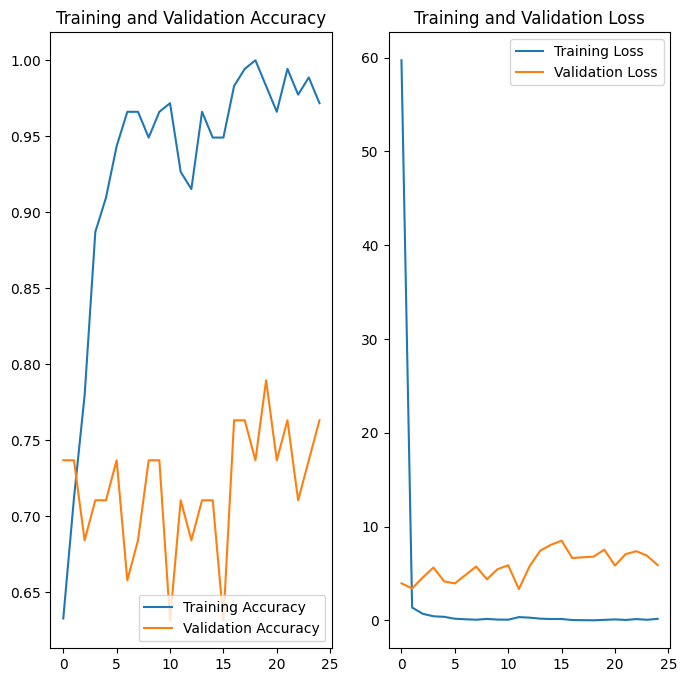

2024-04-16 23:36:12.097672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 2s 761ms/step
Overall Accuracy: 0.868421052631579
Precision: 0.84
Recall: 0.9545454545454546
F1-Score: 0.8936170212765958


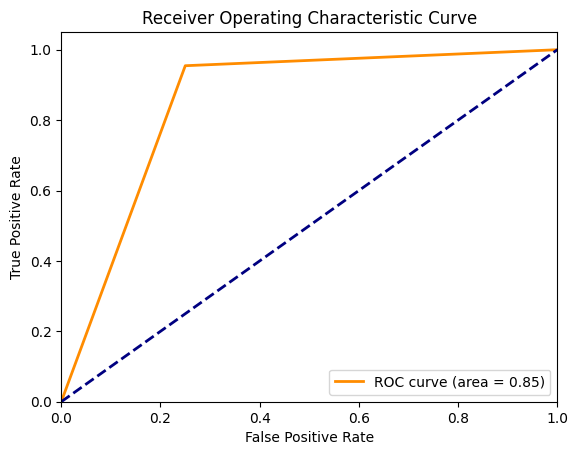

In [118]:
for i in range(5):
    # MODELING
    x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
    y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)

    y = layers.Conv2D(8, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(16, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Dropout(0.01)(y)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Dropout(0.01)(y)

    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = res_block(y, 32)
    y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)

    y = layers.Flatten()(y)
    y = layers.Dense(50, activation='relu', kernel_regularizer=regularizers.L2(0.0001))(y)
    y = layers.Dropout(0.01)(y)
    y = layers.Dense(1, activation='sigmoid')(y)

    model_2_ES_L2_DO = tf.keras.Model(x,y)
    model_2_ES_L2_DO._name = 'Model_2_ES_L2_DO'
    
    if i == 0:
        model_2_ES_L2_DO.summary()

    # COMPILING
    model_2_ES_L2_DO.compile(optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                    loss = 'binary_crossentropy',
                    metrics = 'accuracy')
    
    # SCHEDULER
    lr_scheduler = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.001,
        patience=3,
        verbose=1,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        start_from_epoch=20
)
    
    # TRAINING
    epochs = 30
    history = model_2_ES_L2_DO.fit(x = X_train, y = y_train,
                          batch_size=5,
                          epochs = epochs,
                          validation_data = (X_val, y_val),
                          callbacks=[lr_scheduler])

    # SHOWING RESULTS
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(acc)), acc, label='Training Accuracy')
    plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(loss)), loss, label='Training Loss')
    plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    # PREDICTING
    pred_prob = model_2_ES_L2_DO.predict(X_test)
    y_pred = np.where(pred_prob > 0.5, 1, 0)

    # Compute overall accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Compute recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    del model_2_ES_L2_DO
    del history
